In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-dataset/Walmart.csv


In [22]:
df=pd.read_csv("/kaggle/input/walmart-dataset/Walmart.csv")

In [23]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [24]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [27]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter

In [28]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,3
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,4


In [ ]:

# Set up 10 small subplots (e.g., 5 rows x 2 cols)
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
axs = axs.flatten()  # Flatten to loop easily

# Plot for stores 1 to 10
for i in range(8):
    store_num = i + 1
    store_data = df[df['Store'] == store_num]  
    axs[i].bar(store_data['Month'], store_data['Weekly_Sales'], color='skyblue')
    axs[i].set_title(f"Store {store_num}")
    axs[i].set_xlabel("month")
    axs[i].set_ylabel("Sales")

plt.tight_layout()
plt.suptitle("Yearly Weekly Sales for Store 1–8", fontsize=18, y=1.02)
plt.show()

In [ ]:
plt.bar(df['Holiday_Flag'].head(1000),df['Weekly_Sales'].head(1000))

In [40]:
features = [
    'Store', 'Month', 'Year','Week','Quarter',
    'CPI', 'Temperature', 'Unemployment',
    'Fuel_Price','Holiday_Flag'
]
import seaborn as sns
import math

# Get number of unique values for each feature
nu = df[features].nunique().sort_values()

# Initialize lists
nf = []
cf = []

threshold = 45         #no. of stores

# Loop through all features
for col in nu.index:
    if nu[col] <= threshold:
        cf.append(col)
    else:
        nf.append(col)

# Summary
print('\n\033[1mInference:\033[0m The dataset has \033[94m{} numerical\033[0m & \033[92m{} categorical\033[0m features.'.format(
    len(nf), len(cf)
))


Inference: The dataset has 5 numerical & 5 categorical features.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


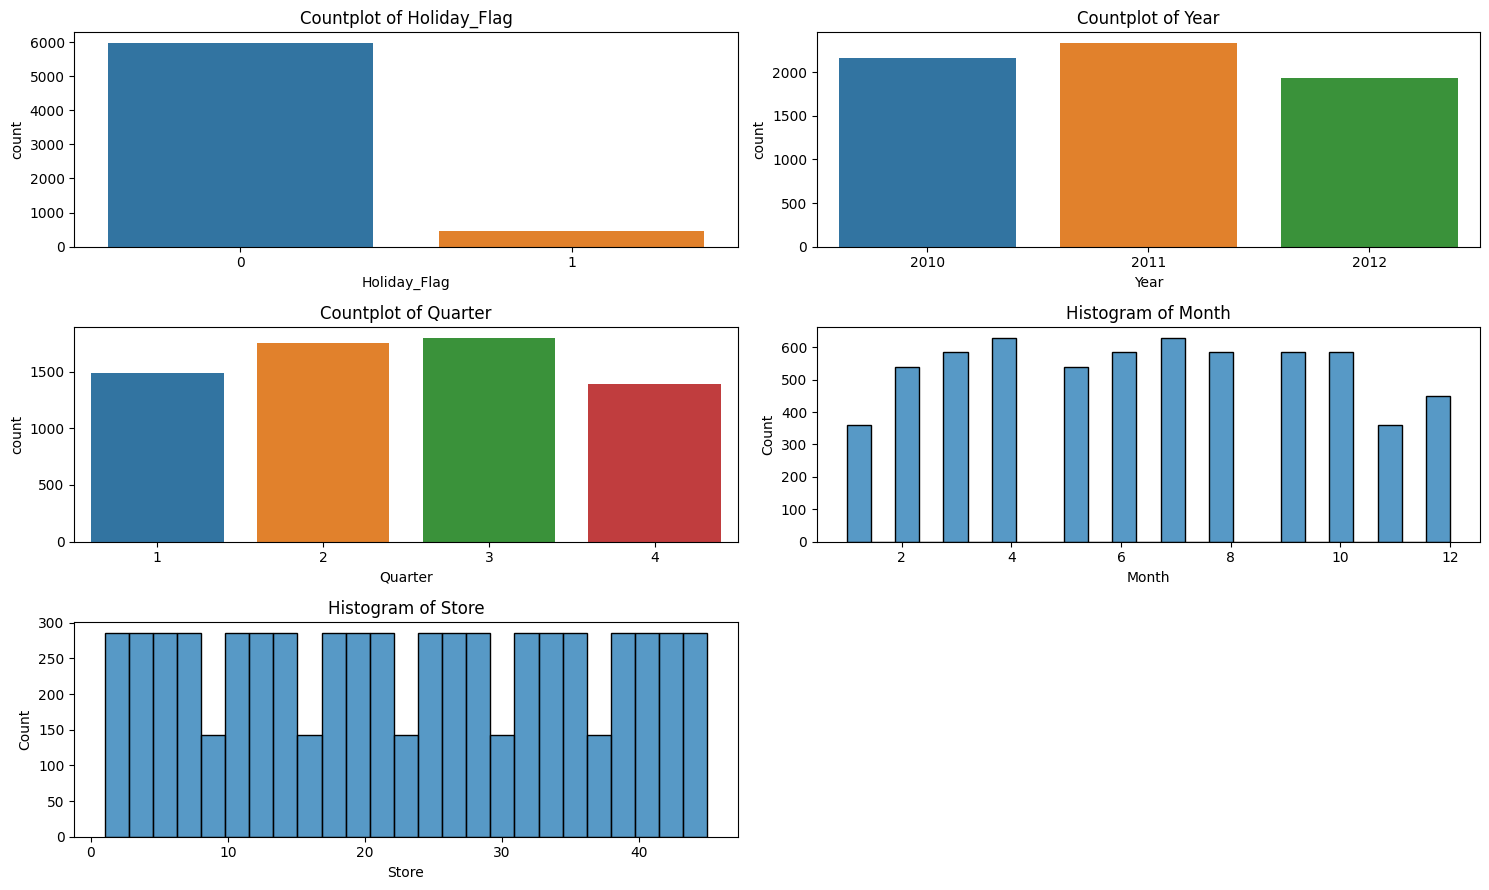

In [41]:
n = 2  # number of columns in subplot grid
num_plots = len(cf)
rows = math.ceil(num_plots / n)

plt.figure(figsize=[15, 3 * rows])

for i, col in enumerate(cf):
    plt.subplot(rows, n, i + 1)
    if df[col].nunique() <= 8:
        sns.countplot(x=df[col])
        plt.title(f'Countplot of {col}')
    else:
        sns.histplot(df[col], bins=25, kde=False)
        plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


In [43]:

# Convert string to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort the DataFrame by date
df = df.sort_values(by='Date').reset_index(drop=True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1
1,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623,2010,2,5,1
2,31,2010-02-05,1469252.05,0,39.05,2.572,210.752605,8.324,2010,2,5,1
3,16,2010-02-05,477409.30,0,19.79,2.580,189.381697,7.039,2010,2,5,1
4,11,2010-02-05,1528008.64,0,46.04,2.572,214.424881,7.368,2010,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,12,2012-10-26,974697.60,0,65.95,4.301,131.193097,10.199,2012,10,43,4
6431,30,2012-10-26,439424.50,0,70.50,3.506,223.078337,6.170,2012,10,43,4
6432,15,2012-10-26,558473.60,0,55.75,4.071,138.728161,7.992,2012,10,43,4
6433,43,2012-10-26,587603.55,0,69.17,3.506,214.741539,8.839,2012,10,43,4


In [49]:
# Sort by Store and Date for proper time series ordering
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)

# Define rolling and lag parameters
lags = [1, 2, 3]
rolling_windows = [2, 3]

# Create lag features
for lag in lags:
    df[f'Sales_lag_{lag}'] = df.groupby('Store')['Weekly_Sales'].shift(lag)

# Create rolling mean and std features
for window in rolling_windows:
    df[f'Sales_roll_{window}_mean'] = df.groupby('Store')['Weekly_Sales'].shift(1).rolling(window).mean().reset_index(level=0, drop=True)
    df[f'Sales_roll_{window}_std'] = df.groupby('Store')['Weekly_Sales'].shift(1).rolling(window).std().reset_index(level=0, drop=True)

# Create percentage change feature
df['Sales_pct_change_1'] = df.groupby('Store')['Weekly_Sales'].pct_change(periods=1)

# Optional: Fill NA values created due to shifting
df = df.dropna().reset_index(drop=True)

In [50]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_roll_2_mean,Sales_roll_2_std,Sales_roll_3_mean,Sales_roll_3_std,Sales_pct_change_1
0,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1,1611968.17,1641957.44,1643690.90,1626962.805,21205.616180,1.632539e+06,17835.791719,-0.125462
1,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1,1409727.59,1611968.17,1641957.44,1510847.880,143005.685549,1.554551e+06,126313.968444,0.102913
2,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,1,1554806.68,1409727.59,1611968.17,1482267.135,102586.408347,1.525501e+06,104256.598906,-0.074135
3,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,11,1,1439541.59,1554806.68,1409727.59,1497174.135,81504.726773,1.468025e+06,76619.033671,0.022906
4,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,12,1,1472515.79,1439541.59,1554806.68,1456028.690,23316.280424,1.488955e+06,59364.873755,-0.046238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,3,723086.20,702238.27,766512.66,712662.235,14741.712677,7.306124e+05,32791.489809,-0.013708
6296,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,4,713173.95,723086.20,702238.27,718130.075,7009.019192,7.128328e+05,10428.150862,0.028438
6297,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,4,733455.07,713173.95,723086.20,723314.510,14340.917482,7.232384e+05,10141.416680,0.001376
6298,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,4,734464.36,733455.07,713173.95,733959.715,713.675803,7.270311e+05,12011.272849,-0.022246


In [51]:
train_df = df[(df['Year'] < 2012)]
test_df = df[(df['Year'] == 2012)]


In [52]:
train_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_roll_2_mean,Sales_roll_2_std,Sales_roll_3_mean,Sales_roll_3_std,Sales_pct_change_1
0,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1,1611968.17,1641957.44,1643690.90,1626962.805,21205.616180,1.632539e+06,17835.791719,-0.125462
1,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1,1409727.59,1611968.17,1641957.44,1510847.880,143005.685549,1.554551e+06,126313.968444,0.102913
2,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,10,1,1554806.68,1409727.59,1611968.17,1482267.135,102586.408347,1.525501e+06,104256.598906,-0.074135
3,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,3,11,1,1439541.59,1554806.68,1409727.59,1497174.135,81504.726773,1.468025e+06,76619.033671,0.022906
4,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,3,12,1,1472515.79,1439541.59,1554806.68,1456028.690,23316.280424,1.488955e+06,59364.873755,-0.046238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,45,2011-12-02,875699.81,0,50.19,3.452,188.502435,8.523,2011,12,48,4,1170672.94,773603.77,808624.82,972138.355,280770.302707,9.176338e+05,219836.773123,-0.251969
6253,45,2011-12-09,957155.31,0,46.57,3.415,188.654469,8.523,2011,12,49,4,875699.81,1170672.94,773603.77,1023186.375,208577.500491,9.399922e+05,206194.355957,0.093018
6254,45,2011-12-16,1078905.68,0,39.93,3.413,188.797935,8.523,2011,12,50,4,957155.31,875699.81,1170672.94,916427.560,57597.736415,1.001176e+06,152334.021273,0.127200
6255,45,2011-12-23,1521957.99,0,42.27,3.389,188.929975,8.523,2011,12,51,4,1078905.68,957155.31,875699.81,1018030.495,86090.512239,9.705869e+05,102266.625933,0.410650


In [53]:
test_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_roll_2_mean,Sales_roll_2_std,Sales_roll_3_mean,Sales_roll_3_std,Sales_pct_change_1
97,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,1,1,1,1497462.72,2270188.99,1881176.67,1883825.855,546399.985518,1.882943e+06,386366.162443,0.035331
98,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1,2,1,1550369.92,1497462.72,2270188.99,1523916.320,37411.039894,1.772674e+06,431672.050229,-0.058547
99,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1,3,1,1459601.17,1550369.92,1497462.72,1504985.545,64183.198645,1.502478e+06,45591.729434,-0.044675
100,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1,4,1,1394393.84,1459601.17,1550369.92,1426997.505,46108.545226,1.468122e+06,78336.346816,-0.053836
101,1,2012-02-03,1636339.65,0,56.55,3.360,220.172015,7.348,2012,2,5,1,1319325.59,1394393.84,1459601.17,1356859.715,53081.268627,1.391107e+06,70195.532132,0.240285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,3,723086.20,702238.27,766512.66,712662.235,14741.712677,7.306124e+05,32791.489809,-0.013708
6296,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,4,713173.95,723086.20,702238.27,718130.075,7009.019192,7.128328e+05,10428.150862,0.028438
6297,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,4,733455.07,713173.95,723086.20,723314.510,14340.917482,7.232384e+05,10141.416680,0.001376
6298,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,4,734464.36,733455.07,713173.95,733959.715,713.675803,7.270311e+05,12011.272849,-0.022246


In [54]:

feature_cols = [
    'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'Quarter',
    'Sales_lag_1', 'Sales_lag_2', 'Sales_lag_3',
    'Sales_roll_2_mean', 'Sales_roll_2_std', 'Sales_roll_3_mean', 'Sales_roll_3_std',
    'Sales_pct_change_1',
    'Store'
]
target = 'Weekly_Sales'

In [55]:

X_train = train_df[feature_cols]
y_train = train_df[target]

X_test = test_df[feature_cols]
y_test = test_df[target]

In [56]:
X_train

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter,Sales_lag_1,Sales_lag_2,Sales_lag_3,Sales_roll_2_mean,Sales_roll_2_std,Sales_roll_3_mean,Sales_roll_3_std,Sales_pct_change_1,Store
0,0,46.63,2.561,211.319643,8.106,2010,2,8,1,1611968.17,1641957.44,1643690.90,1626962.805,21205.616180,1.632539e+06,17835.791719,-0.125462,1
1,0,46.50,2.625,211.350143,8.106,2010,3,9,1,1409727.59,1611968.17,1641957.44,1510847.880,143005.685549,1.554551e+06,126313.968444,0.102913,1
2,0,57.79,2.667,211.380643,8.106,2010,3,10,1,1554806.68,1409727.59,1611968.17,1482267.135,102586.408347,1.525501e+06,104256.598906,-0.074135,1
3,0,54.58,2.720,211.215635,8.106,2010,3,11,1,1439541.59,1554806.68,1409727.59,1497174.135,81504.726773,1.468025e+06,76619.033671,0.022906,1
4,0,51.45,2.732,211.018042,8.106,2010,3,12,1,1472515.79,1439541.59,1554806.68,1456028.690,23316.280424,1.488955e+06,59364.873755,-0.046238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,0,50.19,3.452,188.502435,8.523,2011,12,48,4,1170672.94,773603.77,808624.82,972138.355,280770.302707,9.176338e+05,219836.773123,-0.251969,45
6253,0,46.57,3.415,188.654469,8.523,2011,12,49,4,875699.81,1170672.94,773603.77,1023186.375,208577.500491,9.399922e+05,206194.355957,0.093018,45
6254,0,39.93,3.413,188.797935,8.523,2011,12,50,4,957155.31,875699.81,1170672.94,916427.560,57597.736415,1.001176e+06,152334.021273,0.127200,45
6255,0,42.27,3.389,188.929975,8.523,2011,12,51,4,1078905.68,957155.31,875699.81,1018030.495,86090.512239,9.705869e+05,102266.625933,0.410650,45


In [58]:
y_train

0       1409727.59
1       1554806.68
2       1439541.59
3       1472515.79
4       1404429.92
           ...    
6252     875699.81
6253     957155.31
6254    1078905.68
6255    1521957.99
6256     869403.63
Name: Weekly_Sales, Length: 4365, dtype: float64

In [62]:
import pandas as pd
import time
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test already defined

xgb_model = XGBRegressor(
    tree_method='exact',  # most accurate but slow
    objective='reg:squarederror',  # regression
    random_state=42
)
start_time = time.time()
param_dist = {
    'n_estimators': [300, 500, 700, 1000],            # more trees for better fit
    'learning_rate': [0.001, 0.01, 0.03, 0.05],      # slower but better learning
    'max_depth': [6, 8, 10, 12],                      # deeper trees for complexity
    'min_child_weight': [1, 3, 5],                    # control overfitting
    'gamma': [0, 0.1, 0.3, 0.5],                      # complexity control
    'subsample': [0.7, 0.8, 1.0],                     # row sampling
    'colsample_bytree': [0.7, 0.8, 1.0],              # feature sampling
    'reg_alpha': [0, 0.01, 0.1, 1],                   # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3],                      # L2 regularization
}

tscv = TimeSeriesSplit(n_splits=5)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=70,                                  # explore more combos for accuracy
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=3,
    n_jobs=-1,
    random_state=42
)

random_search.fit(
    X_train, y_train,
    early_stopping_rounds=50,
    eval_set=[(X_test, y_test)],
    verbose=10
)
end_time = time.time()

# Time taken
training_time = end_time - start_time

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)



Fitting 5 folds for each of 70 candidates, totalling 350 fits


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`se

[0]	validation_0-rmse:539386.02998
[0]	validation_0-rmse:564250.26916
[10]	validation_0-rmse:406360.01173
[0]	validation_0-rmse:540177.17166
[0]	validation_0-rmse:551754.74493
[20]	validation_0-rmse:311369.33752
[10]	validation_0-rmse:423194.29368
[30]	validation_0-rmse:242082.53298
[40]	validation_0-rmse:194332.83764
[10]	validation_0-rmse:413215.18584
[20]	validation_0-rmse:319155.58303
[50]	validation_0-rmse:159557.37272
[10]	validation_0-rmse:405248.05171
[60]	validation_0-rmse:138423.12068
[30]	validation_0-rmse:244987.01379
[70]	validation_0-rmse:121412.45414
[20]	validation_0-rmse:311282.47811
[80]	validation_0-rmse:110576.46812
[40]	validation_0-rmse:189293.60680
[20]	validation_0-rmse:304809.65141
[90]	validation_0-rmse:104124.42870
[30]	validation_0-rmse:241687.96685
[50]	validation_0-rmse:148332.98615
[100]	validation_0-rmse:99460.05382
[110]	validation_0-rmse:95783.69014
[60]	validation_0-rmse:119000.95311
[30]	validation_0-rmse:230961.48454
[40]	validation_0-rmse:186432.31

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:56083.85999
[80]	validation_0-rmse:71428.39770
[150]	validation_0-rmse:48606.20519
[10]	validation_0-rmse:392517.27295
[110]	validation_0-rmse:50255.86674
[160]	validation_0-rmse:47503.03334
[90]	validation_0-rmse:60020.96448
[120]	validation_0-rmse:45860.35775
[20]	validation_0-rmse:294517.81033
[170]	validation_0-rmse:46710.09074
[180]	validation_0-rmse:46073.64564
[100]	validation_0-rmse:52059.05304
[130]	validation_0-rmse:42638.53112
[30]	validation_0-rmse:223099.90158
[190]	validation_0-rmse:45529.25018
[140]	validation_0-rmse:40218.43333
[110]	validation_0-rmse:46730.83671
[200]	validation_0-rmse:45067.42322
[40]	validation_0-rmse:169843.24823
[210]	validation_0-rmse:44726.15214
[150]	validation_0-rmse:38475.82778
[120]	validation_0-rmse:42902.67494
[220]	validation_0-rmse:44416.08553
[50]	validation_0-rmse:130968.19720
[160]	validation_0-rmse:37165.81391
[230]	validation_0-rmse:44232.01473
[130]	validation_0-rmse:39553.60769
[240]	validation_0-rmse:43975.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:538797.96443
[40]	validation_0-rmse:533722.61760
[280]	validation_0-rmse:30207.35801
[50]	validation_0-rmse:528820.71525
[370]	validation_0-rmse:32014.38787
[60]	validation_0-rmse:523941.25251
[70]	validation_0-rmse:519095.46031
[80]	validation_0-rmse:514347.03139
[190]	validation_0-rmse:29883.07992
[90]	validation_0-rmse:509621.60516
[380]	validation_0-rmse:31990.92638
[100]	validation_0-rmse:504909.59900
[290]	validation_0-rmse:30125.62331
[110]	validation_0-rmse:500194.88719
[120]	validation_0-rmse:495541.61901
[130]	validation_0-rmse:491093.63831
[140]	validation_0-rmse:486628.24354
[390]	validation_0-rmse:31937.36011
[150]	validation_0-rmse:482152.30200
[160]	validation_0-rmse:477747.86339
[200]	validation_0-rmse:29495.98220
[300]	validation_0-rmse:30043.35442
[170]	validation_0-rmse:473342.22595
[180]	validation_0-rmse:469056.32238
[400]	validation_0-rmse:31914.63728
[190]	validation_0-rmse:464795.89641
[200]	validation_0-rmse:460489.21560
[210]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-rmse:28178.68482
[30]	validation_0-rmse:563906.85348
[499]	validation_0-rmse:31733.29130
[40]	validation_0-rmse:558484.27494
[380]	validation_0-rmse:29673.35121
[50]	validation_0-rmse:553117.45348
[270]	validation_0-rmse:28022.63786
[60]	validation_0-rmse:547830.05190
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1.5, subsample=0.7;, score=-42202.123 total time=   7.6s
[0]	validation_0-rmse:567645.83533
[390]	validation_0-rmse:29642.06752
[70]	validation_0-rmse:542560.75806
[80]	validation_0-rmse:537336.17060
[10]	validation_0-rmse:562239.56549


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[90]	validation_0-rmse:532176.74164
[280]	validation_0-rmse:27919.12036
[400]	validation_0-rmse:29619.64667
[20]	validation_0-rmse:556944.24066
[100]	validation_0-rmse:527099.54443
[110]	validation_0-rmse:522040.41785
[30]	validation_0-rmse:551631.68333
[120]	validation_0-rmse:517058.05282
[410]	validation_0-rmse:29595.46361
[40]	validation_0-rmse:546438.54237
[290]	validation_0-rmse:27820.46052
[130]	validation_0-rmse:512086.68428
[140]	validation_0-rmse:507192.71210
[50]	validation_0-rmse:541237.68622
[150]	validation_0-rmse:502399.93515
[420]	validation_0-rmse:29572.60991
[60]	validation_0-rmse:536110.14033
[160]	validation_0-rmse:497632.17861
[300]	validation_0-rmse:27755.70175
[170]	validation_0-rmse:492917.63273
[70]	validation_0-rmse:531028.18338
[180]	validation_0-rmse:488225.66953
[430]	validation_0-rmse:29552.20426
[80]	validation_0-rmse:525952.64825
[190]	validation_0-rmse:483637.57641
[310]	validation_0-rmse:27688.77907
[200]	validation_0-rmse:479032.43473
[90]	validation_0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[420]	validation_0-rmse:389934.79093
[380]	validation_0-rmse:27427.50761
[240]	validation_0-rmse:452320.81983
[10]	validation_0-rmse:550319.18466
[430]	validation_0-rmse:386375.49034
[440]	validation_0-rmse:382835.72951
[250]	validation_0-rmse:448121.91459
[20]	validation_0-rmse:545154.15704
[450]	validation_0-rmse:379374.86603
[260]	validation_0-rmse:443936.80656
[390]	validation_0-rmse:27399.84058
[460]	validation_0-rmse:375920.15391
[30]	validation_0-rmse:540000.59896
[470]	validation_0-rmse:372475.28052
[270]	validation_0-rmse:439792.29028
[480]	validation_0-rmse:369071.02073
[280]	validation_0-rmse:435735.14319
[40]	validation_0-rmse:534918.15588
[400]	validation_0-rmse:27385.25801
[490]	validation_0-rmse:365719.96300
[499]	validation_0-rmse:362762.86756
[290]	validation_0-rmse:431757.79581
[50]	validation_0-rmse:529866.92359


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=2, subsample=1.0;, score=-339537.954 total time=   3.6s
[0]	validation_0-rmse:539982.57426
[300]	validation_0-rmse:427763.62431
[410]	validation_0-rmse:27368.44299
[60]	validation_0-rmse:524857.81443
[310]	validation_0-rmse:423847.03443
[10]	validation_0-rmse:534748.56834
[70]	validation_0-rmse:519882.74542
[320]	validation_0-rmse:419970.83093
[420]	validation_0-rmse:27350.46456
[330]	validation_0-rmse:416129.37865
[20]	validation_0-rmse:529615.73745
[80]	validation_0-rmse:514949.56390
[340]	validation_0-rmse:412341.61249
[90]	validation_0-rmse:510100.83217
[30]	validation_0-rmse:524507.30391
[430]	validation_0-rmse:27335.93397
[350]	validation_0-rmse:408547.43092
[100]	validation_0-rmse:505309.09037
[360]	validation_0-rmse:404828.03840
[40]	validation_0-rmse:519481.29618
[110]	validation_0-rmse:500557.15119
[370]	validation_0-rmse:401133.24035
[44

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:416587.83239
[40]	validation_0-rmse:382841.71972
[10]	validation_0-rmse:521966.54456
[50]	validation_0-rmse:351503.80647
[240]	validation_0-rmse:443010.27894
[150]	validation_0-rmse:467083.74338
[20]	validation_0-rmse:473958.11932
[60]	validation_0-rmse:323821.77907
[70]	validation_0-rmse:299265.58470
[30]	validation_0-rmse:430499.22324
[80]	validation_0-rmse:277841.81099
[250]	validation_0-rmse:438879.33266
[90]	validation_0-rmse:259310.08975
[160]	validation_0-rmse:462654.19879
[40]	validation_0-rmse:391615.75207
[100]	validation_0-rmse:242644.50295
[110]	validation_0-rmse:228008.00754
[260]	validation_0-rmse:434805.39673
[50]	validation_0-rmse:356440.14275
[120]	validation_0-rmse:214949.11699
[170]	validation_0-rmse:458267.13387
[130]	validation_0-rmse:203481.94518
[60]	validation_0-rmse:324745.98145
[140]	validation_0-rmse:193644.18006
[270]	validation_0-rmse:430761.12532
[70]	validation_0-rmse:296241.25009
[150]	validation_0-rmse:184985.53187
[160]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[180]	validation_0-rmse:114713.15685
[190]	validation_0-rmse:106514.68870
[350]	validation_0-rmse:399717.50938
[20]	validation_0-rmse:463932.89207
[240]	validation_0-rmse:428526.68045
[200]	validation_0-rmse:99207.26340
[30]	validation_0-rmse:421325.19748
[360]	validation_0-rmse:395989.48258
[210]	validation_0-rmse:92650.75644
[250]	validation_0-rmse:424454.46554
[220]	validation_0-rmse:86901.45691
[40]	validation_0-rmse:383394.43622
[370]	validation_0-rmse:392316.75781
[230]	validation_0-rmse:81730.99493
[260]	validation_0-rmse:420420.61188
[50]	validation_0-rmse:348934.05203
[380]	validation_0-rmse:388662.29146
[240]	validation_0-rmse:77118.09546
[60]	validation_0-rmse:317391.69163
[250]	validation_0-rmse:73018.87081
[270]	validation_0-rmse:416416.38836
[390]	validation_0-rmse:385056.82847
[260]	validation_0-rmse:69400.52164
[70]	validation_0-rmse:288879.47224
[270]	validation_0-rmse:66165.23022
[400]	validation_0-rmse:381507.00152
[280]	validation_0-rmse:412480.22794
[80]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[310]	validation_0-rmse:400867.02876
[120]	validation_0-rmse:181913.89528
[440]	validation_0-rmse:367557.56343
[20]	validation_0-rmse:455200.88470
[130]	validation_0-rmse:166282.41396
[320]	validation_0-rmse:397028.99465
[450]	validation_0-rmse:364165.53140
[140]	validation_0-rmse:152173.43835
[30]	validation_0-rmse:413845.96169
[460]	validation_0-rmse:360790.48007
[330]	validation_0-rmse:393267.69702
[150]	validation_0-rmse:139459.84099
[40]	validation_0-rmse:376468.41779
[470]	validation_0-rmse:357428.47563
[340]	validation_0-rmse:389576.02190
[160]	validation_0-rmse:128030.57770
[50]	validation_0-rmse:342353.65910
[480]	validation_0-rmse:354093.22117
[170]	validation_0-rmse:117642.22755
[350]	validation_0-rmse:385885.33597
[490]	validation_0-rmse:350811.08753
[60]	validation_0-rmse:311625.18791
[180]	validation_0-rmse:108216.57487
[360]	validation_0-rmse:382234.06621
[499]	validation_0-rmse:347925.98320
[190]	validation_0-rmse:99709.87905
[70]	validation_0-rmse:283595.17323


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=2, subsample=1.0;, score=-366949.570 total time=   7.0s
[0]	validation_0-rmse:535305.70436
[200]	validation_0-rmse:92086.31955
[370]	validation_0-rmse:378629.53908
[80]	validation_0-rmse:258029.16747
[210]	validation_0-rmse:85205.49470
[10]	validation_0-rmse:485977.00774
[380]	validation_0-rmse:375044.00442
[90]	validation_0-rmse:234956.67652
[220]	validation_0-rmse:79045.12823
[390]	validation_0-rmse:371519.69418
[20]	validation_0-rmse:441390.46698
[100]	validation_0-rmse:214099.95658
[230]	validation_0-rmse:73496.44178
[240]	validation_0-rmse:68485.36506
[110]	validation_0-rmse:195219.74044
[400]	validation_0-rmse:368008.14153
[30]	validation_0-rmse:400999.15648
[250]	validation_0-rmse:64050.44050
[120]	validation_0-rmse:178101.26477
[410]	validation_0-rmse:364540.68773
[40]	validation_0-rmse:364328.50079
[260]	validation_0-rmse:60054.73139
[130]

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:161555.54011
[170]	validation_0-rmse:114295.62603
[40]	validation_0-rmse:130618.02206
[80]	validation_0-rmse:248961.01710
[50]	validation_0-rmse:118170.37368
[460]	validation_0-rmse:347705.47359
[60]	validation_0-rmse:113411.97306
[180]	validation_0-rmse:104963.87338
[70]	validation_0-rmse:109197.04460
[90]	validation_0-rmse:226594.97108
[470]	validation_0-rmse:344448.67870
[80]	validation_0-rmse:106842.25995
[190]	validation_0-rmse:96550.05213
[90]	validation_0-rmse:106305.63816
[100]	validation_0-rmse:206269.65144
[480]	validation_0-rmse:341176.50777
[100]	validation_0-rmse:105750.39728
[200]	validation_0-rmse:89001.86262
[110]	validation_0-rmse:105189.88043
[110]	validation_0-rmse:187846.13684
[490]	validation_0-rmse:337973.36248
[120]	validation_0-rmse:104717.78547
[210]	validation_0-rmse:82216.75786
[130]	validation_0-rmse:104567.21407
[499]	validation_0-rmse:335137.88400
[140]	validation_0-rmse:104288.28690
[220]	validation_0-rmse:76143.05135
[120]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[160]	validation_0-rmse:104220.02132
[230]	validation_0-rmse:70690.60856
[10]	validation_0-rmse:340374.64368
[130]	validation_0-rmse:156135.32967
[170]	validation_0-rmse:104207.66719
[20]	validation_0-rmse:211934.45976
[180]	validation_0-rmse:104156.44175
[240]	validation_0-rmse:65854.83926
[190]	validation_0-rmse:104158.04567
[30]	validation_0-rmse:136011.43935
[140]	validation_0-rmse:142703.07201
[200]	validation_0-rmse:104132.50279
[250]	validation_0-rmse:61439.60320
[40]	validation_0-rmse:91664.51410
[210]	validation_0-rmse:104054.10230
[220]	validation_0-rmse:104061.26446
[150]	validation_0-rmse:130482.97104
[50]	validation_0-rmse:66671.28879
[260]	validation_0-rmse:57523.97110
[230]	validation_0-rmse:104005.14715
[240]	validation_0-rmse:104027.50678
[60]	validation_0-rmse:53165.65199
[160]	validation_0-rmse:119494.59247
[270]	validation_0-rmse:53982.90138
[250]	validation_0-rmse:104024.58413
[70]	validation_0-rmse:46082.61523
[260]	validation_0-rmse:104004.34499
[270]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[110]	validation_0-rmse:37559.31689
[340]	validation_0-rmse:103812.00217
[10]	validation_0-rmse:332787.38163
[200]	validation_0-rmse:85067.54810
[350]	validation_0-rmse:103796.07183
[120]	validation_0-rmse:37028.31703
[360]	validation_0-rmse:103748.75383
[20]	validation_0-rmse:207367.31342
[370]	validation_0-rmse:103736.82349
[210]	validation_0-rmse:78473.34089
[130]	validation_0-rmse:36681.84486
[380]	validation_0-rmse:103704.89897
[30]	validation_0-rmse:131264.19601
[390]	validation_0-rmse:103649.52259
[140]	validation_0-rmse:36433.15127
[220]	validation_0-rmse:72599.70836
[400]	validation_0-rmse:103651.74595
[40]	validation_0-rmse:85845.61881
[410]	validation_0-rmse:103656.73473
[150]	validation_0-rmse:36263.51989
[420]	validation_0-rmse:103641.73729
[230]	validation_0-rmse:67326.48693
[50]	validation_0-rmse:59476.65948
[430]	validation_0-rmse:103630.49777
[160]	validation_0-rmse:36113.56807
[440]	validation_0-rmse:103636.54739
[240]	validation_0-rmse:62606.21425
[60]	validation_0-r

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0.01, reg_lambda=1, subsample=0.7;, score=-100485.900 total time=   3.7s
[0]	validation_0-rmse:529269.69931
[210]	validation_0-rmse:35792.58963
[270]	validation_0-rmse:51320.93630
[90]	validation_0-rmse:29640.45339
[220]	validation_0-rmse:35745.36544
[10]	validation_0-rmse:324831.62883
[280]	validation_0-rmse:48351.48060
[100]	validation_0-rmse:28115.58170
[230]	validation_0-rmse:35720.18965
[20]	validation_0-rmse:200439.74362
[240]	validation_0-rmse:35712.45739
[290]	validation_0-rmse:45681.98233
[110]	validation_0-rmse:27189.10048
[250]	validation_0-rmse:35686.65819
[30]	validation_0-rmse:125791.48526
[299]	validation_0-rmse:43571.10504
[260]	validation_0-rmse:35666.91887


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=1.0;, score=-40392.410 total time=   6.0s
[0]	validation_0-rmse:513933.74105
[120]	validation_0-rmse:26623.26748
[270]	validation_0-rmse:35653.17332
[40]	validation_0-rmse:81427.61620
[130]	validation_0-rmse:26245.94667
[10]	validation_0-rmse:312498.52751
[280]	validation_0-rmse:35628.86524
[290]	validation_0-rmse:35615.89665
[50]	validation_0-rmse:55599.27096
[20]	validation_0-rmse:191951.16875
[140]	validation_0-rmse:26016.70367
[300]	validation_0-rmse:35604.73020
[150]	validation_0-rmse:25849.61724
[310]	validation_0-rmse:35598.11764
[320]	validation_0-rmse:35590.11558
[60]	validation_0-rmse:40958.22618
[160]	validation_0-rmse:25767.93332
[30]	validation_0-rmse:119923.07889
[330]	validation_0-rmse:35581.34392
[170]	validation_0-rmse:25704.56872
[340]	validation_0-rmse:35580.78129
[180]	validation_0-rmse:25643.17472
[40]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-rmse:380206.13682
[50]	validation_0-rmse:347959.22652
[160]	validation_0-rmse:21654.77552
[60]	validation_0-rmse:319618.07323
[70]	validation_0-rmse:295664.41124
[330]	validation_0-rmse:25442.25834
[80]	validation_0-rmse:274759.28741
[120]	validation_0-rmse:21175.67321
[90]	validation_0-rmse:256614.66546
[100]	validation_0-rmse:240731.61159
[170]	validation_0-rmse:21593.76100
[110]	validation_0-rmse:226262.51785
[340]	validation_0-rmse:25417.15839
[120]	validation_0-rmse:212839.73880
[130]	validation_0-rmse:200255.14479
[140]	validation_0-rmse:189782.65104
[130]	validation_0-rmse:20875.83450
[350]	validation_0-rmse:25414.44813
[150]	validation_0-rmse:180198.83845
[180]	validation_0-rmse:21539.27552
[160]	validation_0-rmse:171564.63814
[170]	validation_0-rmse:164027.65567
[180]	validation_0-rmse:157605.73810
[360]	validation_0-rmse:25410.27710
[190]	validation_0-rmse:152427.03896
[200]	validation_0-rmse:147882.33753
[190]	validation_0-rmse:21478.52630
[140]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[400]	validation_0-rmse:25395.10185
[220]	validation_0-rmse:21415.20594
[10]	validation_0-rmse:521776.66428
[20]	validation_0-rmse:473499.03359
[410]	validation_0-rmse:25376.38226
[30]	validation_0-rmse:430276.57091
[170]	validation_0-rmse:20478.66153
[230]	validation_0-rmse:21409.79622
[40]	validation_0-rmse:391341.78418
[420]	validation_0-rmse:25373.48456
[50]	validation_0-rmse:356401.72022
[60]	validation_0-rmse:325239.07547
[240]	validation_0-rmse:21393.34418
[180]	validation_0-rmse:20429.50686
[430]	validation_0-rmse:25370.56380
[70]	validation_0-rmse:296703.29949
[80]	validation_0-rmse:270560.25326
[250]	validation_0-rmse:21402.36538
[440]	validation_0-rmse:25364.88358
[90]	validation_0-rmse:246740.05447
[190]	validation_0-rmse:20402.98239
[100]	validation_0-rmse:225241.15879
[450]	validation_0-rmse:25370.00009
[110]	validation_0-rmse:205963.80855
[260]	validation_0-rmse:21380.71374
[120]	validation_0-rmse:188371.13846
[200]	validation_0-rmse:20385.96453
[460]	validation_0-rmse:2

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:510907.48941
[230]	validation_0-rmse:80735.01706
[310]	validation_0-rmse:21323.61073
[240]	validation_0-rmse:76009.03492
[240]	validation_0-rmse:20317.23386
[20]	validation_0-rmse:464538.34835
[250]	validation_0-rmse:71821.18884
[30]	validation_0-rmse:422791.09210
[260]	validation_0-rmse:68127.20548
[320]	validation_0-rmse:21308.30401
[270]	validation_0-rmse:64933.40510
[40]	validation_0-rmse:385326.22485
[250]	validation_0-rmse:20290.54922
[280]	validation_0-rmse:62070.45235
[50]	validation_0-rmse:350746.46995
[330]	validation_0-rmse:21302.10089
[290]	validation_0-rmse:59592.79905
[60]	validation_0-rmse:319269.59072
[299]	validation_0-rmse:57582.11592
[260]	validation_0-rmse:20281.27608
[CV 2/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=1.0;, score=-86687.587 total time=   3.2s
[0]	validation_0-rmse:550809.72359


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[340]	validation_0-rmse:21285.76325
[70]	validation_0-rmse:290748.26302
[80]	validation_0-rmse:265256.99051
[10]	validation_0-rmse:500160.32067
[270]	validation_0-rmse:20262.77040
[350]	validation_0-rmse:21282.05440
[90]	validation_0-rmse:242228.31811
[20]	validation_0-rmse:454295.23814
[100]	validation_0-rmse:221395.52555
[360]	validation_0-rmse:21281.85915
[30]	validation_0-rmse:412945.92879
[280]	validation_0-rmse:20250.84503
[110]	validation_0-rmse:202388.64029
[40]	validation_0-rmse:375506.40435
[120]	validation_0-rmse:185262.67928
[370]	validation_0-rmse:21280.42180
[290]	validation_0-rmse:20234.93130
[130]	validation_0-rmse:169743.05137
[50]	validation_0-rmse:341610.84663
[380]	validation_0-rmse:21271.66474
[140]	validation_0-rmse:155627.48416
[60]	validation_0-rmse:310673.85549
[300]	validation_0-rmse:20214.83224
[150]	validation_0-rmse:143011.48475
[70]	validation_0-rmse:282707.37948
[390]	validation_0-rmse:21269.16749
[160]	validation_0-rmse:131360.08624
[80]	validation_0-rms

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[480]	validation_0-rmse:21232.84511
[380]	validation_0-rmse:20170.25381
[10]	validation_0-rmse:485315.07587
[200]	validation_0-rmse:89131.67688
[490]	validation_0-rmse:21233.28224
[210]	validation_0-rmse:82265.17640
[20]	validation_0-rmse:440033.04238
[390]	validation_0-rmse:20166.53215
[499]	validation_0-rmse:21231.38824
[220]	validation_0-rmse:76073.55709
[30]	validation_0-rmse:399223.75486
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0.01, reg_lambda=1, subsample=0.7;, score=-37976.820 total time=  14.3s
[0]	validation_0-rmse:529230.53250
[10]	validation_0-rmse:338644.82162
[20]	validation_0-rmse:233752.81722


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:172812.87436
[230]	validation_0-rmse:70573.75768
[400]	validation_0-rmse:20167.09845
[40]	validation_0-rmse:140881.57405
[40]	validation_0-rmse:362272.25499
[50]	validation_0-rmse:121118.71591
[60]	validation_0-rmse:111833.69585
[240]	validation_0-rmse:65608.41129
[70]	validation_0-rmse:104263.19379
[80]	validation_0-rmse:100179.50186
[50]	validation_0-rmse:328948.66574
[410]	validation_0-rmse:20165.34720
[90]	validation_0-rmse:97832.24614
[250]	validation_0-rmse:61160.94771
[100]	validation_0-rmse:96204.63530
[110]	validation_0-rmse:94993.68699
[60]	validation_0-rmse:298751.18006
[120]	validation_0-rmse:94368.41591
[260]	validation_0-rmse:57147.44237
[420]	validation_0-rmse:20161.89811
[130]	validation_0-rmse:93857.57026
[140]	validation_0-rmse:93551.56634
[70]	validation_0-rmse:271439.98913
[270]	validation_0-rmse:53571.20707
[150]	validation_0-rmse:93302.44747
[160]	validation_0-rmse:93046.16958
[430]	validation_0-rmse:20160.38955
[170]	validation_0-rmse:92933

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[450]	validation_0-rmse:20156.39977
[260]	validation_0-rmse:92448.00831
[20]	validation_0-rmse:219070.58962
[270]	validation_0-rmse:92430.79272
[30]	validation_0-rmse:144839.79186
[110]	validation_0-rmse:185979.11273
[280]	validation_0-rmse:92451.57661
[40]	validation_0-rmse:102999.89559
[290]	validation_0-rmse:92437.25698
[300]	validation_0-rmse:92427.58208
[50]	validation_0-rmse:79720.78345
[460]	validation_0-rmse:20157.63533
[310]	validation_0-rmse:92412.33385
[120]	validation_0-rmse:169589.54501
[60]	validation_0-rmse:67160.84452
[320]	validation_0-rmse:92418.51687
[330]	validation_0-rmse:92414.42372
[70]	validation_0-rmse:59594.49526
[340]	validation_0-rmse:92406.39581
[130]	validation_0-rmse:154777.50868
[470]	validation_0-rmse:20156.89609
[350]	validation_0-rmse:92400.01270
[80]	validation_0-rmse:55442.62028
[360]	validation_0-rmse:92392.85172
[370]	validation_0-rmse:92385.59355
[90]	validation_0-rmse:53028.62905
[140]	validation_0-rmse:141295.25827
[380]	validation_0-rmse:92381

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0.01, reg_lambda=1, subsample=0.7;, score=-20705.288 total time=  16.9s
[0]	validation_0-rmse:540706.57294
[500]	validation_0-rmse:92366.34883
[160]	validation_0-rmse:48217.89282
[510]	validation_0-rmse:92365.53848
[180]	validation_0-rmse:98870.80997
[10]	validation_0-rmse:334276.23251
[520]	validation_0-rmse:92364.39349
[170]	validation_0-rmse:48006.63153
[530]	validation_0-rmse:92363.77117
[20]	validation_0-rmse:213784.20647
[180]	validation_0-rmse:47847.64488
[540]	validation_0-rmse:92362.81407
[190]	validation_0-rmse:90700.50393
[550]	validation_0-rmse:92362.63271
[30]	validation_0-rmse:140820.44691
[190]	validation_0-rmse:47708.98739
[560]	validation_0-rmse:92362.61278
[570]	validation_0-rmse:92362.11011
[40]	validation_0-rmse:97547.39732
[200]	validation_0-rmse:47601.45273
[200]	validation_0-rmse:83332.54469
[580]	validation_0-rmse:92361.87604
[590]	vali

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-rmse:56424.02076
[300]	validation_0-rmse:47097.06005
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=3, subsample=0.8;, score=-113768.560 total time=   5.4s
[0]	validation_0-rmse:529582.89700
[110]	validation_0-rmse:39647.25456
[310]	validation_0-rmse:47084.99974
[10]	validation_0-rmse:328838.25687
[120]	validation_0-rmse:38711.19724
[320]	validation_0-rmse:47074.31953
[260]	validation_0-rmse:52662.21942
[20]	validation_0-rmse:208597.75348
[130]	validation_0-rmse:38065.88131
[330]	validation_0-rmse:47058.05005
[270]	validation_0-rmse:49313.18119
[340]	validation_0-rmse:47047.05459
[30]	validation_0-rmse:137672.53499
[140]	validation_0-rmse:37684.10802
[350]	validation_0-rmse:47036.12109
[280]	validation_0-rmse:46374.17689
[40]	validation_0-rmse:93741.23353
[150]	validation_0-rmse:37383.35025
[360]	validation_0-rmse:47026.81505
[370]	validation_0-rmse:47018.82699
[160]	va

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 5/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=1.0;, score=-42218.303 total time=   7.6s
[0]	validation_0-rmse:514340.42105
[410]	validation_0-rmse:47016.04641
[70]	validation_0-rmse:46774.21098
[190]	validation_0-rmse:36682.66489
[10]	validation_0-rmse:319211.35152
[420]	validation_0-rmse:47012.07993
[200]	validation_0-rmse:36593.68646
[430]	validation_0-rmse:47009.76385
[80]	validation_0-rmse:42319.99422
[20]	validation_0-rmse:202055.86802
[440]	validation_0-rmse:47006.78691
[210]	validation_0-rmse:36527.26161
[450]	validation_0-rmse:47004.05553
[90]	validation_0-rmse:39506.18169
[30]	validation_0-rmse:132491.14858
[220]	validation_0-rmse:36485.01849
[460]	validation_0-rmse:47001.39079
[230]	validation_0-rmse:36447.87943
[470]	validation_0-rmse:46997.56130
[100]	validation_0-rmse:37695.25569
[40]	validation_0-rmse:90821.75932
[480]	validation_0-rmse:46996.81501
[240]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:404541.18916
[350]	validation_0-rmse:36213.91012
[20]	validation_0-rmse:308158.50452
[190]	validation_0-rmse:33543.64049
[30]	validation_0-rmse:238172.58214
[40]	validation_0-rmse:189678.02378
[50]	validation_0-rmse:157476.75972
[60]	validation_0-rmse:137007.39856
[360]	validation_0-rmse:36207.61331
[70]	validation_0-rmse:122338.41281
[120]	validation_0-rmse:34251.56400
[80]	validation_0-rmse:112383.63156
[200]	validation_0-rmse:33445.60601
[90]	validation_0-rmse:107605.40698
[100]	validation_0-rmse:104327.58002
[370]	validation_0-rmse:36203.88761
[110]	validation_0-rmse:101730.99515
[120]	validation_0-rmse:99935.85359
[210]	validation_0-rmse:33380.37312
[130]	validation_0-rmse:99172.89503
[130]	validation_0-rmse:33632.34268
[140]	validation_0-rmse:98785.89067
[380]	validation_0-rmse:36198.80475
[150]	validation_0-rmse:98083.20411
[160]	validation_0-rmse:97755.53052
[170]	validation_0-rmse:97165.29232
[220]	validation_0-rmse:33337.67048
[180]	validation_0-rmse:96

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:318224.67001
[30]	validation_0-rmse:242170.42529
[40]	validation_0-rmse:186091.41535
[190]	validation_0-rmse:32224.87023
[470]	validation_0-rmse:36168.06502
[290]	validation_0-rmse:33126.27567
[50]	validation_0-rmse:145124.39264
[60]	validation_0-rmse:115462.06687
[480]	validation_0-rmse:36166.79225
[70]	validation_0-rmse:93346.93260
[300]	validation_0-rmse:33104.07012
[200]	validation_0-rmse:32151.71368
[80]	validation_0-rmse:78262.56667
[490]	validation_0-rmse:36166.24790
[90]	validation_0-rmse:67922.18643
[100]	validation_0-rmse:60984.15394
[310]	validation_0-rmse:33085.72785
[210]	validation_0-rmse:32097.59290
[110]	validation_0-rmse:55949.26987
[500]	validation_0-rmse:36165.99964
[120]	validation_0-rmse:52612.65554
[320]	validation_0-rmse:33069.49663
[130]	validation_0-rmse:50373.58826
[510]	validation_0-rmse:36164.58032
[220]	validation_0-rmse:32051.83668
[140]	validation_0-rmse:48441.73715
[150]	validation_0-rmse:47122.61217
[520]	validation_0-rmse:36162.1

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=5, n_estimators=700, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=-68038.082 total time=   6.4s
[0]	validation_0-rmse:551555.48654
[10]	validation_0-rmse:412569.11393
[780]	validation_0-rmse:36150.74750
[540]	validation_0-rmse:32955.12258
[400]	validation_0-rmse:31738.75168
[20]	validation_0-rmse:309738.92147
[30]	validation_0-rmse:239933.97100
[790]	validation_0-rmse:36150.63243
[550]	validation_0-rmse:32953.86697
[410]	validation_0-rmse:31734.61749
[40]	validation_0-rmse:184196.56338
[50]	validation_0-rmse:144305.82788
[800]	validation_0-rmse:36150.65505
[60]	validation_0-rmse:114182.04141
[560]	validation_0-rmse:32952.76730
[420]	validation_0-rmse:31725.77712
[70]	validation_0-rmse:91637.43609
[80]	validation_0-rmse:75990.64044
[810]	validation_0-rmse:36150.51332
[90]	validation_0-rmse:64336.77070
[570]	validation_0-rmse:32951.44184
[430]	validation_0-rmse:31722.91611
[100]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[760]	validation_0-rmse:32941.73844
[10]	validation_0-rmse:404417.16490
[570]	validation_0-rmse:31685.45962
[440]	validation_0-rmse:32221.71082
[20]	validation_0-rmse:303610.92637
[450]	validation_0-rmse:32203.05481
[770]	validation_0-rmse:32941.38364
[460]	validation_0-rmse:32185.52437
[30]	validation_0-rmse:229142.73903
[580]	validation_0-rmse:31684.69127
[470]	validation_0-rmse:32169.53529
[40]	validation_0-rmse:174211.98325
[780]	validation_0-rmse:32941.02781
[480]	validation_0-rmse:32154.26442
[50]	validation_0-rmse:134323.99953
[590]	validation_0-rmse:31684.05501
[490]	validation_0-rmse:32137.17500
[60]	validation_0-rmse:104632.64270
[500]	validation_0-rmse:32118.80189
[790]	validation_0-rmse:32940.92887
[510]	validation_0-rmse:32106.08474
[70]	validation_0-rmse:83141.31252
[600]	validation_0-rmse:31683.10283
[520]	validation_0-rmse:32086.55833
[800]	validation_0-rmse:32940.78234
[80]	validation_0-rmse:67862.04458
[530]	validation_0-rmse:32061.55173
[610]	validation_0-rmse:31683.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[220]	validation_0-rmse:28752.22348
[10]	validation_0-rmse:391615.67468
[230]	validation_0-rmse:28510.16477
[900]	validation_0-rmse:32939.71144
[690]	validation_0-rmse:31678.80326
[20]	validation_0-rmse:293408.87465
[240]	validation_0-rmse:28320.52853
[910]	validation_0-rmse:32939.68508
[30]	validation_0-rmse:221698.58872
[700]	validation_0-rmse:31677.98714
[250]	validation_0-rmse:28200.50074
[40]	validation_0-rmse:168035.85520
[260]	validation_0-rmse:28102.87935
[920]	validation_0-rmse:32939.68234
[710]	validation_0-rmse:31677.61927
[50]	validation_0-rmse:129203.61479
[270]	validation_0-rmse:28016.35361
[930]	validation_0-rmse:32939.62192
[280]	validation_0-rmse:27938.95812
[60]	validation_0-rmse:100619.43428
[720]	validation_0-rmse:31677.36278
[290]	validation_0-rmse:27873.38173
[70]	validation_0-rmse:79736.33962
[940]	validation_0-rmse:32939.62344
[300]	validation_0-rmse:27802.87782
[730]	validation_0-rmse:31677.22428
[80]	validation_0-rmse:64805.37531
[310]	validation_0-rmse:27736.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[160]	validation_0-rmse:30694.02534
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=3, subsample=0.8;, score=-47584.225 total time=  26.1s
[0]	validation_0-rmse:529291.22764
[10]	validation_0-rmse:338048.34733
[420]	validation_0-rmse:27368.76696
[20]	validation_0-rmse:229069.56008
[30]	validation_0-rmse:169890.73168
[790]	validation_0-rmse:31676.01449
[40]	validation_0-rmse:136015.31390
[430]	validation_0-rmse:27353.09304
[170]	validation_0-rmse:29837.84611
[50]	validation_0-rmse:117807.92218
[60]	validation_0-rmse:108868.83157
[440]	validation_0-rmse:27325.87740
[70]	validation_0-rmse:101979.98328
[180]	validation_0-rmse:29109.29180
[80]	validation_0-rmse:99117.03842
[800]	validation_0-rmse:31675.83881
[450]	validation_0-rmse:27298.64607
[90]	validation_0-rmse:97429.44370
[100]	validation_0-rmse:96417.02479
[190]	validation_0-rmse:28620.45933
[460]	validation_0-rmse:27280.88796
[110]	vali

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.7;, score=-108745.691 total time=   2.4s
[0]	validation_0-rmse:553118.36648
[860]	validation_0-rmse:31674.72355
[570]	validation_0-rmse:27112.23938
[10]	validation_0-rmse:342276.12046
[280]	validation_0-rmse:26869.29780
[20]	validation_0-rmse:215609.25285
[580]	validation_0-rmse:27104.83376
[30]	validation_0-rmse:140670.16908
[290]	validation_0-rmse:26788.96584
[870]	validation_0-rmse:31674.60448
[40]	validation_0-rmse:97399.82459
[590]	validation_0-rmse:27098.72351
[300]	validation_0-rmse:26727.88735
[50]	validation_0-rmse:72495.37216
[600]	validation_0-rmse:27084.72823
[880]	validation_0-rmse:31674.60813
[60]	validation_0-rmse:59846.51649
[310]	validation_0-rmse:26679.11259
[610]	validation_0-rmse:27076.68600
[70]	validation_0-rmse:52751.92229
[320]	validation_0-rmse:26644.66016
[620]	validation_0-rmse:27064.41407
[80]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[400]	validation_0-rmse:26358.47560
[10]	validation_0-rmse:331943.13376
[180]	validation_0-rmse:41730.50659
[940]	validation_0-rmse:31674.23852
[20]	validation_0-rmse:208538.13849
[410]	validation_0-rmse:26334.23836
[190]	validation_0-rmse:41605.31169
[30]	validation_0-rmse:134205.63083
[200]	validation_0-rmse:41531.58175
[420]	validation_0-rmse:26298.28312
[950]	validation_0-rmse:31674.08456
[40]	validation_0-rmse:88849.20720
[210]	validation_0-rmse:41461.05284
[430]	validation_0-rmse:26283.86118
[220]	validation_0-rmse:41422.67195
[50]	validation_0-rmse:62926.24205
[960]	validation_0-rmse:31674.05535
[230]	validation_0-rmse:41359.40271
[440]	validation_0-rmse:26265.74544
[60]	validation_0-rmse:48496.73341
[240]	validation_0-rmse:41323.99244
[450]	validation_0-rmse:26243.07530
[250]	validation_0-rmse:41294.53390
[970]	validation_0-rmse:31674.03254
[70]	validation_0-rmse:40888.12948
[460]	validation_0-rmse:26210.63715
[260]	validation_0-rmse:41275.72690
[80]	validation_0-rmse:36420.812

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[110]	validation_0-rmse:31206.01093
[500]	validation_0-rmse:26137.15508
[999]	validation_0-rmse:31673.98669
[10]	validation_0-rmse:327416.64739
[510]	validation_0-rmse:26122.46302
[120]	validation_0-rmse:30554.34065
[20]	validation_0-rmse:205316.35828
[520]	validation_0-rmse:26108.53267
[130]	validation_0-rmse:30130.49977
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=3, subsample=0.8;, score=-30908.263 total time=  32.1s
[0]	validation_0-rmse:514082.19149
[30]	validation_0-rmse:131639.26687
[530]	validation_0-rmse:26085.81579


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[140]	validation_0-rmse:29817.35807
[10]	validation_0-rmse:316081.68167
[40]	validation_0-rmse:87981.26620
[540]	validation_0-rmse:26062.71136
[150]	validation_0-rmse:29604.27716
[550]	validation_0-rmse:26047.38637
[20]	validation_0-rmse:196158.01574
[50]	validation_0-rmse:62536.89883
[160]	validation_0-rmse:29422.18456
[560]	validation_0-rmse:26035.32218
[60]	validation_0-rmse:48128.79597
[30]	validation_0-rmse:125061.57639
[170]	validation_0-rmse:29301.24326
[570]	validation_0-rmse:26022.17542
[180]	validation_0-rmse:29211.51193
[70]	validation_0-rmse:40275.83658
[40]	validation_0-rmse:82774.64398
[580]	validation_0-rmse:26006.99762
[190]	validation_0-rmse:29155.68367
[590]	validation_0-rmse:25999.83496
[80]	validation_0-rmse:35521.79924
[50]	validation_0-rmse:58275.33168
[200]	validation_0-rmse:29102.53014
[600]	validation_0-rmse:25985.22569
[210]	validation_0-rmse:29057.11535
[90]	validation_0-rmse:32840.29660
[610]	validation_0-rmse:25977.58589
[60]	validation_0-rmse:44505.79948
[

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=300, reg_alpha=0.01, reg_lambda=2, subsample=0.7;, score=-39259.019 total time=   6.3s
[0]	validation_0-rmse:554614.03740
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=5, n_estimators=700, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=-24297.054 total time=  14.4s
[0]	validation_0-rmse:580436.13070
[10]	validation_0-rmse:549448.06650
[20]	validation_0-rmse:544380.60730
[160]	validation_0-rmse:28262.47376
[10]	validation_0-rmse:574849.05433
[30]	validation_0-rmse:539350.52873
[40]	validation_0-rmse:534633.53395
[20]	validation_0-rmse:569345.84166
[50]	validation_0-rmse:529670.44984
[60]	validation_0-rmse:524833.97869
[30]	validation_0-rmse:563917.96012
[70]	validation_0-rmse:519993.54353
[80]	validation_0-rmse:515157.20579
[40]	validation_0-rmse:558528.67640
[90]	validation_0-rmse:510381.46346
[120]	validation_0-rmse:26661.7

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[180]	validation_0-rmse:25361.96165
[400]	validation_0-rmse:397131.14670
[10]	validation_0-rmse:562221.76334
[410]	validation_0-rmse:393418.44792
[20]	validation_0-rmse:556895.51669
[250]	validation_0-rmse:27859.21066
[420]	validation_0-rmse:389782.48527
[430]	validation_0-rmse:386170.43073
[30]	validation_0-rmse:551563.37201
[440]	validation_0-rmse:382655.07782
[40]	validation_0-rmse:546333.87309
[450]	validation_0-rmse:379079.44077
[190]	validation_0-rmse:25317.69259
[460]	validation_0-rmse:375579.25172
[50]	validation_0-rmse:541158.33247
[260]	validation_0-rmse:27842.40912
[470]	validation_0-rmse:372152.28841
[60]	validation_0-rmse:536061.93241
[480]	validation_0-rmse:368698.77796
[70]	validation_0-rmse:530951.06516
[490]	validation_0-rmse:365349.08570
[500]	validation_0-rmse:361988.29512
[80]	validation_0-rmse:525919.11681
[510]	validation_0-rmse:358679.49213
[200]	validation_0-rmse:25260.73126
[270]	validation_0-rmse:27833.88599
[90]	validation_0-rmse:520914.44668
[520]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[690]	validation_0-rmse:304557.33709
[220]	validation_0-rmse:460485.25757
[699]	validation_0-rmse:302080.77893
[20]	validation_0-rmse:545180.71919
[230]	validation_0-rmse:456155.96095
[30]	validation_0-rmse:540045.92729
[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=700, reg_alpha=1, reg_lambda=2, subsample=0.7;, score=-287564.429 total time=   4.3s
[0]	validation_0-rmse:539983.72232


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[240]	validation_0-rmse:451922.70609
[240]	validation_0-rmse:25169.42176
[40]	validation_0-rmse:534950.11019
[250]	validation_0-rmse:447660.39234
[10]	validation_0-rmse:534831.95608
[50]	validation_0-rmse:529921.42778
[260]	validation_0-rmse:443432.40336
[20]	validation_0-rmse:529701.15394
[270]	validation_0-rmse:439273.32074
[60]	validation_0-rmse:524963.11521
[280]	validation_0-rmse:435117.41994
[30]	validation_0-rmse:524654.75908
[250]	validation_0-rmse:25149.85014
[70]	validation_0-rmse:520037.94605
[290]	validation_0-rmse:431035.41573
[80]	validation_0-rmse:515166.40523
[40]	validation_0-rmse:519615.43130
[300]	validation_0-rmse:427018.68229
[310]	validation_0-rmse:423049.92123
[90]	validation_0-rmse:510306.60781
[50]	validation_0-rmse:514619.79292
[320]	validation_0-rmse:419157.75271
[100]	validation_0-rmse:505511.16995
[260]	validation_0-rmse:25135.03253
[60]	validation_0-rmse:509666.27540
[330]	validation_0-rmse:415243.65833
[110]	validation_0-rmse:500763.99377
[340]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:501777.59534
[170]	validation_0-rmse:458713.55085
[240]	validation_0-rmse:443304.66857
[20]	validation_0-rmse:456855.33242
[30]	validation_0-rmse:416463.81697
[510]	validation_0-rmse:351237.15281
[40]	validation_0-rmse:381240.43268
[250]	validation_0-rmse:439208.30250
[180]	validation_0-rmse:454321.34092
[50]	validation_0-rmse:348155.76441
[520]	validation_0-rmse:348034.19317
[60]	validation_0-rmse:318708.07930
[260]	validation_0-rmse:435124.58725
[70]	validation_0-rmse:291726.71528
[530]	validation_0-rmse:344909.88822
[80]	validation_0-rmse:268995.93647
[190]	validation_0-rmse:450017.72041
[90]	validation_0-rmse:247139.35843
[540]	validation_0-rmse:341785.43695
[270]	validation_0-rmse:431076.78895
[100]	validation_0-rmse:228157.50867
[110]	validation_0-rmse:212100.36550
[200]	validation_0-rmse:445759.88496
[550]	validation_0-rmse:338645.60777
[120]	validation_0-rmse:197258.67064
[280]	validation_0-rmse:427069.20315
[130]	validation_0-rmse:183589.94619
[560]	vali

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:474273.24941
[420]	validation_0-rmse:374832.02593
[320]	validation_0-rmse:397614.43647
[400]	validation_0-rmse:85415.14814
[30]	validation_0-rmse:430779.14012
[410]	validation_0-rmse:84867.27346
[430]	validation_0-rmse:371384.31283
[330]	validation_0-rmse:393865.66937
[40]	validation_0-rmse:391992.06524
[420]	validation_0-rmse:84436.06109
[440]	validation_0-rmse:367960.91790
[430]	validation_0-rmse:84029.60880
[50]	validation_0-rmse:357337.55208
[340]	validation_0-rmse:390148.73944
[440]	validation_0-rmse:83678.78735
[450]	validation_0-rmse:364582.81257
[60]	validation_0-rmse:325763.37248
[450]	validation_0-rmse:83260.85139
[350]	validation_0-rmse:386483.92007
[70]	validation_0-rmse:297166.72320
[460]	validation_0-rmse:361258.41809
[460]	validation_0-rmse:83092.06802
[80]	validation_0-rmse:271192.56029
[360]	validation_0-rmse:382834.47907
[470]	validation_0-rmse:357926.67418
[470]	validation_0-rmse:82827.20226
[90]	validation_0-rmse:247609.43300
[480]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[470]	validation_0-rmse:345153.84331
[610]	validation_0-rmse:314686.60744
[250]	validation_0-rmse:71212.66264
[10]	validation_0-rmse:511110.52220
[480]	validation_0-rmse:341924.11251
[620]	validation_0-rmse:311808.90383
[20]	validation_0-rmse:464114.59980
[260]	validation_0-rmse:67255.22189
[30]	validation_0-rmse:421694.52749
[630]	validation_0-rmse:308953.48455
[490]	validation_0-rmse:338699.31050
[270]	validation_0-rmse:63812.49047
[640]	validation_0-rmse:306158.75994
[40]	validation_0-rmse:383590.72749
[500]	validation_0-rmse:335537.99868
[280]	validation_0-rmse:60767.71403
[650]	validation_0-rmse:303360.02757
[50]	validation_0-rmse:349296.26662
[510]	validation_0-rmse:332425.31048
[290]	validation_0-rmse:58024.14986
[660]	validation_0-rmse:300585.89088
[60]	validation_0-rmse:318217.78001
[300]	validation_0-rmse:55633.27660
[520]	validation_0-rmse:329317.35774
[670]	validation_0-rmse:297872.59299
[70]	validation_0-rmse:290088.44631
[310]	validation_0-rmse:53527.94752
[680]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[560]	validation_0-rmse:317243.31151
[350]	validation_0-rmse:46939.95197
[10]	validation_0-rmse:500572.98047
[110]	validation_0-rmse:202645.64970
[570]	validation_0-rmse:314278.17715
[360]	validation_0-rmse:45710.34365
[120]	validation_0-rmse:185139.02304
[580]	validation_0-rmse:311358.99740
[20]	validation_0-rmse:455053.16630
[370]	validation_0-rmse:44549.29497
[130]	validation_0-rmse:170082.14132
[590]	validation_0-rmse:308479.64930
[380]	validation_0-rmse:43594.17246
[30]	validation_0-rmse:413734.90751
[140]	validation_0-rmse:155737.11080
[600]	validation_0-rmse:305613.69235
[390]	validation_0-rmse:42697.42287
[40]	validation_0-rmse:376473.42687
[610]	validation_0-rmse:302783.74426
[150]	validation_0-rmse:142800.49592
[400]	validation_0-rmse:41872.17093
[620]	validation_0-rmse:299998.14832
[160]	validation_0-rmse:131129.08342
[50]	validation_0-rmse:342631.75054
[410]	validation_0-rmse:41155.73847
[630]	validation_0-rmse:297234.28616
[170]	validation_0-rmse:120451.08500
[420]	validat

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-rmse:65964.67030
[10]	validation_0-rmse:485434.83806
[510]	validation_0-rmse:36631.53644
[130]	validation_0-rmse:163844.35557
[260]	validation_0-rmse:61763.85335
[520]	validation_0-rmse:36349.83614
[20]	validation_0-rmse:440489.35677
[270]	validation_0-rmse:58021.40393
[530]	validation_0-rmse:36128.08326
[140]	validation_0-rmse:149959.44245
[540]	validation_0-rmse:35886.38192
[280]	validation_0-rmse:54661.68901
[30]	validation_0-rmse:400051.20202
[150]	validation_0-rmse:137283.94513
[550]	validation_0-rmse:35706.50395
[290]	validation_0-rmse:51639.54902
[160]	validation_0-rmse:125843.74785
[560]	validation_0-rmse:35534.26971
[40]	validation_0-rmse:363424.97430
[300]	validation_0-rmse:48968.06494
[570]	validation_0-rmse:35340.67657
[170]	validation_0-rmse:115458.88750
[50]	validation_0-rmse:330306.71889
[580]	validation_0-rmse:35165.46935
[310]	validation_0-rmse:46539.91135
[180]	validation_0-rmse:106133.42919
[590]	validation_0-rmse:35014.33433
[320]	validation_0-rms

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:333176.41141
[260]	validation_0-rmse:57275.41318
[20]	validation_0-rmse:219111.40287
[30]	validation_0-rmse:156682.15547
[40]	validation_0-rmse:123519.22475
[130]	validation_0-rmse:155792.90412
[50]	validation_0-rmse:106527.42755
[410]	validation_0-rmse:32524.78946
[60]	validation_0-rmse:100101.43210
[70]	validation_0-rmse:94805.53333
[270]	validation_0-rmse:53576.59686
[80]	validation_0-rmse:91838.98353
[90]	validation_0-rmse:90231.87813
[100]	validation_0-rmse:89480.59048
[420]	validation_0-rmse:31764.29039
[110]	validation_0-rmse:89021.86439
[140]	validation_0-rmse:142317.64748
[120]	validation_0-rmse:88555.09511
[130]	validation_0-rmse:88282.18242
[280]	validation_0-rmse:50260.80025
[140]	validation_0-rmse:88096.41330
[150]	validation_0-rmse:87953.92701
[160]	validation_0-rmse:87826.02852
[430]	validation_0-rmse:31074.65311
[170]	validation_0-rmse:87767.54942
[180]	validation_0-rmse:87665.51117
[150]	validation_0-rmse:130020.93656
[190]	validation_0-rmse:8757

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0.01, reg_lambda=2, subsample=0.8;, score=-97155.144 total time=   1.6s
[0]	validation_0-rmse:553060.37297
[480]	validation_0-rmse:28505.38862
[10]	validation_0-rmse:340634.94107
[190]	validation_0-rmse:91729.04278
[330]	validation_0-rmse:38154.52325
[20]	validation_0-rmse:215029.58162
[30]	validation_0-rmse:139296.09460
[490]	validation_0-rmse:28117.24409
[40]	validation_0-rmse:96292.22905
[50]	validation_0-rmse:71581.75418
[340]	validation_0-rmse:36443.52817
[200]	validation_0-rmse:84284.30742
[60]	validation_0-rmse:57761.06093
[500]	validation_0-rmse:27762.45757
[70]	validation_0-rmse:50010.89207
[80]	validation_0-rmse:45707.09918
[90]	validation_0-rmse:43242.43782
[350]	validation_0-rmse:34936.70628
[210]	validation_0-rmse:77553.58230
[510]	validation_0-rmse:27457.15230
[100]	validation_0-rmse:41630.56702
[110]	validation_0-rmse:40458.73052
[120]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:334339.73748
[720]	validation_0-rmse:34753.28523
[350]	validation_0-rmse:31986.34612
[730]	validation_0-rmse:34746.41705
[20]	validation_0-rmse:211323.53141
[740]	validation_0-rmse:34741.28602
[510]	validation_0-rmse:23682.74576
[30]	validation_0-rmse:137633.13398
[750]	validation_0-rmse:34732.55398
[40]	validation_0-rmse:93531.37000
[760]	validation_0-rmse:34728.92035
[360]	validation_0-rmse:30708.80882
[770]	validation_0-rmse:34724.61724
[50]	validation_0-rmse:68194.19633
[780]	validation_0-rmse:34726.30691
[520]	validation_0-rmse:23412.21616
[60]	validation_0-rmse:54001.19369
[790]	validation_0-rmse:34723.82740
[800]	validation_0-rmse:34722.05477
[70]	validation_0-rmse:45519.08947
[810]	validation_0-rmse:34711.97084
[80]	validation_0-rmse:40836.52653
[370]	validation_0-rmse:29560.83851
[820]	validation_0-rmse:34703.79184
[530]	validation_0-rmse:23167.97703
[90]	validation_0-rmse:37754.24297
[830]	validation_0-rmse:34701.38900
[840]	validation_0-rmse:34698.9128

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-rmse:28711.72118
[20]	validation_0-rmse:206296.48332
[590]	validation_0-rmse:22065.93258
[260]	validation_0-rmse:28554.92065
[420]	validation_0-rmse:25489.69459
[30]	validation_0-rmse:134510.29349
[270]	validation_0-rmse:28440.25377
[280]	validation_0-rmse:28260.19004
[40]	validation_0-rmse:90678.27871
[600]	validation_0-rmse:21924.94470
[290]	validation_0-rmse:28118.52828
[50]	validation_0-rmse:65610.43326
[430]	validation_0-rmse:24910.53811
[300]	validation_0-rmse:28017.38858
[60]	validation_0-rmse:51209.84202
[310]	validation_0-rmse:27912.19948
[610]	validation_0-rmse:21806.02453
[70]	validation_0-rmse:43173.73568
[320]	validation_0-rmse:27819.04957
[330]	validation_0-rmse:27734.95154
[80]	validation_0-rmse:38351.76134
[440]	validation_0-rmse:24373.83146
[340]	validation_0-rmse:27632.03328
[620]	validation_0-rmse:21683.51338
[90]	validation_0-rmse:35375.73536
[350]	validation_0-rmse:27571.39673
[100]	validation_0-rmse:33457.13879
[360]	validation_0-rmse:27520.7888

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=700, reg_alpha=1, reg_lambda=2, subsample=0.7;, score=-38219.906 total time=  16.9s
[0]	validation_0-rmse:513910.23512
[280]	validation_0-rmse:25905.45522
[510]	validation_0-rmse:21906.60833
[590]	validation_0-rmse:26677.89202
[290]	validation_0-rmse:25767.55343
[10]	validation_0-rmse:317285.84734
[600]	validation_0-rmse:26650.17620
[300]	validation_0-rmse:25607.85025
[610]	validation_0-rmse:26632.34875
[20]	validation_0-rmse:199838.08466
[620]	validation_0-rmse:26636.48280
[310]	validation_0-rmse:25516.70946
[520]	validation_0-rmse:21669.50336
[30]	validation_0-rmse:129235.79344
[630]	validation_0-rmse:26606.04884
[320]	validation_0-rmse:25419.00710
[640]	validation_0-rmse:26602.32202
[40]	validation_0-rmse:87305.71078
[330]	validation_0-rmse:25340.79076
[650]	validation_0-rmse:26589.44625
[50]	validation_0-rmse:62851.35650
[660]	validation_0-rmse:26572.94735
[340]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:311203.15496
[630]	validation_0-rmse:24258.04769
[30]	validation_0-rmse:244875.72945
[40]	validation_0-rmse:196921.45926
[300]	validation_0-rmse:23953.05318
[50]	validation_0-rmse:166259.43453
[640]	validation_0-rmse:24246.88880
[60]	validation_0-rmse:147206.15036
[70]	validation_0-rmse:130796.86674
[640]	validation_0-rmse:20146.03544
[80]	validation_0-rmse:120008.96730
[310]	validation_0-rmse:23837.62274
[650]	validation_0-rmse:24229.25210
[90]	validation_0-rmse:113182.29407
[100]	validation_0-rmse:108885.27324
[110]	validation_0-rmse:105843.97522
[660]	validation_0-rmse:24222.00535
[320]	validation_0-rmse:23740.04132
[120]	validation_0-rmse:103950.15451
[130]	validation_0-rmse:102526.94823
[140]	validation_0-rmse:101565.49843
[670]	validation_0-rmse:24216.87057
[330]	validation_0-rmse:23682.22410
[150]	validation_0-rmse:100971.46542
[650]	validation_0-rmse:20065.05092
[160]	validation_0-rmse:100391.29535
[170]	validation_0-rmse:99909.74215
[680]	validation_0-rm

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:319711.56572
[800]	validation_0-rmse:24085.67047
[30]	validation_0-rmse:244102.15115
[440]	validation_0-rmse:23002.84916
[40]	validation_0-rmse:187291.72394
[699]	validation_0-rmse:19794.48119
[810]	validation_0-rmse:24076.98989
[50]	validation_0-rmse:146002.84090
[450]	validation_0-rmse:22955.83484
[60]	validation_0-rmse:116205.87407
[820]	validation_0-rmse:24066.80835
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=700, reg_alpha=1, reg_lambda=2, subsample=0.7;, score=-21297.939 total time=  21.2s
[0]	validation_0-rmse:551830.96071
[70]	validation_0-rmse:94475.09893
[460]	validation_0-rmse:22900.55791
[830]	validation_0-rmse:24053.56787


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-rmse:78798.20763
[10]	validation_0-rmse:413122.51247
[90]	validation_0-rmse:67785.46083
[20]	validation_0-rmse:311912.50293
[840]	validation_0-rmse:24049.91921
[470]	validation_0-rmse:22869.60812
[100]	validation_0-rmse:60402.57064
[30]	validation_0-rmse:238741.49001
[110]	validation_0-rmse:55231.94841
[850]	validation_0-rmse:24048.35644
[480]	validation_0-rmse:22829.92086
[120]	validation_0-rmse:51733.62497
[40]	validation_0-rmse:185076.32142
[860]	validation_0-rmse:24040.23655
[130]	validation_0-rmse:49073.17330
[50]	validation_0-rmse:143829.05553
[490]	validation_0-rmse:22801.95999
[140]	validation_0-rmse:47247.56915
[870]	validation_0-rmse:24031.79242
[60]	validation_0-rmse:113406.54418
[150]	validation_0-rmse:45836.80333
[500]	validation_0-rmse:22773.29278
[880]	validation_0-rmse:24025.97465
[160]	validation_0-rmse:44748.76755
[70]	validation_0-rmse:91038.10082
[170]	validation_0-rmse:43947.37071
[890]	validation_0-rmse:24018.56503
[80]	validation_0-rmse:74807.33

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0.01, reg_lambda=2, subsample=0.8;, score=-39459.092 total time=  11.9s
[0]	validation_0-rmse:540248.02320
[380]	validation_0-rmse:39012.85676
[230]	validation_0-rmse:33162.56618
[390]	validation_0-rmse:38873.31187
[620]	validation_0-rmse:22523.81430
[10]	validation_0-rmse:405807.77628
[400]	validation_0-rmse:38778.75534
[240]	validation_0-rmse:32851.45509
[410]	validation_0-rmse:38685.89609
[20]	validation_0-rmse:307460.22943
[630]	validation_0-rmse:22513.83797
[250]	validation_0-rmse:32545.03375
[420]	validation_0-rmse:38607.47226
[430]	validation_0-rmse:38531.49039
[260]	validation_0-rmse:32281.89322
[30]	validation_0-rmse:234142.27800
[640]	validation_0-rmse:22486.29022
[440]	validation_0-rmse:38470.75869
[270]	validation_0-rmse:32068.32682
[40]	validation_0-rmse:179712.70060
[450]	validation_0-rmse:38402.86895
[650]	validation_0-rmse:22473.78288
[280]	valid

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0.01, reg_lambda=3, subsample=1.0;, score=-68077.218 total time=   7.3s
[0]	validation_0-rmse:524727.40901
[700]	validation_0-rmse:28660.03014
[360]	validation_0-rmse:27311.04632
[930]	validation_0-rmse:22185.53738
[710]	validation_0-rmse:28619.96381
[370]	validation_0-rmse:27217.61210
[10]	validation_0-rmse:392303.29696
[720]	validation_0-rmse:28594.09808
[940]	validation_0-rmse:22179.70285
[730]	validation_0-rmse:28575.80261
[380]	validation_0-rmse:27091.58032
[740]	validation_0-rmse:28551.02457
[20]	validation_0-rmse:295291.07338
[950]	validation_0-rmse:22175.06949
[750]	validation_0-rmse:28522.25707
[390]	validation_0-rmse:26982.81792
[30]	validation_0-rmse:223629.88968
[760]	validation_0-rmse:28502.40075
[960]	validation_0-rmse:22168.47350
[770]	validation_0-rmse:28466.36490
[400]	validation_0-rmse:26904.36706
[40]	validation_0-rmse:170205.62559
[780]	val

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0.01, reg_lambda=2, subsample=0.8;, score=-23151.123 total time=  15.1s
[0]	validation_0-rmse:539403.94572
[870]	validation_0-rmse:28281.90670
[90]	validation_0-rmse:55604.64471
[10]	validation_0-rmse:406617.23540
[20]	validation_0-rmse:309934.04724
[450]	validation_0-rmse:26522.46713
[30]	validation_0-rmse:239438.84578
[880]	validation_0-rmse:28269.18736
[40]	validation_0-rmse:190812.97509
[50]	validation_0-rmse:155316.56012
[100]	validation_0-rmse:48523.93608
[460]	validation_0-rmse:26416.18777
[60]	validation_0-rmse:134814.32003
[890]	validation_0-rmse:28249.75798
[70]	validation_0-rmse:119368.48362
[80]	validation_0-rmse:108201.98681
[900]	validation_0-rmse:28235.29747
[90]	validation_0-rmse:101363.27647
[470]	validation_0-rmse:26352.30151
[110]	validation_0-rmse:43413.96858
[100]	validation_0-rmse:96886.93665
[910]	validation_0-rmse:28206.86746
[110]	valida

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:318895.12096
[310]	validation_0-rmse:83563.57766
[570]	validation_0-rmse:25835.23035
[190]	validation_0-rmse:30812.69904
[30]	validation_0-rmse:244545.35091
[320]	validation_0-rmse:83574.21003
[330]	validation_0-rmse:83503.29863
[40]	validation_0-rmse:188438.94414
[580]	validation_0-rmse:25796.73997
[340]	validation_0-rmse:83547.57308
[50]	validation_0-rmse:147299.51273
[200]	validation_0-rmse:30149.09966
[350]	validation_0-rmse:83503.41149
[590]	validation_0-rmse:25763.79013
[60]	validation_0-rmse:117724.03962
[360]	validation_0-rmse:83447.60118
[370]	validation_0-rmse:83463.39219
[70]	validation_0-rmse:95299.02974
[210]	validation_0-rmse:29631.06777
[600]	validation_0-rmse:25704.81713
[380]	validation_0-rmse:83441.54392
[80]	validation_0-rmse:79807.49401
[390]	validation_0-rmse:83527.83400
[220]	validation_0-rmse:29182.80735
[610]	validation_0-rmse:25669.48331
[400]	validation_0-rmse:83519.07593
[90]	validation_0-rmse:69246.89601
[410]	validation_0-rmse:83549.6

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[640]	validation_0-rmse:25585.17700
[10]	validation_0-rmse:413050.93405
[130]	validation_0-rmse:50018.50476
[250]	validation_0-rmse:28110.87962
[20]	validation_0-rmse:311004.49121
[650]	validation_0-rmse:25562.01495
[140]	validation_0-rmse:47854.21758
[30]	validation_0-rmse:241279.84484
[260]	validation_0-rmse:27840.14655
[660]	validation_0-rmse:25534.86183
[150]	validation_0-rmse:46310.24775
[40]	validation_0-rmse:186169.57745
[670]	validation_0-rmse:25505.56340
[160]	validation_0-rmse:45158.14580
[270]	validation_0-rmse:27550.59955
[50]	validation_0-rmse:146152.96523
[170]	validation_0-rmse:44379.70320
[680]	validation_0-rmse:25447.81563
[280]	validation_0-rmse:27303.57865
[60]	validation_0-rmse:115490.37284
[180]	validation_0-rmse:43697.06917
[690]	validation_0-rmse:25390.84153
[190]	validation_0-rmse:43179.48706
[70]	validation_0-rmse:92738.79149
[290]	validation_0-rmse:27043.12541
[700]	validation_0-rmse:25349.71199
[200]	validation_0-rmse:42685.25881
[80]	validation_0-rmse:76672.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:405327.51160
[970]	validation_0-rmse:24841.71756
[300]	validation_0-rmse:31233.88131
[510]	validation_0-rmse:24380.87342
[20]	validation_0-rmse:304953.15697
[980]	validation_0-rmse:24825.38259
[310]	validation_0-rmse:31179.83625
[520]	validation_0-rmse:24304.46171
[990]	validation_0-rmse:24812.71523
[30]	validation_0-rmse:230970.79899
[320]	validation_0-rmse:31136.60476
[530]	validation_0-rmse:24222.96402
[999]	validation_0-rmse:24806.21189
[40]	validation_0-rmse:176892.69344
[330]	validation_0-rmse:31098.80504
[540]	validation_0-rmse:24178.42749
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0.01, reg_lambda=3, subsample=1.0;, score=-39473.002 total time=  13.4s
[0]	validation_0-rmse:524539.46484
[50]	validation_0-rmse:136836.67440
[340]	validation_0-rmse:31044.50546
[550]	validation_0-rmse:24143.47363


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:392118.83471
[350]	validation_0-rmse:30982.45944
[60]	validation_0-rmse:107550.34254
[560]	validation_0-rmse:24095.13062
[360]	validation_0-rmse:30938.16660
[20]	validation_0-rmse:294370.44478
[70]	validation_0-rmse:85958.54478
[570]	validation_0-rmse:24061.86623
[370]	validation_0-rmse:30890.32362
[30]	validation_0-rmse:222788.22215
[580]	validation_0-rmse:24019.44336
[80]	validation_0-rmse:70460.64641
[380]	validation_0-rmse:30856.82990
[590]	validation_0-rmse:23954.07066
[90]	validation_0-rmse:59031.86751
[40]	validation_0-rmse:169558.36060
[390]	validation_0-rmse:30826.45280
[600]	validation_0-rmse:23887.73308
[400]	validation_0-rmse:30787.31094
[100]	validation_0-rmse:50867.02395
[50]	validation_0-rmse:130576.31679
[610]	validation_0-rmse:23860.85948
[410]	validation_0-rmse:30766.44751
[110]	validation_0-rmse:45270.64408
[60]	validation_0-rmse:101814.74949
[620]	validation_0-rmse:23820.36661
[420]	validation_0-rmse:30740.25324
[120]	validation_0-rmse:41355.0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[180]	validation_0-rmse:31457.66450
[40]	validation_0-rmse:377628.10055
[50]	validation_0-rmse:346251.86201
[60]	validation_0-rmse:317878.80993
[720]	validation_0-rmse:23524.22643
[70]	validation_0-rmse:291782.29680
[80]	validation_0-rmse:269248.86899
[130]	validation_0-rmse:35734.84278
[190]	validation_0-rmse:30845.20009
[90]	validation_0-rmse:249597.95508
[100]	validation_0-rmse:231805.91774
[730]	validation_0-rmse:23501.36075
[110]	validation_0-rmse:215806.52120
[120]	validation_0-rmse:202131.60440
[200]	validation_0-rmse:30215.94067
[130]	validation_0-rmse:189948.51291
[740]	validation_0-rmse:23484.54621
[140]	validation_0-rmse:33715.99711
[140]	validation_0-rmse:178890.50188
[150]	validation_0-rmse:169485.44061
[160]	validation_0-rmse:161141.54498
[750]	validation_0-rmse:23446.43408
[210]	validation_0-rmse:29871.06728
[170]	validation_0-rmse:154394.53186
[180]	validation_0-rmse:148371.01476
[150]	validation_0-rmse:32174.48108
[760]	validation_0-rmse:23421.12070
[190]	validation_0-

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[820]	validation_0-rmse:23291.22199
[20]	validation_0-rmse:474326.93580
[190]	validation_0-rmse:28838.44110
[30]	validation_0-rmse:430881.61625
[270]	validation_0-rmse:28647.16849
[830]	validation_0-rmse:23259.61317
[40]	validation_0-rmse:391429.64010
[840]	validation_0-rmse:23231.52966
[50]	validation_0-rmse:356161.53901
[280]	validation_0-rmse:28519.28200
[200]	validation_0-rmse:28459.54799
[60]	validation_0-rmse:324685.62216
[850]	validation_0-rmse:23214.53846
[70]	validation_0-rmse:295712.76481
[290]	validation_0-rmse:28413.83596
[210]	validation_0-rmse:28184.58520
[80]	validation_0-rmse:270297.72704
[860]	validation_0-rmse:23199.65935
[300]	validation_0-rmse:28336.04283
[90]	validation_0-rmse:246900.67979
[870]	validation_0-rmse:23185.31616
[220]	validation_0-rmse:27897.88816
[100]	validation_0-rmse:225847.03992
[310]	validation_0-rmse:28263.18780
[110]	validation_0-rmse:206553.49508
[880]	validation_0-rmse:23175.01584
[120]	validation_0-rmse:189361.85579
[230]	validation_0-rmse:2

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[299]	validation_0-rmse:61057.76943
[10]	validation_0-rmse:510529.75543
[320]	validation_0-rmse:26487.70360
[430]	validation_0-rmse:27805.44216
[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0;, score=-87620.295 total time=   3.3s
[0]	validation_0-rmse:550772.98085
[20]	validation_0-rmse:464184.67818


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[440]	validation_0-rmse:27782.15618
[330]	validation_0-rmse:26456.76029
[10]	validation_0-rmse:499988.72521
[30]	validation_0-rmse:421917.84006
[450]	validation_0-rmse:27759.77726
[340]	validation_0-rmse:26409.27525
[40]	validation_0-rmse:383928.50224
[20]	validation_0-rmse:454503.78217
[460]	validation_0-rmse:27745.07417
[50]	validation_0-rmse:349245.50574
[350]	validation_0-rmse:26366.54777
[30]	validation_0-rmse:413147.97180
[60]	validation_0-rmse:318205.79318
[470]	validation_0-rmse:27732.20355
[360]	validation_0-rmse:26328.52283
[40]	validation_0-rmse:375693.34561
[70]	validation_0-rmse:289646.38130
[480]	validation_0-rmse:27709.04972
[80]	validation_0-rmse:263957.77482
[50]	validation_0-rmse:341372.21549
[370]	validation_0-rmse:26304.51695
[490]	validation_0-rmse:27696.93647
[90]	validation_0-rmse:240696.74681
[60]	validation_0-rmse:310469.70585
[499]	validation_0-rmse:27678.07455
[380]	validation_0-rmse:26278.92074
[100]	validation_0-rmse:219768.57429
[CV 4/5] END colsample_bytr

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[70]	validation_0-rmse:282264.81993
[390]	validation_0-rmse:26258.89014
[110]	validation_0-rmse:200589.77368
[10]	validation_0-rmse:485124.37529
[120]	validation_0-rmse:183620.35313
[80]	validation_0-rmse:256776.11795
[400]	validation_0-rmse:26231.60086
[130]	validation_0-rmse:168202.75652
[90]	validation_0-rmse:233603.53291
[20]	validation_0-rmse:440232.56986
[410]	validation_0-rmse:26199.03192
[140]	validation_0-rmse:154442.83772
[100]	validation_0-rmse:213010.08424
[150]	validation_0-rmse:142013.28959
[420]	validation_0-rmse:26166.91521
[30]	validation_0-rmse:399741.12485
[110]	validation_0-rmse:194104.42960
[160]	validation_0-rmse:130836.08532
[430]	validation_0-rmse:26157.43305
[40]	validation_0-rmse:362985.19887
[170]	validation_0-rmse:120878.76345
[120]	validation_0-rmse:177210.95147
[440]	validation_0-rmse:26135.63811
[180]	validation_0-rmse:111803.88109
[50]	validation_0-rmse:329658.09033
[130]	validation_0-rmse:162030.26564
[190]	validation_0-rmse:103561.19807
[450]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[190]	validation_0-rmse:97567.29291
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1.5, subsample=0.7;, score=-23308.410 total time=  11.3s
[0]	validation_0-rmse:549976.58109
[10]	validation_0-rmse:500595.86100
[20]	validation_0-rmse:456501.41733
[30]	validation_0-rmse:418543.85763
[40]	validation_0-rmse:384070.70255
[50]	validation_0-rmse:351627.30640
[270]	validation_0-rmse:61862.16288
[60]	validation_0-rmse:322119.02742
[110]	validation_0-rmse:186756.62941
[70]	validation_0-rmse:295098.57939
[200]	validation_0-rmse:90201.84822
[80]	validation_0-rmse:272380.03478
[90]	validation_0-rmse:250530.07261
[100]	validation_0-rmse:232003.05768
[280]	validation_0-rmse:58887.69638
[110]	validation_0-rmse:215488.63862
[120]	validation_0-rmse:200969.88289
[130]	validation_0-rmse:186919.27838
[140]	validation_0-rmse:175575.22438
[120]	validation_0-rmse:170556.94298
[150]	validation_0-rmse:165082.59212
[2

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=1.0;, score=-57248.792 total time=   5.1s
[0]	validation_0-rmse:575408.86961
[250]	validation_0-rmse:104585.34294
[260]	validation_0-rmse:101618.47753
[10]	validation_0-rmse:522638.99739
[270]	validation_0-rmse:98873.19158
[230]	validation_0-rmse:72010.48388
[280]	validation_0-rmse:96507.00707
[20]	validation_0-rmse:474849.16133
[290]	validation_0-rmse:94431.99423
[30]	validation_0-rmse:432012.44426
[140]	validation_0-rmse:142489.25179
[299]	validation_0-rmse:92886.60651
[40]	validation_0-rmse:393468.32011
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=3, subsample=0.7;, score=-131667.689 total time=   1.1s
[0]	validation_0-rmse:562753.62997
[50]	validation_0-rmse:358897.67048
[240]	validation_0-rmse:67214.73972
[10]	validation_0-rmse:51144

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[150]	validation_0-rmse:130471.53144
[80]	validation_0-rmse:273915.30260
[30]	validation_0-rmse:423123.92218
[90]	validation_0-rmse:251032.42533
[250]	validation_0-rmse:62950.55900
[100]	validation_0-rmse:230269.88582
[40]	validation_0-rmse:385265.61005
[110]	validation_0-rmse:211477.08834
[50]	validation_0-rmse:351160.41312
[120]	validation_0-rmse:194534.53446
[160]	validation_0-rmse:119668.48821
[60]	validation_0-rmse:320590.95508
[130]	validation_0-rmse:178866.34172
[260]	validation_0-rmse:59133.14943
[140]	validation_0-rmse:164812.81939
[70]	validation_0-rmse:292614.47804
[150]	validation_0-rmse:152056.22807
[80]	validation_0-rmse:267664.69432
[160]	validation_0-rmse:140627.50122
[170]	validation_0-rmse:110003.59036
[170]	validation_0-rmse:130228.29668
[90]	validation_0-rmse:245562.74101
[270]	validation_0-rmse:55630.37521
[180]	validation_0-rmse:120806.74334
[100]	validation_0-rmse:224990.99770
[190]	validation_0-rmse:112483.07138
[110]	validation_0-rmse:206692.20830
[200]	validat

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[200]	validation_0-rmse:100719.46281
[10]	validation_0-rmse:501186.78904
[10]	validation_0-rmse:486577.45859
[210]	validation_0-rmse:93871.22531
[210]	validation_0-rmse:79756.07280
[20]	validation_0-rmse:456213.83040
[220]	validation_0-rmse:87725.78431
[20]	validation_0-rmse:442250.77308
[30]	validation_0-rmse:415577.90415
[230]	validation_0-rmse:82017.36602
[30]	validation_0-rmse:402669.55833
[240]	validation_0-rmse:77010.54125
[40]	validation_0-rmse:378595.51421
[220]	validation_0-rmse:74004.31143
[250]	validation_0-rmse:72418.92005
[40]	validation_0-rmse:366745.93764
[50]	validation_0-rmse:345287.82209
[260]	validation_0-rmse:68288.63239
[60]	validation_0-rmse:315365.44026
[50]	validation_0-rmse:333808.16533
[270]	validation_0-rmse:64645.09250
[230]	validation_0-rmse:68721.47059
[70]	validation_0-rmse:288039.63709
[280]	validation_0-rmse:61414.67068
[60]	validation_0-rmse:304113.98274
[290]	validation_0-rmse:58561.24459
[80]	validation_0-rmse:263164.42189
[70]	validation_0-rmse:2772

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-rmse:528941.74555
[90]	validation_0-rmse:230576.42136
[110]	validation_0-rmse:201475.91360
[60]	validation_0-rmse:524071.55763
[70]	validation_0-rmse:519258.09105
[80]	validation_0-rmse:514495.40766
[250]	validation_0-rmse:59951.31846
[120]	validation_0-rmse:185078.67594
[100]	validation_0-rmse:210575.55084
[90]	validation_0-rmse:509845.69201
[100]	validation_0-rmse:505151.20688
[110]	validation_0-rmse:500436.80939
[130]	validation_0-rmse:169469.44521
[120]	validation_0-rmse:495808.30847
[110]	validation_0-rmse:192516.44262
[130]	validation_0-rmse:491259.64885
[140]	validation_0-rmse:486833.18469
[140]	validation_0-rmse:155796.92500
[150]	validation_0-rmse:482423.53499
[160]	validation_0-rmse:477984.63713
[120]	validation_0-rmse:176102.32952
[260]	validation_0-rmse:56281.83413
[170]	validation_0-rmse:473676.22589
[150]	validation_0-rmse:143180.38494
[180]	validation_0-rmse:469332.62667
[190]	validation_0-rmse:465125.24054
[130]	validation_0-rmse:161205.36800
[200]	val

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[510]	validation_0-rmse:348882.58339
[520]	validation_0-rmse:345855.79844
[10]	validation_0-rmse:574849.31491
[220]	validation_0-rmse:78497.75580
[530]	validation_0-rmse:342913.20321
[270]	validation_0-rmse:61803.88863
[20]	validation_0-rmse:569342.30416
[540]	validation_0-rmse:339987.99795
[550]	validation_0-rmse:337090.59564
[30]	validation_0-rmse:563871.24577
[560]	validation_0-rmse:334249.39908
[230]	validation_0-rmse:73150.60499
[280]	validation_0-rmse:58626.38455
[570]	validation_0-rmse:331413.71287
[40]	validation_0-rmse:558434.04638
[580]	validation_0-rmse:328607.81539
[590]	validation_0-rmse:325848.81654
[50]	validation_0-rmse:553024.66361
[240]	validation_0-rmse:68532.32012
[290]	validation_0-rmse:55763.45040
[600]	validation_0-rmse:323089.89811
[60]	validation_0-rmse:547718.13128
[610]	validation_0-rmse:320413.06203
[620]	validation_0-rmse:317720.92280
[70]	validation_0-rmse:542410.75300
[299]	validation_0-rmse:53421.32971
[630]	validation_0-rmse:315101.63015
[250]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[680]	validation_0-rmse:302444.41284
[690]	validation_0-rmse:299942.33358
[110]	validation_0-rmse:521872.34616
[20]	validation_0-rmse:556816.92713
[699]	validation_0-rmse:297762.96505
[270]	validation_0-rmse:57387.82723
[120]	validation_0-rmse:516900.03600
[30]	validation_0-rmse:551510.34425
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=700, reg_alpha=0.01, reg_lambda=2, subsample=1.0;, score=-385263.647 total time=   2.7s
[0]	validation_0-rmse:555608.18366
[130]	validation_0-rmse:511940.74380


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-rmse:54341.81794
[140]	validation_0-rmse:507047.05469
[40]	validation_0-rmse:546237.48648
[10]	validation_0-rmse:550333.30251
[150]	validation_0-rmse:502214.93856
[50]	validation_0-rmse:541017.55378
[290]	validation_0-rmse:51635.40430
[160]	validation_0-rmse:497424.94395
[20]	validation_0-rmse:545141.53954
[170]	validation_0-rmse:492668.72143
[60]	validation_0-rmse:535856.68988
[299]	validation_0-rmse:49587.40432
[180]	validation_0-rmse:487979.62595
[70]	validation_0-rmse:530721.33580
[30]	validation_0-rmse:539999.12169
[190]	validation_0-rmse:483336.38267
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=3, subsample=0.7;, score=-46914.791 total time=   4.1s
[0]	validation_0-rmse:539985.47735
[80]	validation_0-rmse:525657.23892
[200]	validation_0-rmse:478761.72990


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-rmse:534896.29734
[210]	validation_0-rmse:474208.05821
[90]	validation_0-rmse:520642.30934
[10]	validation_0-rmse:534775.92172
[220]	validation_0-rmse:469711.30817
[50]	validation_0-rmse:529808.16642
[100]	validation_0-rmse:515686.26678
[230]	validation_0-rmse:465266.95044
[20]	validation_0-rmse:529639.54618
[240]	validation_0-rmse:460866.78700
[60]	validation_0-rmse:524796.67317
[110]	validation_0-rmse:510784.08384
[250]	validation_0-rmse:456563.09698
[120]	validation_0-rmse:505944.69260
[30]	validation_0-rmse:524547.34535
[70]	validation_0-rmse:519822.18728
[260]	validation_0-rmse:452209.27566
[270]	validation_0-rmse:447928.80322
[130]	validation_0-rmse:501115.74728
[80]	validation_0-rmse:514893.09955
[280]	validation_0-rmse:443703.69159
[40]	validation_0-rmse:519501.66001
[140]	validation_0-rmse:496358.62185
[290]	validation_0-rmse:439521.78827
[90]	validation_0-rmse:510040.70676
[150]	validation_0-rmse:491639.93612
[300]	validation_0-rmse:435421.20811
[50]	validat

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[240]	validation_0-rmse:428595.41051
[40]	validation_0-rmse:533911.97768
[50]	validation_0-rmse:528841.23080
[460]	validation_0-rmse:367805.63299
[60]	validation_0-rmse:523732.39537
[70]	validation_0-rmse:518718.96945
[340]	validation_0-rmse:403316.91750
[80]	validation_0-rmse:513729.91859
[250]	validation_0-rmse:424528.59081
[470]	validation_0-rmse:364375.71953
[90]	validation_0-rmse:508940.62297
[100]	validation_0-rmse:504173.60444
[350]	validation_0-rmse:399575.67738
[110]	validation_0-rmse:499372.13339
[480]	validation_0-rmse:360994.30874
[120]	validation_0-rmse:494651.78171
[260]	validation_0-rmse:420500.56263
[130]	validation_0-rmse:489979.17498
[140]	validation_0-rmse:485371.94475
[490]	validation_0-rmse:357641.20071
[360]	validation_0-rmse:395855.18033
[150]	validation_0-rmse:480769.21035
[160]	validation_0-rmse:476274.04518
[500]	validation_0-rmse:354362.32037
[170]	validation_0-rmse:471908.68427
[270]	validation_0-rmse:416500.88381
[370]	validation_0-rmse:392178.37538
[180]	v

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[560]	validation_0-rmse:335214.99396
[310]	validation_0-rmse:400999.37863
[20]	validation_0-rmse:569354.54567
[420]	validation_0-rmse:374350.85167
[570]	validation_0-rmse:332144.09393
[30]	validation_0-rmse:563904.83227
[320]	validation_0-rmse:397218.56801
[430]	validation_0-rmse:370874.01328
[40]	validation_0-rmse:558523.94413
[580]	validation_0-rmse:329084.44861
[50]	validation_0-rmse:553163.03956
[330]	validation_0-rmse:393489.98235
[60]	validation_0-rmse:547846.02326
[440]	validation_0-rmse:367460.51172
[590]	validation_0-rmse:326029.62807
[70]	validation_0-rmse:542560.76514
[450]	validation_0-rmse:364060.28396
[340]	validation_0-rmse:389768.33584
[80]	validation_0-rmse:537353.92436
[460]	validation_0-rmse:360690.50687
[90]	validation_0-rmse:532192.27797
[600]	validation_0-rmse:322987.07109
[100]	validation_0-rmse:527123.48532
[350]	validation_0-rmse:386091.29997
[610]	validation_0-rmse:320014.18219
[110]	validation_0-rmse:522072.36858
[620]	validation_0-rmse:317084.78754
[470]	val

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[550]	validation_0-rmse:331753.99443
[420]	validation_0-rmse:361347.96628
[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8;, score=-400639.671 total time=   2.3s
[0]	validation_0-rmse:555604.57041
[10]	validation_0-rmse:562186.91936
[10]	validation_0-rmse:550326.89073
[430]	validation_0-rmse:357953.99114
[20]	validation_0-rmse:556799.82641
[560]	validation_0-rmse:328701.74988
[20]	validation_0-rmse:545085.34444
[30]	validation_0-rmse:551867.73324
[30]	validation_0-rmse:539897.98705
[440]	validation_0-rmse:354585.46298
[40]	validation_0-rmse:546619.40551
[570]	validation_0-rmse:325689.72766
[40]	validation_0-rmse:534772.39439
[50]	validation_0-rmse:541412.50519
[450]	validation_0-rmse:351270.44070
[580]	validation_0-rmse:322697.37871
[50]	validation_0-rmse:529697.78219
[60]	validation_0-rmse:536253.73786
[590]	validation_0-rmse:319729.58143
[460]	validation_0-rmse:347972.36803
[60

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:534778.58504
[230]	validation_0-rmse:455823.37601
[190]	validation_0-rmse:463622.74670
[570]	validation_0-rmse:313772.22358
[240]	validation_0-rmse:451512.45372
[20]	validation_0-rmse:529620.04985
[250]	validation_0-rmse:447244.03135
[200]	validation_0-rmse:459191.89134
[580]	validation_0-rmse:310841.58930
[260]	validation_0-rmse:443048.32798
[30]	validation_0-rmse:524505.90194
[210]	validation_0-rmse:454872.65076
[590]	validation_0-rmse:307951.84139
[270]	validation_0-rmse:438850.99981
[40]	validation_0-rmse:519445.03755
[220]	validation_0-rmse:450584.81356
[280]	validation_0-rmse:434700.92072
[600]	validation_0-rmse:305082.06202
[290]	validation_0-rmse:430618.21337
[230]	validation_0-rmse:446344.20227
[50]	validation_0-rmse:514417.22187
[299]	validation_0-rmse:426989.15747
[610]	validation_0-rmse:302248.00262
[240]	validation_0-rmse:442106.24866
[CV 3/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=300, r

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-rmse:379960.12939
[70]	validation_0-rmse:504539.95752
[50]	validation_0-rmse:347920.46641
[60]	validation_0-rmse:318701.49769
[260]	validation_0-rmse:433838.52157
[630]	validation_0-rmse:296690.55435
[70]	validation_0-rmse:292637.31685
[80]	validation_0-rmse:269424.68433
[90]	validation_0-rmse:248344.28743
[80]	validation_0-rmse:499670.71052
[270]	validation_0-rmse:429754.73501
[100]	validation_0-rmse:229713.50239
[640]	validation_0-rmse:293937.95459
[110]	validation_0-rmse:213099.93709
[120]	validation_0-rmse:198631.32590
[90]	validation_0-rmse:494857.50997
[280]	validation_0-rmse:425690.95554
[130]	validation_0-rmse:186127.08670
[140]	validation_0-rmse:175411.03877
[650]	validation_0-rmse:291198.96187
[150]	validation_0-rmse:166279.51170
[290]	validation_0-rmse:421695.73337
[160]	validation_0-rmse:158113.33530
[100]	validation_0-rmse:490069.38810
[170]	validation_0-rmse:150951.66946
[180]	validation_0-rmse:144616.09067
[660]	validation_0-rmse:288497.40728
[299]	vali

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[680]	validation_0-rmse:283197.01473
[250]	validation_0-rmse:116045.16951
[30]	validation_0-rmse:431814.26968
[260]	validation_0-rmse:113591.82759
[130]	validation_0-rmse:476042.72921
[40]	validation_0-rmse:392860.13428
[270]	validation_0-rmse:111447.07489
[690]	validation_0-rmse:280574.21035
[280]	validation_0-rmse:109721.16903
[50]	validation_0-rmse:358037.66134
[290]	validation_0-rmse:108184.35495
[140]	validation_0-rmse:471518.29988
[60]	validation_0-rmse:327192.85368
[299]	validation_0-rmse:107105.93029
[699]	validation_0-rmse:278218.77861
[70]	validation_0-rmse:298871.58620
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=3, subsample=1.0;, score=-141750.371 total time=   1.4s
[0]	validation_0-rmse:562719.17832


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=700, reg_alpha=0.01, reg_lambda=2, subsample=1.0;, score=-253131.683 total time=  11.7s
[0]	validation_0-rmse:550838.42354
[150]	validation_0-rmse:466968.61263
[80]	validation_0-rmse:273218.98591
[10]	validation_0-rmse:511116.66251
[90]	validation_0-rmse:249772.43004
[10]	validation_0-rmse:500858.69726
[160]	validation_0-rmse:462497.83998
[20]	validation_0-rmse:465302.54194
[100]	validation_0-rmse:228805.96121
[110]	validation_0-rmse:209445.59851
[30]	validation_0-rmse:423335.36215
[170]	validation_0-rmse:458036.41544
[20]	validation_0-rmse:455885.70962
[120]	validation_0-rmse:192158.89880
[40]	validation_0-rmse:385832.13474
[130]	validation_0-rmse:176409.43233
[180]	validation_0-rmse:453605.86239
[30]	validation_0-rmse:415158.87145
[140]	validation_0-rmse:162300.18144
[50]	validation_0-rmse:351341.62297
[150]	validation_0-rmse:149288.05172
[190]	validation_0-rmse:449249.684

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[299]	validation_0-rmse:404577.36395
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8;, score=-368302.178 total time=   4.9s
[0]	validation_0-rmse:528911.17524
[190]	validation_0-rmse:107364.69934
[10]	validation_0-rmse:485792.20994
[10]	validation_0-rmse:338822.19260
[20]	validation_0-rmse:226328.50203
[140]	validation_0-rmse:154038.38858
[30]	validation_0-rmse:166572.59594


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-rmse:137600.34768
[200]	validation_0-rmse:99782.15185
[50]	validation_0-rmse:120341.45245
[20]	validation_0-rmse:441223.87976
[60]	validation_0-rmse:113399.70656
[150]	validation_0-rmse:141649.40599
[70]	validation_0-rmse:107304.76146
[210]	validation_0-rmse:92865.29384
[80]	validation_0-rmse:104999.47337
[90]	validation_0-rmse:103068.11816
[100]	validation_0-rmse:101798.23758
[30]	validation_0-rmse:400943.28921
[220]	validation_0-rmse:86709.00863
[160]	validation_0-rmse:130454.13191
[110]	validation_0-rmse:101010.64906
[120]	validation_0-rmse:100424.63461
[130]	validation_0-rmse:100130.47130
[230]	validation_0-rmse:81015.54048
[140]	validation_0-rmse:99908.33980
[170]	validation_0-rmse:120288.73213
[40]	validation_0-rmse:364423.61653
[150]	validation_0-rmse:99757.41426
[160]	validation_0-rmse:99709.88670
[240]	validation_0-rmse:76046.78008
[170]	validation_0-rmse:99668.10958
[180]	validation_0-rmse:99557.63517
[180]	validation_0-rmse:111098.04785
[190]	validation_0-r

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:340836.47953
[220]	validation_0-rmse:82173.37342
[299]	validation_0-rmse:55776.92045
[20]	validation_0-rmse:215934.72696
[CV 3/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=3, subsample=1.0;, score=-59806.532 total time=   4.4s
[0]	validation_0-rmse:540776.00129
[90]	validation_0-rmse:227868.60047
[30]	validation_0-rmse:140990.16509
[230]	validation_0-rmse:76445.80869
[40]	validation_0-rmse:98235.15916
[10]	validation_0-rmse:333104.41826
[50]	validation_0-rmse:74635.30680
[20]	validation_0-rmse:211020.36126
[100]	validation_0-rmse:207959.97047
[60]	validation_0-rmse:61483.43237
[240]	validation_0-rmse:71473.10931
[30]	validation_0-rmse:137331.60804
[70]	validation_0-rmse:53953.54558
[80]	validation_0-rmse:49610.21192
[40]	validation_0-rmse:93443.98187
[110]	validation_0-rmse:189831.76378
[250]	validation_0-rmse:67078.26018
[90]	validation_0-rmse:47146.03477
[50]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:327401.85410
[250]	validation_0-rmse:41577.40830
[160]	validation_0-rmse:32682.89510
[170]	validation_0-rmse:112832.14277
[260]	validation_0-rmse:41545.14984
[170]	validation_0-rmse:32521.18020
[20]	validation_0-rmse:206279.86058
[270]	validation_0-rmse:41492.77340
[180]	validation_0-rmse:32405.49882
[280]	validation_0-rmse:41487.23388
[30]	validation_0-rmse:133608.28784
[180]	validation_0-rmse:104012.06633
[290]	validation_0-rmse:41439.79770
[190]	validation_0-rmse:32306.10481
[300]	validation_0-rmse:41423.52271
[40]	validation_0-rmse:89703.03428
[200]	validation_0-rmse:32180.46942
[310]	validation_0-rmse:41405.72507
[190]	validation_0-rmse:95943.31853
[320]	validation_0-rmse:41370.83172
[50]	validation_0-rmse:65426.25545
[210]	validation_0-rmse:32053.20432
[330]	validation_0-rmse:41349.10845
[220]	validation_0-rmse:31980.20304
[60]	validation_0-rmse:51038.93347
[340]	validation_0-rmse:41326.90196
[200]	validation_0-rmse:88738.74276
[230]	validation_0-rmse:31907

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=3, subsample=1.0;, score=-45124.026 total time=   7.5s
[0]	validation_0-rmse:513869.84770
[670]	validation_0-rmse:41133.09927
[460]	validation_0-rmse:31193.51992
[250]	validation_0-rmse:28624.80840
[680]	validation_0-rmse:41132.51529
[10]	validation_0-rmse:317229.78997
[470]	validation_0-rmse:31185.48385
[690]	validation_0-rmse:41131.09102
[260]	validation_0-rmse:28544.92086
[480]	validation_0-rmse:31179.71995
[700]	validation_0-rmse:41130.50783
[20]	validation_0-rmse:199050.78326
[710]	validation_0-rmse:41130.17918
[490]	validation_0-rmse:31176.88667
[270]	validation_0-rmse:28484.79273
[720]	validation_0-rmse:41130.57778
[30]	validation_0-rmse:129932.58359
[500]	validation_0-rmse:31172.48413
[280]	validation_0-rmse:28416.99402
[730]	validation_0-rmse:41129.63021
[510]	validation_0-rmse:31167.02051
[740]	validation_0-rmse:41129.93281
[40]	vali

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7;, score=-67780.457 total time=   7.2s
[0]	validation_0-rmse:554616.00422
[10]	validation_0-rmse:549474.36032
[590]	validation_0-rmse:31132.39367
[20]	validation_0-rmse:544356.83058
[350]	validation_0-rmse:28185.30677
[90]	validation_0-rmse:34669.17228
[30]	validation_0-rmse:539293.52278
[40]	validation_0-rmse:534234.47543
[600]	validation_0-rmse:31130.14806
[50]	validation_0-rmse:529228.09222
[60]	validation_0-rmse:524263.56991
[360]	validation_0-rmse:28166.92716
[70]	validation_0-rmse:519280.70475
[100]	validation_0-rmse:32850.48357
[80]	validation_0-rmse:514358.54319
[610]	validation_0-rmse:31130.23290
[90]	validation_0-rmse:509464.48483
[100]	validation_0-rmse:504638.62392
[110]	validation_0-rmse:499852.61148
[370]	validation_0-rmse:28160.64268
[120]	validation_0-rmse:495140.20765
[620]	validation_0-rmse:31125.86708
[130]	

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:569368.56727
[690]	validation_0-rmse:31109.80896
[30]	validation_0-rmse:563889.49655
[430]	validation_0-rmse:28072.51587
[160]	validation_0-rmse:29102.95986
[40]	validation_0-rmse:558482.32362
[700]	validation_0-rmse:31107.93861
[50]	validation_0-rmse:553091.96095
[440]	validation_0-rmse:28066.89245
[60]	validation_0-rmse:547784.40864
[710]	validation_0-rmse:31108.27665
[170]	validation_0-rmse:28873.19222
[70]	validation_0-rmse:542494.17538
[80]	validation_0-rmse:537264.81757
[720]	validation_0-rmse:31107.08505
[450]	validation_0-rmse:28058.04618
[90]	validation_0-rmse:532074.34784
[180]	validation_0-rmse:28691.88001
[730]	validation_0-rmse:31105.61113
[100]	validation_0-rmse:526981.98943
[460]	validation_0-rmse:28047.84171
[110]	validation_0-rmse:521883.35144
[740]	validation_0-rmse:31104.92470
[120]	validation_0-rmse:516886.36963
[190]	validation_0-rmse:28569.75301
[470]	validation_0-rmse:28035.10620
[130]	validation_0-rmse:511918.01048
[750]	validation_0-rmse:

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[850]	validation_0-rmse:31096.46311
[10]	validation_0-rmse:562183.62896
[860]	validation_0-rmse:31094.59495
[20]	validation_0-rmse:556802.78084
[270]	validation_0-rmse:27740.01389
[560]	validation_0-rmse:27983.09315
[30]	validation_0-rmse:551482.84582
[870]	validation_0-rmse:31093.63351
[570]	validation_0-rmse:27977.51541
[40]	validation_0-rmse:546200.68449
[280]	validation_0-rmse:27678.36968
[880]	validation_0-rmse:31092.97628
[50]	validation_0-rmse:540969.47247
[580]	validation_0-rmse:27975.09618
[890]	validation_0-rmse:31092.23521
[290]	validation_0-rmse:27633.40668
[60]	validation_0-rmse:535799.42114
[70]	validation_0-rmse:530661.21433
[900]	validation_0-rmse:31093.79026
[590]	validation_0-rmse:27973.89805
[300]	validation_0-rmse:27596.42584
[80]	validation_0-rmse:525580.85978
[910]	validation_0-rmse:31093.06495
[600]	validation_0-rmse:27969.90937
[90]	validation_0-rmse:520541.22029
[920]	validation_0-rmse:31092.80956
[310]	validation_0-rmse:27572.44943
[100]	validation_0-rmse:5155

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[680]	validation_0-rmse:27944.41901
[230]	validation_0-rmse:455364.02865
[10]	validation_0-rmse:550300.48916
[380]	validation_0-rmse:27390.43594
[690]	validation_0-rmse:27942.58538
[240]	validation_0-rmse:451058.68279
[20]	validation_0-rmse:545082.82564
[250]	validation_0-rmse:446826.07209
[700]	validation_0-rmse:27939.58090
[390]	validation_0-rmse:27377.21719
[30]	validation_0-rmse:539902.18694
[260]	validation_0-rmse:442617.81035
[40]	validation_0-rmse:534773.98426
[710]	validation_0-rmse:27935.51388
[270]	validation_0-rmse:438481.82666
[400]	validation_0-rmse:27362.78923
[280]	validation_0-rmse:434381.55686
[50]	validation_0-rmse:529702.35957
[720]	validation_0-rmse:27933.21759
[290]	validation_0-rmse:430312.40644
[60]	validation_0-rmse:524708.46314
[410]	validation_0-rmse:27354.84947
[299]	validation_0-rmse:426723.00993
[730]	validation_0-rmse:27931.96350
[70]	validation_0-rmse:519737.05934
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.001, max_depth=6, min_child_we

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-rmse:514829.00034
[740]	validation_0-rmse:27929.29195
[10]	validation_0-rmse:534734.90252
[90]	validation_0-rmse:509970.18644
[430]	validation_0-rmse:27331.25621
[750]	validation_0-rmse:27927.70158
[20]	validation_0-rmse:529577.23009
[100]	validation_0-rmse:505160.85201
[760]	validation_0-rmse:27926.76997
[440]	validation_0-rmse:27322.95742
[30]	validation_0-rmse:524476.10545
[110]	validation_0-rmse:500403.05772
[770]	validation_0-rmse:27926.27991
[40]	validation_0-rmse:519414.49489
[120]	validation_0-rmse:495708.57081
[450]	validation_0-rmse:27312.99067
[130]	validation_0-rmse:491035.56285
[780]	validation_0-rmse:27925.29687
[50]	validation_0-rmse:514369.36401
[460]	validation_0-rmse:27304.35671
[140]	validation_0-rmse:486421.75536
[790]	validation_0-rmse:27924.02930
[60]	validation_0-rmse:509427.50451
[150]	validation_0-rmse:481845.05199
[470]	validation_0-rmse:27292.78706
[70]	validation_0-rmse:504516.89202
[800]	validation_0-rmse:27922.20785
[160]	validation_0-rms

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:416613.34743
[200]	validation_0-rmse:445296.37433
[40]	validation_0-rmse:381082.82242
[930]	validation_0-rmse:27917.59553
[50]	validation_0-rmse:348626.14340
[580]	validation_0-rmse:27224.21466
[60]	validation_0-rmse:320061.89343
[210]	validation_0-rmse:441041.76257
[70]	validation_0-rmse:294115.61317
[80]	validation_0-rmse:271592.85379
[940]	validation_0-rmse:27916.97367
[90]	validation_0-rmse:251471.73003
[100]	validation_0-rmse:234490.06853
[590]	validation_0-rmse:27221.63263
[220]	validation_0-rmse:436877.79739
[110]	validation_0-rmse:219626.59360
[120]	validation_0-rmse:205672.13626
[950]	validation_0-rmse:27916.51105
[130]	validation_0-rmse:193283.92215
[230]	validation_0-rmse:432721.35504
[140]	validation_0-rmse:183178.05074
[600]	validation_0-rmse:27216.43812
[150]	validation_0-rmse:173754.03772
[960]	validation_0-rmse:27916.46482
[160]	validation_0-rmse:165862.70724
[240]	validation_0-rmse:428619.16367
[170]	validation_0-rmse:158898.74526
[180]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:510920.12089
[20]	validation_0-rmse:474539.70349
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.001, max_depth=6, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0;, score=-368538.431 total time=   4.6s
[0]	validation_0-rmse:550819.30200
[30]	validation_0-rmse:431254.51299
[660]	validation_0-rmse:27200.17591
[20]	validation_0-rmse:464213.45692
[40]	validation_0-rmse:392609.90638


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:500452.90760
[50]	validation_0-rmse:357919.59351
[30]	validation_0-rmse:421803.25727
[670]	validation_0-rmse:27198.95052
[60]	validation_0-rmse:326216.55029
[20]	validation_0-rmse:454687.96959
[40]	validation_0-rmse:383815.73551
[70]	validation_0-rmse:297202.43634
[680]	validation_0-rmse:27197.39961
[80]	validation_0-rmse:271705.78524
[50]	validation_0-rmse:349320.25831
[30]	validation_0-rmse:413297.68478
[90]	validation_0-rmse:248583.90573
[60]	validation_0-rmse:317971.14879
[690]	validation_0-rmse:27194.85293
[100]	validation_0-rmse:227419.16784
[40]	validation_0-rmse:375595.58161
[110]	validation_0-rmse:208195.08634
[70]	validation_0-rmse:289630.17514
[700]	validation_0-rmse:27192.93451
[120]	validation_0-rmse:191162.86264
[50]	validation_0-rmse:341723.57648
[80]	validation_0-rmse:264500.40461
[130]	validation_0-rmse:175302.72587
[710]	validation_0-rmse:27190.27330
[140]	validation_0-rmse:161115.95362
[90]	validation_0-rmse:241295.69048
[60]	validation_0-rmse:

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[810]	validation_0-rmse:27180.57932
[220]	validation_0-rmse:85668.87012
[160]	validation_0-rmse:127599.04424
[10]	validation_0-rmse:485838.01640
[820]	validation_0-rmse:27180.74719
[230]	validation_0-rmse:80293.50218
[170]	validation_0-rmse:117650.99152
[20]	validation_0-rmse:441144.30020
[240]	validation_0-rmse:75552.04143
[830]	validation_0-rmse:27177.74338
[180]	validation_0-rmse:108598.74179
[250]	validation_0-rmse:71233.39691
[30]	validation_0-rmse:400795.64887
[840]	validation_0-rmse:27176.63204
[190]	validation_0-rmse:100475.11584
[260]	validation_0-rmse:67322.32228
[850]	validation_0-rmse:27177.09022
[40]	validation_0-rmse:364122.46705
[270]	validation_0-rmse:63900.02177
[200]	validation_0-rmse:92943.63537
[860]	validation_0-rmse:27176.51523
[50]	validation_0-rmse:330946.47718
[280]	validation_0-rmse:60908.21547
[210]	validation_0-rmse:86621.94692
[870]	validation_0-rmse:27174.62142
[290]	validation_0-rmse:58240.17492
[220]	validation_0-rmse:80585.46064
[60]	validation_0-rmse:3

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, reg_alpha=0, reg_lambda=1, subsample=0.8;, score=-60447.585 total time=   4.5s
[0]	validation_0-rmse:539499.80859
[230]	validation_0-rmse:75290.30180
[10]	validation_0-rmse:410938.94326
[20]	validation_0-rmse:317476.19667
[30]	validation_0-rmse:251673.21696
[40]	validation_0-rmse:206557.31856
[890]	validation_0-rmse:27174.91441
[70]	validation_0-rmse:273524.31557
[50]	validation_0-rmse:173876.95906
[60]	validation_0-rmse:152447.26767
[70]	validation_0-rmse:135352.26571
[80]	validation_0-rmse:123973.54907
[90]	validation_0-rmse:116535.78037
[900]	validation_0-rmse:27174.14824
[240]	validation_0-rmse:70474.82224
[100]	validation_0-rmse:110885.91757
[80]	validation_0-rmse:248958.16075
[110]	validation_0-rmse:106902.40324
[120]	validation_0-rmse:104109.90882
[130]	validation_0-rmse:102347.48669
[250]	validation_0-rmse:66297.69546
[140]	validation_0-rmse:100830.19540
[910]	v

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[450]	validation_0-rmse:95097.59510
[970]	validation_0-rmse:27171.63931
[10]	validation_0-rmse:422798.58804
[460]	validation_0-rmse:95088.41164
[20]	validation_0-rmse:319730.90664
[470]	validation_0-rmse:95074.79594
[480]	validation_0-rmse:95061.65266
[170]	validation_0-rmse:111903.28471
[30]	validation_0-rmse:244817.61542
[490]	validation_0-rmse:95060.90731
[980]	validation_0-rmse:27172.05170
[40]	validation_0-rmse:190241.99504
[500]	validation_0-rmse:95051.48495
[510]	validation_0-rmse:95051.67004
[50]	validation_0-rmse:149365.59405
[520]	validation_0-rmse:95053.80476
[60]	validation_0-rmse:120215.39532
[530]	validation_0-rmse:95051.07503
[180]	validation_0-rmse:102927.72254
[990]	validation_0-rmse:27172.49657
[540]	validation_0-rmse:95045.96860
[70]	validation_0-rmse:97916.12260
[550]	validation_0-rmse:95043.38187
[560]	validation_0-rmse:95045.55681
[80]	validation_0-rmse:82712.40828
[570]	validation_0-rmse:95042.14026
[999]	validation_0-rmse:27172.04948
[580]	validation_0-rmse:9504

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:413905.53141
[130]	validation_0-rmse:54251.68255
[650]	validation_0-rmse:95025.57712
[660]	validation_0-rmse:95023.70577
[20]	validation_0-rmse:312676.91332
[140]	validation_0-rmse:52215.01522
[670]	validation_0-rmse:95019.61961
[680]	validation_0-rmse:95018.44949
[210]	validation_0-rmse:81514.32025
[150]	validation_0-rmse:50751.89876
[30]	validation_0-rmse:244873.00499
[690]	validation_0-rmse:95015.68788
[699]	validation_0-rmse:95016.91097
[160]	validation_0-rmse:49471.87057
[40]	validation_0-rmse:190483.52055
[170]	validation_0-rmse:48634.22611
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=8, min_child_weight=1, n_estimators=700, reg_alpha=0.1, reg_lambda=2, subsample=0.8;, score=-107130.083 total time=   3.7s
[0]	validation_0-rmse:540035.48837
[220]	validation_0-rmse:75799.98714


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-rmse:152095.35467
[180]	validation_0-rmse:47857.62522
[190]	validation_0-rmse:47273.26185
[10]	validation_0-rmse:406017.27872
[60]	validation_0-rmse:122308.76848
[200]	validation_0-rmse:46781.75311
[70]	validation_0-rmse:99685.87551
[230]	validation_0-rmse:70509.65918
[20]	validation_0-rmse:306595.55941
[210]	validation_0-rmse:46414.44058
[80]	validation_0-rmse:84305.28954
[220]	validation_0-rmse:46067.14320
[30]	validation_0-rmse:232764.33884
[230]	validation_0-rmse:45797.17179
[90]	validation_0-rmse:72228.97591
[240]	validation_0-rmse:65933.62084
[240]	validation_0-rmse:45612.86154
[40]	validation_0-rmse:178860.46034
[100]	validation_0-rmse:63634.74738
[250]	validation_0-rmse:45413.78117
[50]	validation_0-rmse:140333.12649
[260]	validation_0-rmse:45249.60132
[110]	validation_0-rmse:57715.00802
[250]	validation_0-rmse:62002.63913
[270]	validation_0-rmse:45079.76035
[60]	validation_0-rmse:111335.42501
[120]	validation_0-rmse:53277.33231
[280]	validation_0-rmse:44952.0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:392519.16439
[460]	validation_0-rmse:44087.02294
[160]	validation_0-rmse:37654.55116
[250]	validation_0-rmse:39085.12990
[470]	validation_0-rmse:44051.06389
[20]	validation_0-rmse:295269.65634
[480]	validation_0-rmse:44029.84806
[260]	validation_0-rmse:38920.64005
[170]	validation_0-rmse:36676.20501
[490]	validation_0-rmse:44007.71296
[270]	validation_0-rmse:38788.67077
[30]	validation_0-rmse:224184.35531
[180]	validation_0-rmse:35854.66777
[500]	validation_0-rmse:44000.47895
[280]	validation_0-rmse:38631.29449
[510]	validation_0-rmse:43977.97269
[190]	validation_0-rmse:35140.36717
[520]	validation_0-rmse:43962.83551
[40]	validation_0-rmse:171242.05128
[290]	validation_0-rmse:38525.01206
[530]	validation_0-rmse:43947.28915
[200]	validation_0-rmse:34437.61166
[300]	validation_0-rmse:38441.94260
[540]	validation_0-rmse:43932.89722
[50]	validation_0-rmse:132896.33220
[550]	validation_0-rmse:43921.89044
[310]	validation_0-rmse:38357.35344
[210]	validation_0-rmse:3398

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[300]	validation_0-rmse:32063.35402
[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=8, min_child_weight=1, n_estimators=700, reg_alpha=0.1, reg_lambda=2, subsample=0.8;, score=-75005.295 total time=   5.7s
[0]	validation_0-rmse:554600.46280
[130]	validation_0-rmse:39087.35378
[10]	validation_0-rmse:549423.88919
[430]	validation_0-rmse:37689.52495
[20]	validation_0-rmse:544300.08566
[30]	validation_0-rmse:539211.16895
[310]	validation_0-rmse:31978.73634
[440]	validation_0-rmse:37640.07120
[40]	validation_0-rmse:534145.59071
[50]	validation_0-rmse:529145.37848
[140]	validation_0-rmse:37084.27250
[60]	validation_0-rmse:524201.98492
[450]	validation_0-rmse:37620.65607
[70]	validation_0-rmse:519307.70825
[320]	validation_0-rmse:31885.78297
[80]	validation_0-rmse:514461.20857
[90]	validation_0-rmse:509826.89892
[460]	validation_0-rmse:37584.84910
[150]	validation_0-rmse:35518.81001
[100]	validation_0-rmse:505242.16940
[330]	validation_0-rmse:31810.10176
[110]	valida

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:574820.47296
[640]	validation_0-rmse:37287.74691
[470]	validation_0-rmse:31105.06124
[20]	validation_0-rmse:569305.41392
[270]	validation_0-rmse:29500.23523
[650]	validation_0-rmse:37275.64440
[30]	validation_0-rmse:563850.16313
[480]	validation_0-rmse:31073.51980
[280]	validation_0-rmse:29345.64134
[40]	validation_0-rmse:558415.45109
[660]	validation_0-rmse:37262.04232
[490]	validation_0-rmse:31059.92558
[50]	validation_0-rmse:553071.95295
[670]	validation_0-rmse:37258.16190
[290]	validation_0-rmse:29212.18406
[60]	validation_0-rmse:547791.04495
[500]	validation_0-rmse:31038.23106
[680]	validation_0-rmse:37250.36432
[70]	validation_0-rmse:542555.42413
[300]	validation_0-rmse:29084.50071
[690]	validation_0-rmse:37246.87253
[510]	validation_0-rmse:31003.80801
[80]	validation_0-rmse:537379.88393
[699]	validation_0-rmse:37236.87381
[520]	validation_0-rmse:30987.77816
[90]	validation_0-rmse:532264.25343
[310]	validation_0-rmse:28981.01117
[CV 3/5] END colsample_bytre

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:527207.38235
[530]	validation_0-rmse:30968.30089
[320]	validation_0-rmse:28908.94081
[110]	validation_0-rmse:522204.81558
[10]	validation_0-rmse:562129.61524
[540]	validation_0-rmse:30951.71925
[120]	validation_0-rmse:517213.33597
[330]	validation_0-rmse:28802.24640
[20]	validation_0-rmse:556773.17572
[130]	validation_0-rmse:512268.63229
[550]	validation_0-rmse:30931.09135
[340]	validation_0-rmse:28711.71471
[140]	validation_0-rmse:507328.63819
[30]	validation_0-rmse:551513.39593
[560]	validation_0-rmse:30913.26480
[150]	validation_0-rmse:502434.81203
[350]	validation_0-rmse:28653.98579
[570]	validation_0-rmse:30903.17529
[40]	validation_0-rmse:546305.56850
[160]	validation_0-rmse:497582.89865
[170]	validation_0-rmse:492831.32836
[360]	validation_0-rmse:28578.16068
[580]	validation_0-rmse:30890.29269
[50]	validation_0-rmse:541114.83730
[180]	validation_0-rmse:488149.67736
[590]	validation_0-rmse:30881.75649
[370]	validation_0-rmse:28519.64417
[190]	validation_0-

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[360]	validation_0-rmse:411982.97477
[170]	validation_0-rmse:482908.18302
[480]	validation_0-rmse:28010.04723
[10]	validation_0-rmse:550312.04118
[370]	validation_0-rmse:408221.30466
[180]	validation_0-rmse:478357.53823
[380]	validation_0-rmse:404511.60364
[490]	validation_0-rmse:27975.58525
[390]	validation_0-rmse:400841.83805
[20]	validation_0-rmse:545071.36269
[190]	validation_0-rmse:473851.58149
[400]	validation_0-rmse:397188.83842
[500]	validation_0-rmse:27952.59926
[410]	validation_0-rmse:393613.82840
[30]	validation_0-rmse:539874.96978
[200]	validation_0-rmse:469376.73833
[510]	validation_0-rmse:27919.30734
[420]	validation_0-rmse:390055.99517
[210]	validation_0-rmse:464931.59369
[430]	validation_0-rmse:386519.45850
[40]	validation_0-rmse:534718.48026
[520]	validation_0-rmse:27890.78854
[440]	validation_0-rmse:383053.13560
[220]	validation_0-rmse:460541.25946
[450]	validation_0-rmse:379602.00429
[530]	validation_0-rmse:27863.05966
[50]	validation_0-rmse:529603.22936
[230]	valida

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[270]	validation_0-rmse:439232.76415
[580]	validation_0-rmse:27734.72536
[90]	validation_0-rmse:509648.83364
[280]	validation_0-rmse:435124.35659
[10]	validation_0-rmse:534770.56258
[590]	validation_0-rmse:27719.23657
[290]	validation_0-rmse:431054.16185
[100]	validation_0-rmse:504796.44925
[20]	validation_0-rmse:529591.59362
[600]	validation_0-rmse:27709.03037
[300]	validation_0-rmse:427015.39840
[110]	validation_0-rmse:500009.60182
[310]	validation_0-rmse:423026.79311
[610]	validation_0-rmse:27690.97340
[30]	validation_0-rmse:524466.66169
[120]	validation_0-rmse:495269.20841
[320]	validation_0-rmse:419083.32959
[620]	validation_0-rmse:27670.75611
[330]	validation_0-rmse:415173.35523
[630]	validation_0-rmse:27667.53121
[130]	validation_0-rmse:490580.71253
[40]	validation_0-rmse:519392.17856
[340]	validation_0-rmse:411303.03050
[640]	validation_0-rmse:27658.32056
[140]	validation_0-rmse:485945.71420
[50]	validation_0-rmse:514368.23659
[350]	validation_0-rmse:407471.82328
[650]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=8, min_child_weight=1, n_estimators=700, reg_alpha=0.1, reg_lambda=2, subsample=0.8;, score=-26862.835 total time=  12.3s
[0]	validation_0-rmse:549780.34847
[190]	validation_0-rmse:463468.18298
[10]	validation_0-rmse:499525.42682
[90]	validation_0-rmse:494739.09766
[20]	validation_0-rmse:453843.92124
[30]	validation_0-rmse:412916.12513
[420]	validation_0-rmse:381797.18944
[40]	validation_0-rmse:376726.23472
[50]	validation_0-rmse:343793.52245
[200]	validation_0-rmse:459116.34552
[60]	validation_0-rmse:314302.04076
[70]	validation_0-rmse:287776.79678
[430]	validation_0-rmse:378250.53784
[80]	validation_0-rmse:264854.17375
[100]	validation_0-rmse:489940.33733
[90]	validation_0-rmse:243893.85555
[100]	validation_0-rmse:225550.78271
[210]	validation_0-rmse:454785.85121
[440]	validation_0-rmse:374706.73837
[110]	validation_0-rmse:208920.60254
[120]	validation_0-rmse:194372.12215
[130]	validation_0-rmse:181022.14654
[1

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[320]	validation_0-rmse:103389.95513
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=3, subsample=1.0;, score=-318127.986 total time=   8.3s
[0]	validation_0-rmse:575330.23285
[330]	validation_0-rmse:102538.23583
[260]	validation_0-rmse:433676.44618
[10]	validation_0-rmse:522027.42089
[340]	validation_0-rmse:101819.68988
[350]	validation_0-rmse:101056.63789
[20]	validation_0-rmse:473726.28315
[360]	validation_0-rmse:100478.83844
[150]	validation_0-rmse:466697.92638
[30]	validation_0-rmse:430012.78103
[370]	validation_0-rmse:99863.87642
[270]	validation_0-rmse:429577.80007
[380]	validation_0-rmse:99431.06718
[40]	validation_0-rmse:391101.90636
[390]	validation_0-rmse:99018.30436
[50]	validation_0-rmse:356057.69016
[400]	validation_0-rmse:98592.51542
[410]	validation_0-rmse:98225.72050
[60]	validation_0-rmse:323843.14234
[160]	validation_0-rmse:462187.45284
[280]	validation_0-rmse:425536.32215


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.7;, score=-99191.304 total time=   2.6s
[0]	validation_0-rmse:562738.85625
[180]	validation_0-rmse:453298.62045
[130]	validation_0-rmse:171094.75926
[10]	validation_0-rmse:510892.00336
[140]	validation_0-rmse:156872.79278
[310]	validation_0-rmse:413668.70082
[150]	validation_0-rmse:144094.27418
[20]	validation_0-rmse:463610.17827
[160]	validation_0-rmse:132333.02385
[190]	validation_0-rmse:448921.22691
[30]	validation_0-rmse:420971.05803
[320]	validation_0-rmse:409777.71534
[170]	validation_0-rmse:121967.26857
[180]	validation_0-rmse:112575.78382
[40]	validation_0-rmse:382692.36795
[190]	validation_0-rmse:104162.02524
[330]	validation_0-rmse:405925.33360
[200]	validation_0-rmse:444606.35525
[50]	validation_0-rmse:348190.37592
[200]	validation_0-rmse:96535.44046
[60]	validation_0-rmse:316849.63498
[210]	validation_0-rmse:89716.36970


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[470]	validation_0-rmse:355925.69723
[10]	validation_0-rmse:499977.41286
[290]	validation_0-rmse:49024.41927
[320]	validation_0-rmse:396150.75443
[20]	validation_0-rmse:453906.80867
[300]	validation_0-rmse:46466.07993
[480]	validation_0-rmse:352616.78566
[310]	validation_0-rmse:44124.46912
[30]	validation_0-rmse:412217.60768
[330]	validation_0-rmse:392361.55121
[490]	validation_0-rmse:349347.70743
[320]	validation_0-rmse:42045.35365
[40]	validation_0-rmse:374507.75391
[330]	validation_0-rmse:40213.09711
[499]	validation_0-rmse:346435.47016
[50]	validation_0-rmse:340454.92817
[340]	validation_0-rmse:388603.85690
[340]	validation_0-rmse:38537.85436
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=3, subsample=1.0;, score=-368062.022 total time=  11.4s
[0]	validation_0-rmse:535195.62258
[60]	validation_0-rmse:309401.61516


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[350]	validation_0-rmse:37047.00615
[10]	validation_0-rmse:485351.02009
[350]	validation_0-rmse:384887.19495
[70]	validation_0-rmse:281392.06382
[360]	validation_0-rmse:35702.77150
[370]	validation_0-rmse:34545.65678
[80]	validation_0-rmse:255864.51801
[20]	validation_0-rmse:440034.60299
[360]	validation_0-rmse:381212.22213
[380]	validation_0-rmse:33515.66765
[90]	validation_0-rmse:232676.74226
[30]	validation_0-rmse:399200.22555
[390]	validation_0-rmse:32571.21699
[100]	validation_0-rmse:211784.26189
[370]	validation_0-rmse:377565.98603
[400]	validation_0-rmse:31760.83143
[40]	validation_0-rmse:362177.87413
[110]	validation_0-rmse:192894.82459
[410]	validation_0-rmse:31027.25244
[50]	validation_0-rmse:328839.76516
[380]	validation_0-rmse:373961.62701
[120]	validation_0-rmse:175850.10233
[420]	validation_0-rmse:30384.36680
[60]	validation_0-rmse:298617.18330
[430]	validation_0-rmse:29772.81384
[130]	validation_0-rmse:160379.89979
[390]	validation_0-rmse:370385.88440
[440]	validation_0-

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.7;, score=-37742.451 total time=   7.0s
[0]	validation_0-rmse:554583.70846
[110]	validation_0-rmse:185315.43688
[190]	validation_0-rmse:94244.54164
[10]	validation_0-rmse:549547.89038
[20]	validation_0-rmse:544362.21103
[30]	validation_0-rmse:539340.06568
[40]	validation_0-rmse:534357.51690
[200]	validation_0-rmse:86629.07215
[50]	validation_0-rmse:529426.56507
[430]	validation_0-rmse:356421.04478
[120]	validation_0-rmse:168620.81662
[60]	validation_0-rmse:524471.84892
[70]	validation_0-rmse:519715.78881
[80]	validation_0-rmse:514867.71734
[210]	validation_0-rmse:79704.75859
[90]	validation_0-rmse:510200.98976
[100]	validation_0-rmse:505512.76974
[130]	validation_0-rmse:153436.55550
[110]	validation_0-rmse:500783.35559
[440]	validation_0-rmse:353019.90147
[120]	validation_0-rmse:496118.17340
[130]	validation_0-rmse:491587.23037
[220

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[550]	validation_0-rmse:340003.29101
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=3, subsample=1.0;, score=-305648.344 total time=  14.3s
[0]	validation_0-rmse:580434.04312
[560]	validation_0-rmse:337176.49306
[320]	validation_0-rmse:37780.40206
[10]	validation_0-rmse:574860.93685
[570]	validation_0-rmse:334471.36036
[220]	validation_0-rmse:68801.98745
[580]	validation_0-rmse:331650.50411
[20]	validation_0-rmse:569319.32173
[590]	validation_0-rmse:328928.99774
[600]	validation_0-rmse:326341.44351
[30]	validation_0-rmse:563847.51349
[330]	validation_0-rmse:35928.25271
[610]	validation_0-rmse:323787.53060
[620]	validation_0-rmse:321179.14898
[40]	validation_0-rmse:558404.38323
[230]	validation_0-rmse:63352.98380
[630]	validation_0-rmse:318564.60699
[640]	validation_0-rmse:315982.26350
[50]	validation_0-rmse:553082.21814
[340]	validation_0-rmse:34297.62053
[650]	validation_0-rmse:313409.00741

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-rmse:443613.77003
[10]	validation_0-rmse:562241.73713
[290]	validation_0-rmse:439422.17035
[440]	validation_0-rmse:25310.03239
[20]	validation_0-rmse:556826.27179
[300]	validation_0-rmse:435315.41376
[320]	validation_0-rmse:34511.52402
[310]	validation_0-rmse:431189.51152
[30]	validation_0-rmse:551483.47837
[450]	validation_0-rmse:24868.22207
[320]	validation_0-rmse:427139.09320
[330]	validation_0-rmse:32849.72312
[330]	validation_0-rmse:423098.72899
[40]	validation_0-rmse:546194.22198
[460]	validation_0-rmse:24489.63299
[340]	validation_0-rmse:419158.90993
[50]	validation_0-rmse:540958.21116
[350]	validation_0-rmse:415215.56745
[60]	validation_0-rmse:535757.72113
[360]	validation_0-rmse:411281.90312
[470]	validation_0-rmse:24129.04261
[340]	validation_0-rmse:31378.24104
[70]	validation_0-rmse:530655.19283
[370]	validation_0-rmse:407424.75125
[80]	validation_0-rmse:525594.07223
[480]	validation_0-rmse:23793.97838
[380]	validation_0-rmse:403613.61589
[390]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.7;, score=-41356.816 total time=   9.3s
[0]	validation_0-rmse:555616.96763
[370]	validation_0-rmse:27910.17000
[450]	validation_0-rmse:377940.08897
[130]	validation_0-rmse:501009.94413
[460]	validation_0-rmse:374419.63690
[140]	validation_0-rmse:496234.56591
[470]	validation_0-rmse:371003.41613
[380]	validation_0-rmse:27050.72758
[10]	validation_0-rmse:550339.35192
[480]	validation_0-rmse:367559.54144
[490]	validation_0-rmse:364160.86999
[150]	validation_0-rmse:491513.60298
[390]	validation_0-rmse:26224.03816
[20]	validation_0-rmse:545130.06432
[500]	validation_0-rmse:360813.02037
[160]	validation_0-rmse:486815.05262
[510]	validation_0-rmse:357497.18795
[30]	validation_0-rmse:539967.24579
[400]	validation_0-rmse:25533.79089
[170]	validation_0-rmse:482205.54545
[520]	validation_0-rmse:354172.59798
[40]	validation_0-rmse:534837.19259


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[370]	validation_0-rmse:399048.12755
[10]	validation_0-rmse:534797.83089
[800]	validation_0-rmse:273938.12402
[200]	validation_0-rmse:459463.79379
[380]	validation_0-rmse:395304.55524
[810]	validation_0-rmse:271461.27600
[20]	validation_0-rmse:529624.61407
[820]	validation_0-rmse:269042.30430
[210]	validation_0-rmse:455161.08815
[390]	validation_0-rmse:391594.83703
[830]	validation_0-rmse:266622.41115
[400]	validation_0-rmse:387931.39526
[220]	validation_0-rmse:450888.36594
[840]	validation_0-rmse:264217.12216
[30]	validation_0-rmse:524533.80049
[850]	validation_0-rmse:261804.46794
[410]	validation_0-rmse:384324.33032
[230]	validation_0-rmse:446639.34880
[860]	validation_0-rmse:259440.92145
[40]	validation_0-rmse:519461.36992
[420]	validation_0-rmse:380733.30756
[870]	validation_0-rmse:257140.09630
[240]	validation_0-rmse:442437.44250
[430]	validation_0-rmse:377164.62050
[880]	validation_0-rmse:254784.51678
[50]	validation_0-rmse:514452.15260
[890]	validation_0-rmse:252491.61575
[440]	

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.001, max_depth=6, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=1.5, subsample=0.8;, score=-223602.001 total time=   8.7s
[0]	validation_0-rmse:529111.35169
[530]	validation_0-rmse:343548.55659
[110]	validation_0-rmse:485454.50771
[320]	validation_0-rmse:410333.05032
[10]	validation_0-rmse:337103.36845
[20]	validation_0-rmse:225254.27867
[30]	validation_0-rmse:167848.37340
[540]	validation_0-rmse:340387.93959
[40]	validation_0-rmse:136427.28831
[330]	validation_0-rmse:406475.18523
[120]	validation_0-rmse:480785.33884
[50]	validation_0-rmse:118179.24094
[550]	validation_0-rmse:337237.25114
[60]	validation_0-rmse:110905.40780
[70]	validation_0-rmse:103491.14092
[340]	validation_0-rmse:402668.65160
[560]	validation_0-rmse:334105.22514
[80]	validation_0-rmse:100717.54140
[130]	validation_0-rmse:476195.31571
[90]	validation_0-rmse:98705.90894
[100]	validation_0-rmse:97490.39297
[350]	validation_0-rmse:398884.2

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:215175.49173
[740]	validation_0-rmse:282906.09518
[30]	validation_0-rmse:142170.23276
[490]	validation_0-rmse:349813.78302
[250]	validation_0-rmse:424258.23880
[750]	validation_0-rmse:280307.13039
[40]	validation_0-rmse:100117.55714
[500]	validation_0-rmse:346572.99418
[50]	validation_0-rmse:76420.75989
[760]	validation_0-rmse:277771.71835
[260]	validation_0-rmse:420231.19961
[60]	validation_0-rmse:63758.11799
[770]	validation_0-rmse:275250.06029
[510]	validation_0-rmse:343359.42689
[70]	validation_0-rmse:56010.88741
[270]	validation_0-rmse:416230.04741
[780]	validation_0-rmse:272768.46811
[80]	validation_0-rmse:51487.36015
[520]	validation_0-rmse:340151.48761
[790]	validation_0-rmse:270279.91249
[90]	validation_0-rmse:48932.32300
[280]	validation_0-rmse:412275.45462
[530]	validation_0-rmse:336988.58185
[100]	validation_0-rmse:47238.92102
[800]	validation_0-rmse:267826.62308
[110]	validation_0-rmse:46096.47254
[540]	validation_0-rmse:333873.42471
[810]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:333765.37703
[390]	validation_0-rmse:42470.06455
[710]	validation_0-rmse:284953.51905
[430]	validation_0-rmse:357326.02787
[400]	validation_0-rmse:42467.91069
[20]	validation_0-rmse:210194.51694
[720]	validation_0-rmse:282321.09932
[410]	validation_0-rmse:42461.54470
[30]	validation_0-rmse:136486.66871
[440]	validation_0-rmse:353963.18196
[420]	validation_0-rmse:42447.84198
[730]	validation_0-rmse:279718.40258
[40]	validation_0-rmse:93474.09907
[430]	validation_0-rmse:42436.14630
[450]	validation_0-rmse:350616.32702
[440]	validation_0-rmse:42433.25619
[740]	validation_0-rmse:277131.97349
[50]	validation_0-rmse:68394.72157
[450]	validation_0-rmse:42423.24539
[460]	validation_0-rmse:347306.52080
[60]	validation_0-rmse:54175.81821
[750]	validation_0-rmse:274583.96758
[460]	validation_0-rmse:42419.28573
[70]	validation_0-rmse:46156.96949
[470]	validation_0-rmse:42410.76585
[760]	validation_0-rmse:272061.77364
[470]	validation_0-rmse:344054.90628
[480]	validation_0-rm

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-rmse:32383.79227
[600]	validation_0-rmse:304301.41869
[920]	validation_0-rmse:234616.34226
[10]	validation_0-rmse:327916.77910
[260]	validation_0-rmse:32300.59053
[610]	validation_0-rmse:301461.93113
[930]	validation_0-rmse:232461.42283
[270]	validation_0-rmse:32264.73271
[20]	validation_0-rmse:206422.10764
[940]	validation_0-rmse:230344.84926
[620]	validation_0-rmse:298644.45046
[280]	validation_0-rmse:32235.33126
[30]	validation_0-rmse:134713.34048
[950]	validation_0-rmse:228233.31347
[290]	validation_0-rmse:32218.95154
[630]	validation_0-rmse:295839.94934
[40]	validation_0-rmse:90887.69376
[300]	validation_0-rmse:32205.78762
[960]	validation_0-rmse:226148.61656
[640]	validation_0-rmse:293069.65397
[50]	validation_0-rmse:66031.08485
[310]	validation_0-rmse:32184.00163
[970]	validation_0-rmse:224074.99068
[320]	validation_0-rmse:32142.91334
[60]	validation_0-rmse:51653.55054
[650]	validation_0-rmse:290327.15696
[980]	validation_0-rmse:222030.91918
[330]	validation_0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.001, max_depth=6, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=1.5, subsample=0.8;, score=-234230.880 total time=  14.9s
[0]	validation_0-rmse:513747.77695
[90]	validation_0-rmse:36036.97023
[360]	validation_0-rmse:32033.75780
[680]	validation_0-rmse:282269.64842
[370]	validation_0-rmse:32013.07025
[10]	validation_0-rmse:317141.09204
[100]	validation_0-rmse:34198.47521
[690]	validation_0-rmse:279633.91538
[380]	validation_0-rmse:31994.71634
[110]	validation_0-rmse:32897.98425
[20]	validation_0-rmse:200147.88097
[390]	validation_0-rmse:31974.67420
[700]	validation_0-rmse:277023.16568
[120]	validation_0-rmse:32127.76414
[400]	validation_0-rmse:31957.19431
[30]	validation_0-rmse:130915.22780
[710]	validation_0-rmse:274431.15811
[410]	validation_0-rmse:31949.12848
[130]	validation_0-rmse:31394.68894
[40]	validation_0-rmse:88961.78019
[720]	validation_0-rmse:271882.01298
[420]	validation_0-rmse:31941.47546
[1

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[940]	validation_0-rmse:221493.62020
[50]	validation_0-rmse:353420.84840
[380]	validation_0-rmse:28989.75368
[60]	validation_0-rmse:326271.67391
[70]	validation_0-rmse:300954.06884
[80]	validation_0-rmse:280345.77117
[90]	validation_0-rmse:259731.05967
[950]	validation_0-rmse:219445.26563
[250]	validation_0-rmse:28200.61464
[390]	validation_0-rmse:28972.66687
[100]	validation_0-rmse:242427.68526
[110]	validation_0-rmse:226766.01152
[120]	validation_0-rmse:213904.79586
[130]	validation_0-rmse:201771.04696
[960]	validation_0-rmse:217418.23872
[400]	validation_0-rmse:28956.58663
[140]	validation_0-rmse:191493.16932
[260]	validation_0-rmse:28116.55540
[150]	validation_0-rmse:180762.28179
[160]	validation_0-rmse:171498.20322
[170]	validation_0-rmse:163265.29005
[970]	validation_0-rmse:215418.44008
[410]	validation_0-rmse:28946.95483
[180]	validation_0-rmse:155662.10688
[270]	validation_0-rmse:28050.41048
[190]	validation_0-rmse:149476.63957
[200]	validation_0-rmse:143331.59159
[210]	validat

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[350]	validation_0-rmse:99353.26898
[10]	validation_0-rmse:522631.02378
[460]	validation_0-rmse:28888.90895
[310]	validation_0-rmse:27865.62673
[360]	validation_0-rmse:98205.06317
[370]	validation_0-rmse:97207.64650
[20]	validation_0-rmse:475091.95600
[380]	validation_0-rmse:96317.23780
[30]	validation_0-rmse:432039.15305
[390]	validation_0-rmse:95448.98513
[400]	validation_0-rmse:94699.05695
[40]	validation_0-rmse:393183.70138
[320]	validation_0-rmse:27829.64046
[470]	validation_0-rmse:28878.61413
[410]	validation_0-rmse:94066.47802
[420]	validation_0-rmse:93410.96920
[50]	validation_0-rmse:358759.87117
[430]	validation_0-rmse:92776.24806
[60]	validation_0-rmse:327443.50322
[440]	validation_0-rmse:92238.32663
[480]	validation_0-rmse:28867.83592
[450]	validation_0-rmse:91720.79943
[330]	validation_0-rmse:27788.05871
[70]	validation_0-rmse:299014.18387
[460]	validation_0-rmse:91347.45382
[470]	validation_0-rmse:90917.98770
[80]	validation_0-rmse:273309.31200
[480]	validation_0-rmse:9054

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[120]	validation_0-rmse:193400.93246
[10]	validation_0-rmse:511186.80163
[350]	validation_0-rmse:27715.24127
[130]	validation_0-rmse:177835.56006
[510]	validation_0-rmse:28852.90139
[20]	validation_0-rmse:464720.79324
[140]	validation_0-rmse:163901.82911
[150]	validation_0-rmse:150946.79065
[30]	validation_0-rmse:422209.44973
[360]	validation_0-rmse:27687.44191
[520]	validation_0-rmse:28849.46189
[160]	validation_0-rmse:139334.59746
[40]	validation_0-rmse:384123.93719
[170]	validation_0-rmse:129075.66583
[530]	validation_0-rmse:28836.76834
[370]	validation_0-rmse:27662.83508
[50]	validation_0-rmse:349916.01318
[180]	validation_0-rmse:119716.50515
[190]	validation_0-rmse:111197.95845
[60]	validation_0-rmse:318921.42113
[540]	validation_0-rmse:28833.91387
[200]	validation_0-rmse:103711.57292
[380]	validation_0-rmse:27626.71935
[70]	validation_0-rmse:291421.73673
[210]	validation_0-rmse:96862.39125
[550]	validation_0-rmse:28831.22913
[80]	validation_0-rmse:266144.02934
[220]	validation_0-

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[290]	validation_0-rmse:56306.95403
[500]	validation_0-rmse:27495.17782
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=3, subsample=0.7;, score=-71692.902 total time=   4.0s
[0]	validation_0-rmse:550863.32298
[690]	validation_0-rmse:28780.59299
[300]	validation_0-rmse:53774.55605
[10]	validation_0-rmse:500939.54170
[699]	validation_0-rmse:28780.27201
[510]	validation_0-rmse:27488.23196
[310]	validation_0-rmse:51436.14245
[20]	validation_0-rmse:455888.28768
[320]	validation_0-rmse:49377.49338
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=700, reg_alpha=1, reg_lambda=2, subsample=0.8;, score=-45667.474 total time=  11.5s
[0]	validation_0-rmse:535284.27729
[520]	validation_0-rmse:27477.14555


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:415070.98289
[330]	validation_0-rmse:47552.08892
[10]	validation_0-rmse:485916.75858
[340]	validation_0-rmse:45857.98376
[40]	validation_0-rmse:378056.60128
[530]	validation_0-rmse:27468.31072
[350]	validation_0-rmse:44308.63692
[20]	validation_0-rmse:441703.66764
[50]	validation_0-rmse:344680.78337
[360]	validation_0-rmse:42973.18437
[540]	validation_0-rmse:27463.47119
[60]	validation_0-rmse:314594.43132
[30]	validation_0-rmse:401887.63892
[370]	validation_0-rmse:41720.04830
[70]	validation_0-rmse:287003.60947
[380]	validation_0-rmse:40636.65278
[550]	validation_0-rmse:27456.51530
[40]	validation_0-rmse:365662.66305
[390]	validation_0-rmse:39665.53893
[80]	validation_0-rmse:262028.68248
[50]	validation_0-rmse:332755.58776
[560]	validation_0-rmse:27448.08632
[400]	validation_0-rmse:38798.06323
[90]	validation_0-rmse:239318.33170
[410]	validation_0-rmse:37979.33349
[60]	validation_0-rmse:302962.21397
[570]	validation_0-rmse:27445.01410
[100]	validation_0-rmse:2188

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:549291.76562
[20]	validation_0-rmse:544103.09633
[30]	validation_0-rmse:538924.21328
[40]	validation_0-rmse:533745.08064
[180]	validation_0-rmse:110593.75749
[50]	validation_0-rmse:528699.95758
[130]	validation_0-rmse:159815.18701
[60]	validation_0-rmse:523605.30454
[630]	validation_0-rmse:27423.07126
[70]	validation_0-rmse:518580.35069
[80]	validation_0-rmse:513592.93110
[190]	validation_0-rmse:101999.54404
[90]	validation_0-rmse:508765.18967
[100]	validation_0-rmse:503964.50576
[140]	validation_0-rmse:146199.35549
[110]	validation_0-rmse:499163.22003
[120]	validation_0-rmse:494461.27977
[640]	validation_0-rmse:27418.36373
[200]	validation_0-rmse:94448.90877
[130]	validation_0-rmse:489781.91886
[140]	validation_0-rmse:485137.51173
[150]	validation_0-rmse:480553.15549
[150]	validation_0-rmse:133928.79372
[160]	validation_0-rmse:476006.57368
[170]	validation_0-rmse:471594.21052
[210]	validation_0-rmse:87520.56771
[180]	validation_0-rmse:467126.39093
[650]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[300]	validation_0-rmse:49703.06210
[10]	validation_0-rmse:574838.57640
[10]	validation_0-rmse:562171.27174
[230]	validation_0-rmse:70275.09683
[20]	validation_0-rmse:569340.27559
[30]	validation_0-rmse:563862.65353
[310]	validation_0-rmse:47380.77471
[20]	validation_0-rmse:556784.68776
[40]	validation_0-rmse:558485.66332
[240]	validation_0-rmse:65507.57963
[30]	validation_0-rmse:551814.37914
[50]	validation_0-rmse:553119.31280
[320]	validation_0-rmse:45328.37441
[60]	validation_0-rmse:547802.49054
[40]	validation_0-rmse:546552.74219
[250]	validation_0-rmse:61233.36718
[70]	validation_0-rmse:542512.42223
[330]	validation_0-rmse:43504.40585
[50]	validation_0-rmse:541340.79837
[80]	validation_0-rmse:537294.31903
[90]	validation_0-rmse:532123.39868
[60]	validation_0-rmse:536186.52167
[340]	validation_0-rmse:41881.11743
[260]	validation_0-rmse:57467.37801
[100]	validation_0-rmse:527055.98561
[70]	validation_0-rmse:531030.18783
[110]	validation_0-rmse:521997.97128
[350]	validation_0-rmse:40

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[460]	validation_0-rmse:374764.40361
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=3, subsample=0.7;, score=-47306.643 total time=   7.0s
[0]	validation_0-rmse:555605.75399
[300]	validation_0-rmse:426514.44310
[470]	validation_0-rmse:371272.62035
[480]	validation_0-rmse:367799.78612
[310]	validation_0-rmse:422526.47774
[490]	validation_0-rmse:364384.50201
[10]	validation_0-rmse:550326.51637
[410]	validation_0-rmse:32250.53163
[499]	validation_0-rmse:361364.23250
[320]	validation_0-rmse:418550.64049
[20]	validation_0-rmse:545081.10205
[330]	validation_0-rmse:414639.18446
[30]	validation_0-rmse:539890.32237
[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.001, max_depth=8, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8;, score=-336591.817 total time=   3.6s
[0]	validation_0-rmse:539980.00287
[420]	validation_0-rmse:31653.20973
[340]	validation_0-rmse

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[430]	validation_0-rmse:31092.02948
[10]	validation_0-rmse:534771.76425
[350]	validation_0-rmse:406876.48825
[50]	validation_0-rmse:529690.50257
[360]	validation_0-rmse:403095.02019
[60]	validation_0-rmse:524657.11143
[20]	validation_0-rmse:529615.20907
[440]	validation_0-rmse:30560.63799
[370]	validation_0-rmse:399323.86138
[70]	validation_0-rmse:519678.40924
[380]	validation_0-rmse:395563.10260
[80]	validation_0-rmse:514755.56491
[30]	validation_0-rmse:524503.20809
[390]	validation_0-rmse:391874.63146
[450]	validation_0-rmse:30083.17209
[90]	validation_0-rmse:509848.04507
[100]	validation_0-rmse:505002.41814
[40]	validation_0-rmse:519441.49286
[400]	validation_0-rmse:388195.44918
[460]	validation_0-rmse:29663.36973
[110]	validation_0-rmse:500252.80337
[410]	validation_0-rmse:384539.11560
[50]	validation_0-rmse:514414.64506
[120]	validation_0-rmse:495542.35256
[420]	validation_0-rmse:380977.43075
[470]	validation_0-rmse:29303.48218
[130]	validation_0-rmse:490814.60408
[430]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[490]	validation_0-rmse:356773.13535
[40]	validation_0-rmse:121443.59196
[50]	validation_0-rmse:105920.26498
[100]	validation_0-rmse:490073.46069
[499]	validation_0-rmse:353793.79037
[60]	validation_0-rmse:100538.17981
[200]	validation_0-rmse:459170.28301
[70]	validation_0-rmse:96464.70632
[80]	validation_0-rmse:93917.29787
[CV 3/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.001, max_depth=8, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.8;, score=-320234.554 total time=   5.9s
[0]	validation_0-rmse:553201.40560


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[90]	validation_0-rmse:92658.58683
[210]	validation_0-rmse:454854.52594
[110]	validation_0-rmse:485341.03896
[100]	validation_0-rmse:91798.15121
[10]	validation_0-rmse:339922.26137
[110]	validation_0-rmse:91520.42178
[20]	validation_0-rmse:214077.46763
[120]	validation_0-rmse:91071.37553
[220]	validation_0-rmse:450553.27150
[130]	validation_0-rmse:90994.44170
[30]	validation_0-rmse:138325.79580
[120]	validation_0-rmse:480687.35594
[140]	validation_0-rmse:90874.31442
[150]	validation_0-rmse:90757.38903
[40]	validation_0-rmse:94662.76158
[160]	validation_0-rmse:90643.87366
[230]	validation_0-rmse:446315.76524
[170]	validation_0-rmse:90531.17599
[50]	validation_0-rmse:70278.73569
[180]	validation_0-rmse:90384.16233
[130]	validation_0-rmse:476045.62421
[60]	validation_0-rmse:56611.56429
[190]	validation_0-rmse:90338.93573
[240]	validation_0-rmse:442077.30946
[200]	validation_0-rmse:90354.07079
[70]	validation_0-rmse:48996.29060
[210]	validation_0-rmse:90208.64000
[220]	validation_0-rmse:90

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[270]	validation_0-rmse:35132.03961
[220]	validation_0-rmse:436498.74446
[280]	validation_0-rmse:35006.67601
[10]	validation_0-rmse:333370.42038
[350]	validation_0-rmse:398348.26380
[290]	validation_0-rmse:34879.69693
[20]	validation_0-rmse:210057.02011
[300]	validation_0-rmse:34787.32090
[230]	validation_0-rmse:432288.99517
[360]	validation_0-rmse:394595.96027
[310]	validation_0-rmse:34692.50526
[30]	validation_0-rmse:137180.28732
[320]	validation_0-rmse:34616.99491
[370]	validation_0-rmse:390880.23408
[40]	validation_0-rmse:92966.52376
[240]	validation_0-rmse:428173.38255
[330]	validation_0-rmse:34521.90045
[50]	validation_0-rmse:67740.80607
[340]	validation_0-rmse:34442.11841
[380]	validation_0-rmse:387197.09639
[350]	validation_0-rmse:34322.77326
[250]	validation_0-rmse:424111.19159
[60]	validation_0-rmse:53618.34738
[360]	validation_0-rmse:34276.99079
[390]	validation_0-rmse:383579.05920
[70]	validation_0-rmse:45148.71508
[370]	validation_0-rmse:34204.83173
[260]	validation_0-rmse

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[610]	validation_0-rmse:33525.73061
[250]	validation_0-rmse:29616.51732
[10]	validation_0-rmse:327943.78805
[360]	validation_0-rmse:381599.79423
[620]	validation_0-rmse:33511.07631
[260]	validation_0-rmse:29411.62080
[630]	validation_0-rmse:33507.21132
[20]	validation_0-rmse:205322.70656
[640]	validation_0-rmse:33487.81887
[370]	validation_0-rmse:377989.43748
[270]	validation_0-rmse:29306.08989
[650]	validation_0-rmse:33480.90884
[30]	validation_0-rmse:132835.89601
[280]	validation_0-rmse:29129.92341
[660]	validation_0-rmse:33471.43424
[380]	validation_0-rmse:374402.96509
[40]	validation_0-rmse:89226.82038
[670]	validation_0-rmse:33465.81772
[290]	validation_0-rmse:29040.41576
[680]	validation_0-rmse:33460.75613
[300]	validation_0-rmse:28943.72448
[50]	validation_0-rmse:64291.02198
[390]	validation_0-rmse:370832.81505
[690]	validation_0-rmse:33454.60669
[310]	validation_0-rmse:28898.99441
[699]	validation_0-rmse:33447.02610
[60]	validation_0-rmse:49887.06911
[320]	validation_0-rmse:287

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[350]	validation_0-rmse:28507.95058
[90]	validation_0-rmse:34407.48329
[20]	validation_0-rmse:198726.42737
[420]	validation_0-rmse:360431.82948
[360]	validation_0-rmse:28449.65551
[100]	validation_0-rmse:32498.03322
[370]	validation_0-rmse:28374.12956
[30]	validation_0-rmse:128220.24169
[430]	validation_0-rmse:357001.56465
[380]	validation_0-rmse:28304.12314
[110]	validation_0-rmse:31162.61891
[40]	validation_0-rmse:86467.00683
[390]	validation_0-rmse:28222.96319
[440]	validation_0-rmse:353628.23481
[120]	validation_0-rmse:30098.11865
[400]	validation_0-rmse:28151.69024
[50]	validation_0-rmse:61943.31108
[130]	validation_0-rmse:29302.72745
[410]	validation_0-rmse:28108.06009
[450]	validation_0-rmse:350310.94734
[140]	validation_0-rmse:28713.98750
[60]	validation_0-rmse:48396.30574
[420]	validation_0-rmse:28044.52879
[460]	validation_0-rmse:346986.05422
[430]	validation_0-rmse:28006.59289
[150]	validation_0-rmse:28103.15246
[70]	validation_0-rmse:41131.24577
[440]	validation_0-rmse:2795

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-rmse:528834.77187
[130]	validation_0-rmse:28807.52932
[230]	validation_0-rmse:25900.96459
[60]	validation_0-rmse:523840.49038
[540]	validation_0-rmse:27678.70512
[70]	validation_0-rmse:518964.72473
[240]	validation_0-rmse:25781.65172
[80]	validation_0-rmse:514065.39118
[140]	validation_0-rmse:28040.00277
[550]	validation_0-rmse:27669.85324
[90]	validation_0-rmse:509323.43083
[100]	validation_0-rmse:504560.43528
[250]	validation_0-rmse:25681.54647
[560]	validation_0-rmse:27635.25887
[110]	validation_0-rmse:499771.98725
[150]	validation_0-rmse:27480.04774
[120]	validation_0-rmse:495093.09123
[570]	validation_0-rmse:27606.68080
[130]	validation_0-rmse:490443.13396
[260]	validation_0-rmse:25491.15095
[140]	validation_0-rmse:485855.34255
[160]	validation_0-rmse:27073.68826
[150]	validation_0-rmse:481298.45137
[580]	validation_0-rmse:27580.84504
[270]	validation_0-rmse:25353.30655
[160]	validation_0-rmse:476741.58911
[170]	validation_0-rmse:472311.53115
[590]	validation_0-r

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-rmse:24178.85690
[440]	validation_0-rmse:369511.62813
[10]	validation_0-rmse:574849.82638
[450]	validation_0-rmse:366259.77766
[380]	validation_0-rmse:24206.60447
[460]	validation_0-rmse:363008.09056
[20]	validation_0-rmse:569303.22079
[470]	validation_0-rmse:359761.28912
[260]	validation_0-rmse:23992.50496
[390]	validation_0-rmse:24153.22010
[480]	validation_0-rmse:356683.40603
[490]	validation_0-rmse:353573.47876
[30]	validation_0-rmse:563828.55422
[499]	validation_0-rmse:350822.95207
[270]	validation_0-rmse:23876.59852
[400]	validation_0-rmse:24107.42347
[40]	validation_0-rmse:558376.50351
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1.5, subsample=0.8;, score=-444490.747 total time=   2.3s
[0]	validation_0-rmse:567645.58632
[50]	validation_0-rmse:553037.79030
[280]	validation_0-rmse:23714.45230
[410]	validation_0-rmse:24062.60951


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[60]	validation_0-rmse:547680.88567
[10]	validation_0-rmse:562225.95226
[420]	validation_0-rmse:24011.95676
[290]	validation_0-rmse:23530.89147
[70]	validation_0-rmse:542393.43651
[20]	validation_0-rmse:556789.89640
[430]	validation_0-rmse:23987.53255
[80]	validation_0-rmse:537178.70115
[300]	validation_0-rmse:23386.96454
[90]	validation_0-rmse:532003.13229
[30]	validation_0-rmse:551415.24825
[440]	validation_0-rmse:23934.34124
[310]	validation_0-rmse:23260.67144
[100]	validation_0-rmse:526888.13189
[450]	validation_0-rmse:23885.59616
[40]	validation_0-rmse:546116.45427
[110]	validation_0-rmse:521798.54280
[320]	validation_0-rmse:23141.08121
[460]	validation_0-rmse:23852.44801
[120]	validation_0-rmse:516753.95267
[50]	validation_0-rmse:540860.42539
[470]	validation_0-rmse:23793.17873
[130]	validation_0-rmse:511805.19354
[330]	validation_0-rmse:23047.49421
[60]	validation_0-rmse:535648.46765
[140]	validation_0-rmse:506915.07546
[480]	validation_0-rmse:23741.91621
[340]	validation_0-rmse

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[450]	validation_0-rmse:377506.14685
[270]	validation_0-rmse:438095.73780
[10]	validation_0-rmse:550311.53444
[540]	validation_0-rmse:21835.39298
[460]	validation_0-rmse:373983.74885
[280]	validation_0-rmse:433943.37796
[470]	validation_0-rmse:370580.64549
[550]	validation_0-rmse:21800.76387
[20]	validation_0-rmse:545070.39676
[480]	validation_0-rmse:367138.78627
[290]	validation_0-rmse:429830.16606
[560]	validation_0-rmse:21756.06929
[490]	validation_0-rmse:363752.41122
[30]	validation_0-rmse:539853.46570
[300]	validation_0-rmse:425772.32781
[499]	validation_0-rmse:360732.58372
[570]	validation_0-rmse:21742.90746
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.001, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1.5, subsample=0.8;, score=-335651.695 total time=   4.6s
[0]	validation_0-rmse:539981.41958
[310]	validation_0-rmse:421750.39558
[40]	validation_0-rmse:534701.90786


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[580]	validation_0-rmse:21729.53825
[320]	validation_0-rmse:417825.11327
[590]	validation_0-rmse:21708.40149
[10]	validation_0-rmse:534728.59910
[50]	validation_0-rmse:529598.17175
[330]	validation_0-rmse:413935.01485
[600]	validation_0-rmse:21678.88787
[60]	validation_0-rmse:524549.62286
[340]	validation_0-rmse:410031.41804
[20]	validation_0-rmse:529522.86701
[610]	validation_0-rmse:21660.42656
[350]	validation_0-rmse:406181.72754
[70]	validation_0-rmse:519550.91652
[620]	validation_0-rmse:21648.12483
[30]	validation_0-rmse:524367.11204
[360]	validation_0-rmse:402344.00607
[80]	validation_0-rmse:514592.96744
[630]	validation_0-rmse:21644.49125
[370]	validation_0-rmse:398560.95888
[40]	validation_0-rmse:519255.24079
[640]	validation_0-rmse:21620.45251
[90]	validation_0-rmse:509677.90863
[380]	validation_0-rmse:394802.19741
[650]	validation_0-rmse:21613.67389
[50]	validation_0-rmse:514208.84414
[390]	validation_0-rmse:391097.03031
[100]	validation_0-rmse:504810.49299
[660]	validation_0-

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[90]	validation_0-rmse:494550.31939
[30]	validation_0-rmse:241849.33084
[150]	validation_0-rmse:481217.05160
[40]	validation_0-rmse:194989.44972
[460]	validation_0-rmse:366208.26193
[50]	validation_0-rmse:161264.13351
[60]	validation_0-rmse:139076.49754
[160]	validation_0-rmse:476630.15227
[470]	validation_0-rmse:362819.22324
[100]	validation_0-rmse:489731.84409
[70]	validation_0-rmse:124661.32339
[80]	validation_0-rmse:116996.91780
[90]	validation_0-rmse:111931.21242
[480]	validation_0-rmse:359410.04274
[170]	validation_0-rmse:472093.86785
[100]	validation_0-rmse:109154.60699
[110]	validation_0-rmse:484979.85959
[110]	validation_0-rmse:107975.07984
[490]	validation_0-rmse:356043.61320
[120]	validation_0-rmse:108532.76360
[180]	validation_0-rmse:467601.28219
[130]	validation_0-rmse:107897.41835
[499]	validation_0-rmse:353088.67644
[140]	validation_0-rmse:106718.33771
[120]	validation_0-rmse:480282.10718
[150]	validation_0-rmse:106233.78621
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, 

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[130]	validation_0-rmse:475624.90183
[180]	validation_0-rmse:105997.68338
[20]	validation_0-rmse:315172.39274
[200]	validation_0-rmse:458728.36778
[190]	validation_0-rmse:105842.66665
[200]	validation_0-rmse:105745.33675
[30]	validation_0-rmse:238117.46625
[210]	validation_0-rmse:105716.99105
[140]	validation_0-rmse:471015.38302
[210]	validation_0-rmse:454385.07853
[40]	validation_0-rmse:181051.99812
[220]	validation_0-rmse:105680.36326
[230]	validation_0-rmse:105629.07862
[50]	validation_0-rmse:139076.34486
[240]	validation_0-rmse:105566.05167
[220]	validation_0-rmse:450090.87421
[250]	validation_0-rmse:105573.02559
[150]	validation_0-rmse:466445.98272
[60]	validation_0-rmse:108704.78332
[260]	validation_0-rmse:105536.90527
[270]	validation_0-rmse:105499.00743
[70]	validation_0-rmse:87146.15824
[230]	validation_0-rmse:445827.74959
[280]	validation_0-rmse:105488.12092
[290]	validation_0-rmse:105478.37032
[160]	validation_0-rmse:461920.63064
[80]	validation_0-rmse:72409.29395
[299]	vali

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[170]	validation_0-rmse:457437.57324
[100]	validation_0-rmse:55362.73102
[10]	validation_0-rmse:412868.22876
[250]	validation_0-rmse:437393.80936
[110]	validation_0-rmse:50826.40816
[20]	validation_0-rmse:310674.38043
[180]	validation_0-rmse:453004.12618
[120]	validation_0-rmse:47797.88653
[260]	validation_0-rmse:433249.75031
[130]	validation_0-rmse:45788.66523
[30]	validation_0-rmse:234155.51275
[270]	validation_0-rmse:429124.32474
[190]	validation_0-rmse:448603.32327
[140]	validation_0-rmse:45055.33563
[40]	validation_0-rmse:176909.73379
[150]	validation_0-rmse:44842.49124
[280]	validation_0-rmse:425070.52428
[200]	validation_0-rmse:444305.81806
[50]	validation_0-rmse:135496.30983
[160]	validation_0-rmse:44528.52549
[290]	validation_0-rmse:421045.92394
[60]	validation_0-rmse:105178.69345
[170]	validation_0-rmse:44122.72421
[210]	validation_0-rmse:440015.52684
[300]	validation_0-rmse:417062.85243
[180]	validation_0-rmse:43849.79160
[70]	validation_0-rmse:82885.63044
[190]	validation_0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[380]	validation_0-rmse:386543.18640
[280]	validation_0-rmse:411098.22558
[160]	validation_0-rmse:31905.47705
[10]	validation_0-rmse:402801.21845
[390]	validation_0-rmse:382876.86417
[170]	validation_0-rmse:31265.96781
[290]	validation_0-rmse:407141.22794
[20]	validation_0-rmse:300684.47219
[400]	validation_0-rmse:379252.73325
[180]	validation_0-rmse:30813.52251
[300]	validation_0-rmse:403214.86139
[30]	validation_0-rmse:225304.43756
[410]	validation_0-rmse:375665.45080
[190]	validation_0-rmse:30461.69674
[310]	validation_0-rmse:399329.62493
[420]	validation_0-rmse:372112.45405
[200]	validation_0-rmse:30200.65878
[40]	validation_0-rmse:170047.40794
[210]	validation_0-rmse:29971.77819
[430]	validation_0-rmse:368586.26375
[320]	validation_0-rmse:395475.05698
[50]	validation_0-rmse:129150.84431
[220]	validation_0-rmse:29760.15056
[440]	validation_0-rmse:365127.71336
[330]	validation_0-rmse:391658.96772
[60]	validation_0-rmse:98731.66790
[230]	validation_0-rmse:29625.47068
[450]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[120]	validation_0-rmse:32283.90363
[20]	validation_0-rmse:219017.61147
[390]	validation_0-rmse:369579.53566
[30]	validation_0-rmse:165616.05271
[10]	validation_0-rmse:389892.10804
[40]	validation_0-rmse:140835.37868
[50]	validation_0-rmse:130818.44545
[60]	validation_0-rmse:125334.39805
[130]	validation_0-rmse:29709.40682
[70]	validation_0-rmse:122004.56199
[80]	validation_0-rmse:120316.18393
[400]	validation_0-rmse:366030.81551
[90]	validation_0-rmse:119360.48090
[100]	validation_0-rmse:118877.94434
[20]	validation_0-rmse:290497.67794
[110]	validation_0-rmse:118548.82358
[120]	validation_0-rmse:118226.71538
[140]	validation_0-rmse:27967.57021
[130]	validation_0-rmse:118155.09397
[140]	validation_0-rmse:118125.98621
[410]	validation_0-rmse:362533.56445
[150]	validation_0-rmse:118064.78565
[160]	validation_0-rmse:118093.34383
[170]	validation_0-rmse:118104.44272
[30]	validation_0-rmse:217244.66336
[180]	validation_0-rmse:118045.92952
[150]	validation_0-rmse:26803.68800
[190]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:140851.45520
[20]	validation_0-rmse:209598.70050
[260]	validation_0-rmse:23708.65242
[40]	validation_0-rmse:98898.58311
[120]	validation_0-rmse:29755.20989
[50]	validation_0-rmse:75007.11439
[30]	validation_0-rmse:136308.12105
[60]	validation_0-rmse:62485.34850
[40]	validation_0-rmse:93782.60725
[70]	validation_0-rmse:55301.38795
[270]	validation_0-rmse:23632.67778
[50]	validation_0-rmse:69143.61258
[80]	validation_0-rmse:51336.79813
[130]	validation_0-rmse:27487.04990
[90]	validation_0-rmse:48900.67617
[60]	validation_0-rmse:55112.60152
[280]	validation_0-rmse:23601.57831
[100]	validation_0-rmse:47600.34831
[70]	validation_0-rmse:46776.12789
[110]	validation_0-rmse:46534.70451
[120]	validation_0-rmse:45803.31913
[80]	validation_0-rmse:41897.86720
[140]	validation_0-rmse:26005.01518
[290]	validation_0-rmse:23556.74531
[130]	validation_0-rmse:45161.48123
[90]	validation_0-rmse:39296.71912
[140]	validation_0-rmse:44749.00519
[150]	validation_0-rmse:44440.61041
[100

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=8, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0;, score=-38183.512 total time=   6.1s
[0]	validation_0-rmse:529730.61411
[150]	validation_0-rmse:25019.98035
[170]	validation_0-rmse:43889.46745
[120]	validation_0-rmse:35366.28926
[180]	validation_0-rmse:43699.61376
[10]	validation_0-rmse:326062.34723
[190]	validation_0-rmse:43563.11288
[130]	validation_0-rmse:34666.08254
[200]	validation_0-rmse:43441.78059
[20]	validation_0-rmse:205277.68623
[140]	validation_0-rmse:34130.68916
[160]	validation_0-rmse:24355.91195
[210]	validation_0-rmse:43314.13136
[220]	validation_0-rmse:43242.24078
[150]	validation_0-rmse:33597.34412
[30]	validation_0-rmse:132239.51726
[230]	validation_0-rmse:43110.45068
[160]	validation_0-rmse:33197.94088
[240]	validation_0-rmse:43032.98579
[40]	validation_0-rmse:90443.50944
[250]	validation_0-rmse:42939.72146
[170]	validation_0-rmse:32932.60758
[170]	valida

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[520]	validation_0-rmse:30163.93193
[320]	validation_0-rmse:27313.04099
[530]	validation_0-rmse:30140.53116
[299]	validation_0-rmse:22260.38498
[20]	validation_0-rmse:197569.08832
[330]	validation_0-rmse:27236.70156
[540]	validation_0-rmse:30122.08069
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=8, min_child_weight=5, n_estimators=300, reg_alpha=0.1, reg_lambda=1, subsample=1.0;, score=-21825.240 total time=   7.6s
[0]	validation_0-rmse:554605.65821


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:549373.09160
[340]	validation_0-rmse:27185.58516
[30]	validation_0-rmse:127366.44027
[20]	validation_0-rmse:544230.22617
[550]	validation_0-rmse:30115.05667
[30]	validation_0-rmse:539135.38902
[40]	validation_0-rmse:534191.44113
[560]	validation_0-rmse:30111.56625
[350]	validation_0-rmse:27120.88808
[50]	validation_0-rmse:529235.71807
[40]	validation_0-rmse:87102.98680
[60]	validation_0-rmse:524330.48619
[570]	validation_0-rmse:30111.18467
[70]	validation_0-rmse:519542.49167
[360]	validation_0-rmse:27049.96019
[80]	validation_0-rmse:514817.65801
[90]	validation_0-rmse:510028.03296
[50]	validation_0-rmse:63473.72412
[580]	validation_0-rmse:30095.86232
[100]	validation_0-rmse:505302.77285
[370]	validation_0-rmse:26981.71343
[110]	validation_0-rmse:500587.42441
[590]	validation_0-rmse:30070.72054
[120]	validation_0-rmse:496034.86098
[60]	validation_0-rmse:50679.54879
[130]	validation_0-rmse:491495.77336
[380]	validation_0-rmse:26939.71463
[600]	validation_0-rmse:300

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[480]	validation_0-rmse:26652.53310
[410]	validation_0-rmse:381457.90570
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=700, reg_alpha=0.1, reg_lambda=1, subsample=1.0;, score=-41887.791 total time=   6.6s
[0]	validation_0-rmse:580432.21364
[420]	validation_0-rmse:378182.12319
[150]	validation_0-rmse:29489.76957
[430]	validation_0-rmse:374868.21086
[10]	validation_0-rmse:574847.47588
[440]	validation_0-rmse:371617.30622
[490]	validation_0-rmse:26621.57530
[450]	validation_0-rmse:368305.70924
[460]	validation_0-rmse:365024.18927
[160]	validation_0-rmse:29052.88741
[470]	validation_0-rmse:361830.63348
[20]	validation_0-rmse:569329.59331
[480]	validation_0-rmse:358694.85442
[30]	validation_0-rmse:563848.01033
[500]	validation_0-rmse:26608.18592
[490]	validation_0-rmse:355646.97020
[170]	validation_0-rmse:28752.11849
[40]	validation_0-rmse:558412.84825
[500]	validation_0-rmse:352553.15849
[510]	validation_0-rmse:349489.86543


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[340]	validation_0-rmse:26151.81513
[10]	validation_0-rmse:550320.95342
[360]	validation_0-rmse:412007.90321
[20]	validation_0-rmse:556811.19034
[350]	validation_0-rmse:26076.73558
[370]	validation_0-rmse:408189.10005
[20]	validation_0-rmse:545097.90387
[30]	validation_0-rmse:551491.65843
[380]	validation_0-rmse:404359.41713
[360]	validation_0-rmse:25976.14746
[390]	validation_0-rmse:400575.43800
[40]	validation_0-rmse:546196.30102
[370]	validation_0-rmse:25915.26480
[30]	validation_0-rmse:539908.91763
[400]	validation_0-rmse:396840.09067
[50]	validation_0-rmse:540938.27521
[410]	validation_0-rmse:393096.36818
[380]	validation_0-rmse:25838.84957
[40]	validation_0-rmse:534766.98748
[420]	validation_0-rmse:389490.48659
[60]	validation_0-rmse:535751.50052
[390]	validation_0-rmse:25796.20007
[430]	validation_0-rmse:385840.45308
[50]	validation_0-rmse:529710.54664
[70]	validation_0-rmse:530652.20406
[400]	validation_0-rmse:25746.90892
[440]	validation_0-rmse:382328.30984
[450]	validation_0-

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:534739.10891
[900]	validation_0-rmse:252563.97763
[380]	validation_0-rmse:395427.58101
[280]	validation_0-rmse:426287.42604
[910]	validation_0-rmse:250352.68477
[390]	validation_0-rmse:391748.90063
[920]	validation_0-rmse:248151.92549
[20]	validation_0-rmse:529549.09917
[290]	validation_0-rmse:422304.31341
[930]	validation_0-rmse:245989.92294
[400]	validation_0-rmse:388097.79492
[940]	validation_0-rmse:243827.58128
[300]	validation_0-rmse:418353.85374
[410]	validation_0-rmse:384491.71510
[30]	validation_0-rmse:524411.77762
[950]	validation_0-rmse:241695.65075
[960]	validation_0-rmse:239569.29181
[420]	validation_0-rmse:380902.08350
[310]	validation_0-rmse:414460.73641
[970]	validation_0-rmse:237495.29804
[40]	validation_0-rmse:519318.93850
[430]	validation_0-rmse:377395.38373
[980]	validation_0-rmse:235439.26803
[320]	validation_0-rmse:410577.60542
[990]	validation_0-rmse:233415.25265
[440]	validation_0-rmse:373872.61823
[50]	validation_0-rmse:514297.54452
[999]	

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[460]	validation_0-rmse:366973.78238
[60]	validation_0-rmse:509313.00064
[20]	validation_0-rmse:222610.37887
[30]	validation_0-rmse:164430.35724
[340]	validation_0-rmse:402945.23169
[40]	validation_0-rmse:136143.64019
[50]	validation_0-rmse:120187.55439
[470]	validation_0-rmse:363569.32740
[60]	validation_0-rmse:111663.49527
[70]	validation_0-rmse:106302.24484
[70]	validation_0-rmse:504412.58447
[350]	validation_0-rmse:399154.90733
[480]	validation_0-rmse:360188.74090
[80]	validation_0-rmse:103286.86700
[90]	validation_0-rmse:101872.36423
[100]	validation_0-rmse:100572.27841
[490]	validation_0-rmse:356867.72560
[360]	validation_0-rmse:395428.82152
[80]	validation_0-rmse:499547.58890
[110]	validation_0-rmse:99979.31890
[120]	validation_0-rmse:99600.91383
[500]	validation_0-rmse:353559.35247
[130]	validation_0-rmse:99310.47807
[370]	validation_0-rmse:391721.26465
[140]	validation_0-rmse:99004.45735
[90]	validation_0-rmse:494708.66082
[510]	validation_0-rmse:350307.06662
[150]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[590]	validation_0-rmse:325330.31173
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=1000, reg_alpha=1, reg_lambda=3, subsample=1.0;, score=-107979.588 total time=   1.9s
[0]	validation_0-rmse:552753.74261
[140]	validation_0-rmse:471334.53472
[10]	validation_0-rmse:342274.92207
[440]	validation_0-rmse:366931.83551
[600]	validation_0-rmse:322328.76400
[20]	validation_0-rmse:218869.64612
[30]	validation_0-rmse:145708.06447
[150]	validation_0-rmse:466812.29255
[610]	validation_0-rmse:319431.87749
[450]	validation_0-rmse:363539.34443
[40]	validation_0-rmse:103118.31083
[50]	validation_0-rmse:79032.11797
[620]	validation_0-rmse:316507.75996
[160]	validation_0-rmse:462326.22956
[460]	validation_0-rmse:360171.15906
[60]	validation_0-rmse:66129.97669
[630]	validation_0-rmse:313652.78847
[70]	validation_0-rmse:58523.11698
[470]	validation_0-rmse:356831.90352
[640]	validation_0-rmse:310856.90425
[170]	validation_0-rmse:457899.80918

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[750]	validation_0-rmse:275593.81787
[400]	validation_0-rmse:367369.78241
[560]	validation_0-rmse:46133.58783
[10]	validation_0-rmse:334643.79540
[570]	validation_0-rmse:46131.42041
[20]	validation_0-rmse:213604.69320
[760]	validation_0-rmse:273081.95247
[580]	validation_0-rmse:46127.66178
[410]	validation_0-rmse:363902.16672
[30]	validation_0-rmse:140796.03090
[590]	validation_0-rmse:46125.03812
[770]	validation_0-rmse:270607.37824
[40]	validation_0-rmse:97546.93973
[600]	validation_0-rmse:46121.24287
[420]	validation_0-rmse:360475.95862
[50]	validation_0-rmse:71977.77097
[610]	validation_0-rmse:46117.74565
[780]	validation_0-rmse:268165.37107
[620]	validation_0-rmse:46115.51513
[60]	validation_0-rmse:57375.84731
[430]	validation_0-rmse:357054.98954
[790]	validation_0-rmse:265723.09583
[630]	validation_0-rmse:46112.99877
[70]	validation_0-rmse:49091.58803
[640]	validation_0-rmse:46112.37424
[440]	validation_0-rmse:353673.45538
[800]	validation_0-rmse:263312.48976
[650]	validation_0-rm

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[980]	validation_0-rmse:223752.62949
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=1000, reg_alpha=1, reg_lambda=3, subsample=1.0;, score=-74382.613 total time=  10.9s
[0]	validation_0-rmse:529628.45056
[590]	validation_0-rmse:306927.67312
[300]	validation_0-rmse:35373.83083
[10]	validation_0-rmse:327658.08645
[990]	validation_0-rmse:221753.71656
[310]	validation_0-rmse:35362.20224
[600]	validation_0-rmse:304057.35586
[20]	validation_0-rmse:209052.86164
[999]	validation_0-rmse:219971.50697
[320]	validation_0-rmse:35345.41410
[30]	validation_0-rmse:135552.81058
[610]	validation_0-rmse:301210.48220
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.001, max_depth=10, min_child_weight=3, n_estimators=1000, reg_alpha=1, reg_lambda=3, subsample=0.8;, score=-239764.645 total time=  19.7s
[0]	validation_0-rmse:514088.89443
[330]	validation_0-rmse:35336.13509
[40]	validation_0-rmse:93249.21066


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[340]	validation_0-rmse:35328.93902
[620]	validation_0-rmse:298407.58977
[10]	validation_0-rmse:314647.12059
[50]	validation_0-rmse:68103.91934
[350]	validation_0-rmse:35299.46748
[20]	validation_0-rmse:197969.29998
[630]	validation_0-rmse:295628.08072
[360]	validation_0-rmse:35277.42212
[60]	validation_0-rmse:53575.00073
[30]	validation_0-rmse:127652.60298
[370]	validation_0-rmse:35259.62607
[640]	validation_0-rmse:292868.02629
[70]	validation_0-rmse:45170.68869
[380]	validation_0-rmse:35248.55069
[40]	validation_0-rmse:87425.09746
[650]	validation_0-rmse:290115.29010
[390]	validation_0-rmse:35241.39185
[80]	validation_0-rmse:40251.14732
[50]	validation_0-rmse:63138.09067
[400]	validation_0-rmse:35228.44783
[660]	validation_0-rmse:287395.13793
[90]	validation_0-rmse:37397.05234
[410]	validation_0-rmse:35222.81648
[60]	validation_0-rmse:49464.88299
[670]	validation_0-rmse:284701.08993
[100]	validation_0-rmse:35679.50341
[420]	validation_0-rmse:35215.14186
[70]	validation_0-rmse:41638.8

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[490]	validation_0-rmse:31320.83777
[20]	validation_0-rmse:455860.17544
[30]	validation_0-rmse:415560.24819
[40]	validation_0-rmse:379389.38785
[380]	validation_0-rmse:29212.63237
[50]	validation_0-rmse:347626.49621
[60]	validation_0-rmse:318398.47795
[930]	validation_0-rmse:35055.36021
[70]	validation_0-rmse:292129.67933
[80]	validation_0-rmse:268758.76783
[90]	validation_0-rmse:248307.66768
[100]	validation_0-rmse:229523.19288
[940]	validation_0-rmse:35054.29486
[110]	validation_0-rmse:213305.54325
[390]	validation_0-rmse:29208.18997
[120]	validation_0-rmse:198888.54078
[500]	validation_0-rmse:31314.62594
[130]	validation_0-rmse:186228.03227
[140]	validation_0-rmse:175173.03257
[950]	validation_0-rmse:35054.07112
[150]	validation_0-rmse:166152.69697
[160]	validation_0-rmse:158215.06336
[400]	validation_0-rmse:29203.68341
[170]	validation_0-rmse:151201.28078
[180]	validation_0-rmse:144815.93522
[960]	validation_0-rmse:35053.60132
[190]	validation_0-rmse:139591.50351
[510]	validation_0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[420]	validation_0-rmse:100608.05133
[20]	validation_0-rmse:475151.80023
[430]	validation_0-rmse:100232.91576
[30]	validation_0-rmse:432003.91798
[440]	validation_0-rmse:100031.47541
[450]	validation_0-rmse:99704.17559
[40]	validation_0-rmse:393160.24949
[460]	validation_0-rmse:99496.71648
[560]	validation_0-rmse:31279.42466
[470]	validation_0-rmse:99146.83237
[50]	validation_0-rmse:358592.34989
[480]	validation_0-rmse:98988.18622
[460]	validation_0-rmse:29164.79144
[60]	validation_0-rmse:327577.51327
[490]	validation_0-rmse:98862.97525
[499]	validation_0-rmse:98752.06268
[70]	validation_0-rmse:298881.50245
[570]	validation_0-rmse:31274.45095
[80]	validation_0-rmse:273138.02984
[CV 1/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=3, subsample=1.0;, score=-114525.631 total time=   2.4s
[0]	validation_0-rmse:562740.34390


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[90]	validation_0-rmse:249911.90115
[10]	validation_0-rmse:511100.81280
[100]	validation_0-rmse:228971.82648
[470]	validation_0-rmse:29161.77000
[110]	validation_0-rmse:210014.88828
[20]	validation_0-rmse:464939.67168
[580]	validation_0-rmse:31272.12667
[120]	validation_0-rmse:192829.21259
[30]	validation_0-rmse:422953.40069
[130]	validation_0-rmse:177122.33640
[40]	validation_0-rmse:385421.70339
[140]	validation_0-rmse:163120.16569
[480]	validation_0-rmse:29156.08410
[590]	validation_0-rmse:31266.30082
[150]	validation_0-rmse:150749.47313
[50]	validation_0-rmse:351263.42252
[160]	validation_0-rmse:139809.53277
[60]	validation_0-rmse:320205.97678
[170]	validation_0-rmse:129615.45378
[70]	validation_0-rmse:291912.20885
[180]	validation_0-rmse:120661.92546
[600]	validation_0-rmse:31262.59496
[490]	validation_0-rmse:29152.85412
[190]	validation_0-rmse:112553.48038
[80]	validation_0-rmse:267071.06317
[200]	validation_0-rmse:105260.90535
[90]	validation_0-rmse:245032.53947
[210]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[570]	validation_0-rmse:29133.83315
[700]	validation_0-rmse:31245.37492
[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=3, subsample=1.0;, score=-79274.505 total time=   3.2s
[0]	validation_0-rmse:550849.93587
[320]	validation_0-rmse:54987.52612
[10]	validation_0-rmse:500899.34644
[330]	validation_0-rmse:53238.32102
[710]	validation_0-rmse:31242.84314
[340]	validation_0-rmse:51724.68303
[20]	validation_0-rmse:456157.85514
[580]	validation_0-rmse:29132.23787
[350]	validation_0-rmse:50256.86030
[30]	validation_0-rmse:415638.61799
[360]	validation_0-rmse:48926.39616
[720]	validation_0-rmse:31244.19141
[40]	validation_0-rmse:378970.68707
[370]	validation_0-rmse:47765.71188
[590]	validation_0-rmse:29130.14773
[50]	validation_0-rmse:345566.54399
[380]	validation_0-rmse:46672.43865
[730]	validation_0-rmse:31243.44422
[390]	validation_0-rmse:45716.92590
[60]	validation_0-rmse:315340.70217
[400]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[160]	validation_0-rmse:132395.32487
[640]	validation_0-rmse:29116.77541
[10]	validation_0-rmse:485802.20519
[790]	validation_0-rmse:31238.33897
[170]	validation_0-rmse:122471.57040
[20]	validation_0-rmse:441680.05568
[180]	validation_0-rmse:113548.69914
[800]	validation_0-rmse:31238.18632
[650]	validation_0-rmse:29116.10429
[190]	validation_0-rmse:105454.43426
[30]	validation_0-rmse:401625.62242
[200]	validation_0-rmse:98206.54470
[40]	validation_0-rmse:365592.97025
[810]	validation_0-rmse:31236.37117
[660]	validation_0-rmse:29115.14292
[210]	validation_0-rmse:91486.13642
[50]	validation_0-rmse:332856.35445
[220]	validation_0-rmse:85748.93650
[820]	validation_0-rmse:31234.98933
[60]	validation_0-rmse:303235.51406
[230]	validation_0-rmse:80448.75294
[670]	validation_0-rmse:29112.10210
[70]	validation_0-rmse:276093.24368
[240]	validation_0-rmse:75795.11664
[830]	validation_0-rmse:31234.01999
[250]	validation_0-rmse:71609.32637
[80]	validation_0-rmse:251661.16711
[680]	validation_0-rmse:

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=3, subsample=1.0;, score=-49250.943 total time=   5.7s
[0]	validation_0-rmse:549720.91069
[970]	validation_0-rmse:31222.29136
[10]	validation_0-rmse:498707.59610
[790]	validation_0-rmse:29097.98072
[300]	validation_0-rmse:53439.35144
[20]	validation_0-rmse:453224.51384
[30]	validation_0-rmse:412386.73485
[40]	validation_0-rmse:376050.04021
[50]	validation_0-rmse:343704.96744
[310]	validation_0-rmse:51512.05654
[980]	validation_0-rmse:31221.52846
[60]	validation_0-rmse:315079.23248
[70]	validation_0-rmse:288849.51729
[800]	validation_0-rmse:29096.91762
[80]	validation_0-rmse:265717.21342
[320]	validation_0-rmse:49650.90599
[90]	validation_0-rmse:245210.57328
[100]	validation_0-rmse:227103.91793
[990]	validation_0-rmse:31220.85621
[110]	validation_0-rmse:211208.74245
[330]	validation_0-rmse:48136.49704
[120]	validation_0-rmse:196997.61961
[130]	valida

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[370]	validation_0-rmse:43306.53537
[230]	validation_0-rmse:122564.15963
[240]	validation_0-rmse:120301.58205
[30]	validation_0-rmse:430525.81295
[830]	validation_0-rmse:29097.04007
[250]	validation_0-rmse:118341.05858
[380]	validation_0-rmse:42322.54883
[260]	validation_0-rmse:116592.69103
[40]	validation_0-rmse:391438.65485
[270]	validation_0-rmse:115004.97514
[50]	validation_0-rmse:356373.69815
[390]	validation_0-rmse:41468.22255
[280]	validation_0-rmse:114015.82926
[290]	validation_0-rmse:113078.84521
[60]	validation_0-rmse:324754.96557
[840]	validation_0-rmse:29095.92341
[299]	validation_0-rmse:112445.01770
[400]	validation_0-rmse:40701.84522
[70]	validation_0-rmse:295818.44787
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=1.0;, score=-125741.361 total time=   1.5s
[0]	validation_0-rmse:562658.19483
[80]	validation_0-rmse:269808.28585
[410]	validation_0-rmse:40041.02667


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[420]	validation_0-rmse:39375.29409
[100]	validation_0-rmse:225568.81025
[20]	validation_0-rmse:464421.03233
[110]	validation_0-rmse:206314.15203
[430]	validation_0-rmse:38725.13472
[30]	validation_0-rmse:422270.59704
[860]	validation_0-rmse:29094.85516
[120]	validation_0-rmse:189014.31826
[440]	validation_0-rmse:38156.92611
[130]	validation_0-rmse:173128.09478
[40]	validation_0-rmse:384211.57536
[140]	validation_0-rmse:158905.47859
[450]	validation_0-rmse:37615.67475
[870]	validation_0-rmse:29095.04102
[50]	validation_0-rmse:349664.83993
[150]	validation_0-rmse:146274.36215
[460]	validation_0-rmse:37151.30865
[160]	validation_0-rmse:135064.87349
[60]	validation_0-rmse:318427.33518
[170]	validation_0-rmse:125016.15474
[470]	validation_0-rmse:36684.37108
[880]	validation_0-rmse:29094.25161
[70]	validation_0-rmse:289968.97582
[180]	validation_0-rmse:116038.80418
[480]	validation_0-rmse:36238.96024
[190]	validation_0-rmse:108031.37472
[80]	validation_0-rmse:264139.82941
[490]	validation_0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[230]	validation_0-rmse:83103.97809
[110]	validation_0-rmse:200482.28254
[10]	validation_0-rmse:499966.50115
[240]	validation_0-rmse:78596.40523
[120]	validation_0-rmse:183490.90906
[910]	validation_0-rmse:29091.52514
[250]	validation_0-rmse:74590.15429
[20]	validation_0-rmse:454334.75986
[130]	validation_0-rmse:168091.80276
[260]	validation_0-rmse:71008.99172
[270]	validation_0-rmse:67731.01808
[30]	validation_0-rmse:412869.70613
[140]	validation_0-rmse:154229.47932
[920]	validation_0-rmse:29091.10570
[280]	validation_0-rmse:64993.30883
[150]	validation_0-rmse:141784.15654
[40]	validation_0-rmse:375274.34261
[290]	validation_0-rmse:62557.61531
[930]	validation_0-rmse:29091.30038
[160]	validation_0-rmse:130471.94889
[299]	validation_0-rmse:60648.90628
[50]	validation_0-rmse:340901.91257


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=1.0;, score=-88562.327 total time=   3.0s
[0]	validation_0-rmse:535197.18132
[170]	validation_0-rmse:120507.94466
[940]	validation_0-rmse:29091.92383
[60]	validation_0-rmse:310200.82008
[180]	validation_0-rmse:111316.54346
[10]	validation_0-rmse:485142.80008
[190]	validation_0-rmse:103048.11147
[70]	validation_0-rmse:281961.65768
[950]	validation_0-rmse:29092.34806
[20]	validation_0-rmse:440430.37673
[200]	validation_0-rmse:95642.90283
[80]	validation_0-rmse:256360.98597
[210]	validation_0-rmse:88856.06878
[960]	validation_0-rmse:29091.40514
[30]	validation_0-rmse:399949.39725
[90]	validation_0-rmse:233215.80996
[220]	validation_0-rmse:82829.78188
[100]	validation_0-rmse:212629.41116
[40]	validation_0-rmse:363102.61189
[230]	validation_0-rmse:77269.97276
[970]	validation_0-rmse:29091.66700
[974]	validation_0-rmse:29091.02486
[240]

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:539378.12600
[60]	validation_0-rmse:299531.34908
[260]	validation_0-rmse:64262.64840
[40]	validation_0-rmse:534341.01920
[50]	validation_0-rmse:529290.74290
[130]	validation_0-rmse:161785.99170
[60]	validation_0-rmse:524327.41058
[70]	validation_0-rmse:519343.78600
[270]	validation_0-rmse:60775.18764
[80]	validation_0-rmse:514400.07466
[90]	validation_0-rmse:509671.03709
[70]	validation_0-rmse:271976.36998
[100]	validation_0-rmse:504925.69972
[140]	validation_0-rmse:147952.50209
[110]	validation_0-rmse:500234.31389
[120]	validation_0-rmse:495562.01986
[280]	validation_0-rmse:57799.99364
[130]	validation_0-rmse:491047.37415
[140]	validation_0-rmse:486541.48914
[150]	validation_0-rmse:482026.83861
[150]	validation_0-rmse:135587.48720
[80]	validation_0-rmse:247294.66144
[160]	validation_0-rmse:477587.92562
[290]	validation_0-rmse:55110.35073
[170]	validation_0-rmse:473261.29440
[180]	validation_0-rmse:468936.12312
[190]	validation_0-rmse:464612.99295
[299]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:569278.20898
[270]	validation_0-rmse:432134.80673
[100]	validation_0-rmse:204885.56831
[280]	validation_0-rmse:428174.87997
[30]	validation_0-rmse:563795.88267
[290]	validation_0-rmse:424342.84627
[180]	validation_0-rmse:105358.15058
[300]	validation_0-rmse:420535.70383
[40]	validation_0-rmse:558400.08786
[310]	validation_0-rmse:416769.77616
[320]	validation_0-rmse:413040.15726
[50]	validation_0-rmse:553067.40917
[330]	validation_0-rmse:409484.06211
[110]	validation_0-rmse:186643.77689
[340]	validation_0-rmse:405789.36487
[190]	validation_0-rmse:97135.86646
[60]	validation_0-rmse:547752.70115
[350]	validation_0-rmse:402209.52157
[360]	validation_0-rmse:398593.13517
[70]	validation_0-rmse:542478.57066
[370]	validation_0-rmse:395029.26890
[380]	validation_0-rmse:391511.88069
[80]	validation_0-rmse:537271.41278
[390]	validation_0-rmse:388118.16968
[120]	validation_0-rmse:170390.87584
[200]	validation_0-rmse:89717.21441
[400]	validation_0-rmse:384810.60021
[410]	vali

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[230]	validation_0-rmse:71360.55019
[10]	validation_0-rmse:562189.78136
[160]	validation_0-rmse:497498.69203
[150]	validation_0-rmse:129970.88835
[170]	validation_0-rmse:492784.99886
[20]	validation_0-rmse:556804.17320
[240]	validation_0-rmse:66505.53884
[180]	validation_0-rmse:488071.52140
[30]	validation_0-rmse:551448.80432
[190]	validation_0-rmse:483467.41857
[160]	validation_0-rmse:119178.57574
[200]	validation_0-rmse:478888.18973
[250]	validation_0-rmse:62250.28688
[40]	validation_0-rmse:546188.08771
[210]	validation_0-rmse:474359.45149
[50]	validation_0-rmse:540995.27797
[170]	validation_0-rmse:109470.43005
[220]	validation_0-rmse:469885.08943
[260]	validation_0-rmse:58458.83907
[230]	validation_0-rmse:465401.94254
[60]	validation_0-rmse:535808.26779
[240]	validation_0-rmse:461070.98899
[180]	validation_0-rmse:100744.45837
[70]	validation_0-rmse:530655.03200
[270]	validation_0-rmse:54940.45914
[250]	validation_0-rmse:456714.63734
[260]	validation_0-rmse:452390.75489
[80]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[350]	validation_0-rmse:415551.08493
[10]	validation_0-rmse:550314.14895
[140]	validation_0-rmse:496207.10181
[360]	validation_0-rmse:411635.94127
[220]	validation_0-rmse:73240.20959
[150]	validation_0-rmse:491474.65677
[370]	validation_0-rmse:407705.50718
[20]	validation_0-rmse:545070.52762
[380]	validation_0-rmse:403864.05470
[160]	validation_0-rmse:486804.88397
[390]	validation_0-rmse:400064.00825
[230]	validation_0-rmse:67946.89389
[30]	validation_0-rmse:539881.43653
[170]	validation_0-rmse:482184.66716
[400]	validation_0-rmse:396368.61188
[410]	validation_0-rmse:392638.38442
[40]	validation_0-rmse:534717.36482
[180]	validation_0-rmse:477626.94784
[240]	validation_0-rmse:63290.14130
[420]	validation_0-rmse:388972.17992
[190]	validation_0-rmse:473075.38146
[430]	validation_0-rmse:385357.27303
[50]	validation_0-rmse:529627.24654
[440]	validation_0-rmse:381838.66350
[200]	validation_0-rmse:468579.98479
[250]	validation_0-rmse:59083.87910
[450]	validation_0-rmse:378284.48451
[60]	valid

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-rmse:446869.20415
[260]	validation_0-rmse:442618.78998
[100]	validation_0-rmse:504997.29086
[280]	validation_0-rmse:49090.78373
[10]	validation_0-rmse:534800.50751
[270]	validation_0-rmse:438457.23928
[110]	validation_0-rmse:500203.02116
[20]	validation_0-rmse:529652.42270
[280]	validation_0-rmse:434312.28192
[290]	validation_0-rmse:46488.62200
[120]	validation_0-rmse:495490.92160
[290]	validation_0-rmse:430233.53702
[30]	validation_0-rmse:524533.76377
[299]	validation_0-rmse:44483.42385
[300]	validation_0-rmse:426209.37783
[130]	validation_0-rmse:490755.17648


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 5/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=1.0;, score=-40836.187 total time=   7.3s
[0]	validation_0-rmse:554607.68348
[10]	validation_0-rmse:549542.86246
[40]	validation_0-rmse:519456.16628
[20]	validation_0-rmse:544374.23889
[310]	validation_0-rmse:422214.68738
[30]	validation_0-rmse:539293.49501
[140]	validation_0-rmse:486100.12044
[40]	validation_0-rmse:534354.71841
[50]	validation_0-rmse:529342.85229
[320]	validation_0-rmse:418268.44733
[60]	validation_0-rmse:524437.51378
[70]	validation_0-rmse:519547.40430
[50]	validation_0-rmse:514420.48466
[80]	validation_0-rmse:514694.90718
[150]	validation_0-rmse:481494.19122
[90]	validation_0-rmse:509919.44074
[330]	validation_0-rmse:414331.77521
[100]	validation_0-rmse:505184.67668
[110]	validation_0-rmse:500473.04722
[120]	validation_0-rmse:495847.84694
[130]	validation_0-rmse:491260.04061
[340]	validation_0-rmse:410425.20503

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[290]	validation_0-rmse:421482.25227
[10]	validation_0-rmse:574843.58772
[740]	validation_0-rmse:283431.88548
[750]	validation_0-rmse:281005.57922
[20]	validation_0-rmse:569328.77022
[760]	validation_0-rmse:278700.07046
[170]	validation_0-rmse:457813.89838
[770]	validation_0-rmse:276332.50576
[30]	validation_0-rmse:563845.83763
[780]	validation_0-rmse:274022.95566
[300]	validation_0-rmse:417474.41853
[790]	validation_0-rmse:271668.65256
[40]	validation_0-rmse:558440.00389
[800]	validation_0-rmse:269491.23580
[810]	validation_0-rmse:267211.96450
[180]	validation_0-rmse:453379.25521
[50]	validation_0-rmse:553032.43178
[820]	validation_0-rmse:264944.71876
[310]	validation_0-rmse:413494.68212
[830]	validation_0-rmse:262719.46894
[60]	validation_0-rmse:547676.25454
[840]	validation_0-rmse:260585.30253
[850]	validation_0-rmse:258443.57358
[70]	validation_0-rmse:542380.82024
[860]	validation_0-rmse:256281.46931
[190]	validation_0-rmse:449013.22690
[320]	validation_0-rmse:409579.11627
[870]	va

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[230]	validation_0-rmse:432031.30093
[180]	validation_0-rmse:488093.14237
[370]	validation_0-rmse:390607.97469
[20]	validation_0-rmse:556833.87717
[190]	validation_0-rmse:483417.94079
[200]	validation_0-rmse:478818.22114
[30]	validation_0-rmse:551492.14517
[380]	validation_0-rmse:386945.46774
[240]	validation_0-rmse:427891.99956
[210]	validation_0-rmse:474242.40592
[40]	validation_0-rmse:546210.40418
[220]	validation_0-rmse:469755.21057
[390]	validation_0-rmse:383297.57145
[250]	validation_0-rmse:423811.35893
[230]	validation_0-rmse:465295.65913
[50]	validation_0-rmse:540970.38668
[240]	validation_0-rmse:460935.12222
[400]	validation_0-rmse:379691.92344
[60]	validation_0-rmse:535838.49144
[250]	validation_0-rmse:456549.77543
[260]	validation_0-rmse:419729.40810
[260]	validation_0-rmse:452253.41671
[70]	validation_0-rmse:530714.49760
[410]	validation_0-rmse:376095.89159
[270]	validation_0-rmse:447958.08856
[280]	validation_0-rmse:443739.11186
[80]	validation_0-rmse:525645.60161
[270]	va

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[490]	validation_0-rmse:364538.81340
[350]	validation_0-rmse:384824.32862
[10]	validation_0-rmse:550323.03452
[500]	validation_0-rmse:361166.59052
[220]	validation_0-rmse:459816.90076
[510]	validation_0-rmse:357832.86878
[20]	validation_0-rmse:545094.12287
[360]	validation_0-rmse:381135.67524
[230]	validation_0-rmse:455470.36538
[520]	validation_0-rmse:354534.31076
[530]	validation_0-rmse:351261.63945
[30]	validation_0-rmse:539913.25843
[240]	validation_0-rmse:451159.57134
[540]	validation_0-rmse:348063.74882
[370]	validation_0-rmse:377508.95508
[250]	validation_0-rmse:446881.82175
[550]	validation_0-rmse:344888.47800
[40]	validation_0-rmse:534778.35563
[560]	validation_0-rmse:341779.36335
[260]	validation_0-rmse:442664.96406
[380]	validation_0-rmse:373934.08742
[570]	validation_0-rmse:338623.35650
[50]	validation_0-rmse:529722.08301
[580]	validation_0-rmse:335508.71912
[270]	validation_0-rmse:438484.44060
[590]	validation_0-rmse:332408.72174
[390]	validation_0-rmse:370374.12265
[60]	v

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[200]	validation_0-rmse:459358.57978
[900]	validation_0-rmse:250958.38375
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.001, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0.01, reg_lambda=1, subsample=0.8;, score=-304034.805 total time=  11.1s
[0]	validation_0-rmse:539983.87255
[910]	validation_0-rmse:248715.59234
[470]	validation_0-rmse:363264.24214
[920]	validation_0-rmse:246487.42349
[210]	validation_0-rmse:455013.47908
[930]	validation_0-rmse:244306.46792
[10]	validation_0-rmse:534738.94728
[480]	validation_0-rmse:359886.75336
[940]	validation_0-rmse:242125.84045
[490]	validation_0-rmse:356564.32874
[220]	validation_0-rmse:450713.85646
[950]	validation_0-rmse:239940.44515
[20]	validation_0-rmse:529539.29445
[500]	validation_0-rmse:353251.28446
[960]	validation_0-rmse:237790.50896
[510]	validation_0-rmse:349976.11878
[970]	validation_0-rmse:235671.53877
[230]	validation_0-rmse:446452.34796
[520]	validation_0-rmse:346730.96405
[980]	validation_0-rmse:2

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:161758.64912
[40]	validation_0-rmse:129215.06045
[260]	validation_0-rmse:433929.83463
[50]	validation_0-rmse:114173.27289
[560]	validation_0-rmse:334203.20480
[60]	validation_0-rmse:107096.57599
[50]	validation_0-rmse:514322.41769
[70]	validation_0-rmse:101360.37674
[80]	validation_0-rmse:98669.50806
[270]	validation_0-rmse:429841.95783
[90]	validation_0-rmse:96860.58779
[570]	validation_0-rmse:331094.03773
[100]	validation_0-rmse:95755.48245
[110]	validation_0-rmse:95172.44824
[60]	validation_0-rmse:509329.94204
[120]	validation_0-rmse:94712.43178
[280]	validation_0-rmse:425787.97274
[580]	validation_0-rmse:328053.29686
[130]	validation_0-rmse:94375.19078
[140]	validation_0-rmse:94151.25779
[290]	validation_0-rmse:421780.05488
[150]	validation_0-rmse:94010.79848
[590]	validation_0-rmse:325034.87469
[70]	validation_0-rmse:504441.45336
[160]	validation_0-rmse:93894.77835
[170]	validation_0-rmse:93808.70444
[600]	validation_0-rmse:322008.12252
[180]	validation_0-rm

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[150]	validation_0-rmse:466797.22903
[30]	validation_0-rmse:143059.40995
[730]	validation_0-rmse:285880.11810
[40]	validation_0-rmse:102364.66846
[400]	validation_0-rmse:380193.89726
[740]	validation_0-rmse:283273.86705
[50]	validation_0-rmse:79181.20028
[160]	validation_0-rmse:462304.19482
[60]	validation_0-rmse:67360.94158
[410]	validation_0-rmse:376624.97888
[750]	validation_0-rmse:280701.62882
[70]	validation_0-rmse:60079.45896
[170]	validation_0-rmse:457835.57755
[760]	validation_0-rmse:278149.74317
[420]	validation_0-rmse:373098.21473
[80]	validation_0-rmse:56294.05995
[770]	validation_0-rmse:275614.46870
[90]	validation_0-rmse:54209.05629
[180]	validation_0-rmse:453422.96557
[430]	validation_0-rmse:369601.93309
[780]	validation_0-rmse:273150.19550
[100]	validation_0-rmse:52801.02615
[110]	validation_0-rmse:51852.68765
[440]	validation_0-rmse:366146.40617
[790]	validation_0-rmse:270691.84892
[190]	validation_0-rmse:449046.18506
[120]	validation_0-rmse:51275.07845
[800]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[410]	validation_0-rmse:49728.16890
[10]	validation_0-rmse:332148.04665
[330]	validation_0-rmse:392338.53945
[420]	validation_0-rmse:49726.37552
[620]	validation_0-rmse:309288.36834
[20]	validation_0-rmse:208793.84585
[430]	validation_0-rmse:49724.87329
[30]	validation_0-rmse:142972.19161
[340]	validation_0-rmse:388579.44520
[630]	validation_0-rmse:306418.52978
[440]	validation_0-rmse:49724.10842
[450]	validation_0-rmse:49724.28396
[40]	validation_0-rmse:100017.85610
[640]	validation_0-rmse:303585.54914
[460]	validation_0-rmse:49722.84918
[350]	validation_0-rmse:384859.60639
[50]	validation_0-rmse:76055.13808
[470]	validation_0-rmse:49721.95437
[650]	validation_0-rmse:300779.07022
[60]	validation_0-rmse:62144.21834
[480]	validation_0-rmse:49720.55223
[360]	validation_0-rmse:381182.46334
[490]	validation_0-rmse:49719.92388
[660]	validation_0-rmse:297980.21099
[70]	validation_0-rmse:53484.56803
[499]	validation_0-rmse:49719.80587
[370]	validation_0-rmse:377548.37573
[80]	validation_0-rms

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0.01, reg_lambda=1, subsample=0.8;, score=-82042.364 total time=   5.3s
[0]	validation_0-rmse:529546.27268
[90]	validation_0-rmse:45715.50994
[380]	validation_0-rmse:373934.04878
[680]	validation_0-rmse:292460.54603
[10]	validation_0-rmse:326166.61414
[100]	validation_0-rmse:43752.35425
[690]	validation_0-rmse:289738.71748
[20]	validation_0-rmse:203746.91324
[390]	validation_0-rmse:370358.44634
[110]	validation_0-rmse:42654.75173
[30]	validation_0-rmse:131186.41983
[700]	validation_0-rmse:287061.61621
[120]	validation_0-rmse:41878.74975
[400]	validation_0-rmse:366822.40722
[40]	validation_0-rmse:88882.79526
[710]	validation_0-rmse:284424.41303
[130]	validation_0-rmse:41334.23669
[410]	validation_0-rmse:363318.87185
[140]	validation_0-rmse:40875.71322
[50]	validation_0-rmse:65549.19659
[720]	validation_0-rmse:281799.88395
[150]	validation_0-rmse:40608.80365
[42

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:457334.92364
[650]	validation_0-rmse:289006.81743
[30]	validation_0-rmse:418452.44846
[340]	validation_0-rmse:32471.64666
[40]	validation_0-rmse:384665.15369
[50]	validation_0-rmse:352420.12554
[10]	validation_0-rmse:315467.61981
[60]	validation_0-rmse:324235.94118
[70]	validation_0-rmse:298103.96432
[80]	validation_0-rmse:274661.62060
[350]	validation_0-rmse:32465.03581
[660]	validation_0-rmse:286254.49910
[90]	validation_0-rmse:254255.23159
[100]	validation_0-rmse:236701.20534
[20]	validation_0-rmse:197017.43700
[110]	validation_0-rmse:220857.72456
[120]	validation_0-rmse:206730.58951
[360]	validation_0-rmse:32460.01652
[130]	validation_0-rmse:194548.22976
[670]	validation_0-rmse:283547.33210
[140]	validation_0-rmse:183476.02887
[150]	validation_0-rmse:173772.70111
[30]	validation_0-rmse:128034.80075
[160]	validation_0-rmse:165183.04008
[370]	validation_0-rmse:32455.79053
[170]	validation_0-rmse:157790.68356
[180]	validation_0-rmse:151037.05506
[680]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[410]	validation_0-rmse:32438.38754
[10]	validation_0-rmse:522002.44572
[710]	validation_0-rmse:273007.17656
[70]	validation_0-rmse:42736.74970
[20]	validation_0-rmse:474519.37328
[30]	validation_0-rmse:432019.49604
[420]	validation_0-rmse:32437.21398
[40]	validation_0-rmse:393767.50909
[720]	validation_0-rmse:270444.88672
[80]	validation_0-rmse:38691.56891
[50]	validation_0-rmse:359195.79332
[430]	validation_0-rmse:32435.16317
[60]	validation_0-rmse:327631.60100
[70]	validation_0-rmse:298908.17829
[730]	validation_0-rmse:267896.36009
[440]	validation_0-rmse:32432.31954
[80]	validation_0-rmse:273540.27017
[90]	validation_0-rmse:36271.78397
[90]	validation_0-rmse:250476.14275
[100]	validation_0-rmse:229438.94942
[450]	validation_0-rmse:32430.76035
[740]	validation_0-rmse:265373.27019
[110]	validation_0-rmse:210542.13563
[100]	validation_0-rmse:34754.58150
[120]	validation_0-rmse:193709.92603
[460]	validation_0-rmse:32430.13776
[130]	validation_0-rmse:177788.53837
[750]	validation_0-rmse

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:511394.68911
[790]	validation_0-rmse:253141.21838
[250]	validation_0-rmse:79533.50701
[20]	validation_0-rmse:465076.56224
[150]	validation_0-rmse:32067.39486
[260]	validation_0-rmse:75883.32071
[30]	validation_0-rmse:423107.02795
[270]	validation_0-rmse:72603.22112
[800]	validation_0-rmse:250767.21855
[280]	validation_0-rmse:69777.67848
[40]	validation_0-rmse:385454.24666
[160]	validation_0-rmse:31912.39932
[290]	validation_0-rmse:67194.02452
[50]	validation_0-rmse:351162.64196
[810]	validation_0-rmse:248437.62257
[299]	validation_0-rmse:65198.96894
[60]	validation_0-rmse:320079.07356
[170]	validation_0-rmse:31775.88564
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=300, reg_alpha=1, reg_lambda=2, subsample=0.8;, score=-91348.896 total time=   2.5s
[0]	validation_0-rmse:550770.49668


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[70]	validation_0-rmse:292505.52438
[820]	validation_0-rmse:246101.38779
[10]	validation_0-rmse:500823.83163
[80]	validation_0-rmse:268131.12093
[180]	validation_0-rmse:31664.74756
[20]	validation_0-rmse:455630.29545
[90]	validation_0-rmse:245418.52132
[830]	validation_0-rmse:243792.52376
[30]	validation_0-rmse:414658.04557
[100]	validation_0-rmse:225668.64474
[190]	validation_0-rmse:31607.19531
[110]	validation_0-rmse:207416.60418
[40]	validation_0-rmse:377373.36203
[840]	validation_0-rmse:241523.30957
[200]	validation_0-rmse:31571.31435
[120]	validation_0-rmse:190230.45725
[50]	validation_0-rmse:343917.36469
[130]	validation_0-rmse:175171.68900
[850]	validation_0-rmse:239280.69368
[210]	validation_0-rmse:31536.55216
[60]	validation_0-rmse:313568.19826
[140]	validation_0-rmse:161843.53048
[70]	validation_0-rmse:285805.16649
[150]	validation_0-rmse:149196.48681
[860]	validation_0-rmse:237067.72249
[220]	validation_0-rmse:31509.11772
[160]	validation_0-rmse:137854.63978
[80]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[310]	validation_0-rmse:31369.81759
[950]	validation_0-rmse:217961.62508
[210]	validation_0-rmse:89172.19286
[10]	validation_0-rmse:486149.37696
[220]	validation_0-rmse:83079.92992
[320]	validation_0-rmse:31362.17241
[20]	validation_0-rmse:441465.44804
[960]	validation_0-rmse:215944.05299
[230]	validation_0-rmse:77673.18906
[30]	validation_0-rmse:401258.64194
[330]	validation_0-rmse:31355.66105
[970]	validation_0-rmse:213933.17403
[240]	validation_0-rmse:72756.46573
[40]	validation_0-rmse:364756.50495
[340]	validation_0-rmse:31350.36243
[250]	validation_0-rmse:68584.19853
[980]	validation_0-rmse:211937.76789
[50]	validation_0-rmse:331636.57018
[260]	validation_0-rmse:64689.33103
[350]	validation_0-rmse:31346.23762
[990]	validation_0-rmse:209970.56311
[60]	validation_0-rmse:301612.77918
[270]	validation_0-rmse:61273.02136
[360]	validation_0-rmse:31338.56551
[70]	validation_0-rmse:274626.38685
[280]	validation_0-rmse:58181.85078
[999]	validation_0-rmse:208216.50105
[370]	validation_0-rms

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[90]	validation_0-rmse:227989.69216
[70]	validation_0-rmse:519823.54116
[380]	validation_0-rmse:31329.85701
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=300, reg_alpha=1, reg_lambda=2, subsample=0.8;, score=-70435.274 total time=   4.8s
[0]	validation_0-rmse:580436.59519
[80]	validation_0-rmse:514956.78353
[90]	validation_0-rmse:510181.81121
[10]	validation_0-rmse:574845.28218
[100]	validation_0-rmse:505412.08377
[110]	validation_0-rmse:500689.24286
[20]	validation_0-rmse:569323.69180
[120]	validation_0-rmse:496019.43674
[100]	validation_0-rmse:207977.56508
[130]	validation_0-rmse:491413.47654


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:563864.94540
[140]	validation_0-rmse:486820.62002
[390]	validation_0-rmse:31323.77590
[150]	validation_0-rmse:482305.47641
[160]	validation_0-rmse:477826.31183
[40]	validation_0-rmse:558460.69224
[170]	validation_0-rmse:473368.05043
[180]	validation_0-rmse:468995.54174
[50]	validation_0-rmse:553094.28578
[110]	validation_0-rmse:189971.25233
[190]	validation_0-rmse:464610.90948
[200]	validation_0-rmse:460275.16624
[60]	validation_0-rmse:547771.71584
[210]	validation_0-rmse:455991.58119
[400]	validation_0-rmse:31319.60877
[220]	validation_0-rmse:451779.70386
[70]	validation_0-rmse:542515.13117
[230]	validation_0-rmse:447810.68239
[240]	validation_0-rmse:443694.01809
[80]	validation_0-rmse:537293.67166
[120]	validation_0-rmse:173957.45518
[250]	validation_0-rmse:439795.91265
[260]	validation_0-rmse:435706.91985
[90]	validation_0-rmse:532174.32888
[270]	validation_0-rmse:431692.50963
[280]	validation_0-rmse:427697.41172
[410]	validation_0-rmse:31317.83045
[290]	valid

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[220]	validation_0-rmse:470218.95776
[170]	validation_0-rmse:113229.29730
[10]	validation_0-rmse:562221.88556
[230]	validation_0-rmse:465835.66118
[450]	validation_0-rmse:31313.76474
[240]	validation_0-rmse:461527.31125
[20]	validation_0-rmse:556889.36722
[180]	validation_0-rmse:104302.33140
[250]	validation_0-rmse:457179.30245
[30]	validation_0-rmse:551563.83772
[260]	validation_0-rmse:452862.49009
[460]	validation_0-rmse:31314.14653
[270]	validation_0-rmse:448599.84432
[40]	validation_0-rmse:546327.69905
[190]	validation_0-rmse:96413.90864
[280]	validation_0-rmse:444390.92098
[50]	validation_0-rmse:541167.42971
[290]	validation_0-rmse:440201.83624
[470]	validation_0-rmse:31312.04435
[300]	validation_0-rmse:436165.11166
[60]	validation_0-rmse:536053.09651
[200]	validation_0-rmse:89274.05669
[310]	validation_0-rmse:432063.51228
[70]	validation_0-rmse:530922.06919
[320]	validation_0-rmse:428021.20381
[480]	validation_0-rmse:31310.84273
[330]	validation_0-rmse:423995.63737
[80]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[130]	validation_0-rmse:501440.65469
[410]	validation_0-rmse:393286.15315
[CV 5/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0.01, reg_lambda=1, subsample=0.8;, score=-30250.800 total time=  11.4s
[0]	validation_0-rmse:555605.54965
[240]	validation_0-rmse:67033.42583
[420]	validation_0-rmse:389652.73614
[140]	validation_0-rmse:496674.86427
[430]	validation_0-rmse:386040.43126
[10]	validation_0-rmse:550365.86531
[150]	validation_0-rmse:492031.23965
[440]	validation_0-rmse:382506.83737
[250]	validation_0-rmse:63021.43684
[450]	validation_0-rmse:378948.62024
[20]	validation_0-rmse:545163.12012
[160]	validation_0-rmse:487420.03213
[460]	validation_0-rmse:375442.62177
[470]	validation_0-rmse:372008.96935
[170]	validation_0-rmse:482809.83228
[260]	validation_0-rmse:59275.60807
[30]	validation_0-rmse:540029.28108
[480]	validation_0-rmse:368579.74800
[180]	validation_0-rmse:478251.69852
[490]	validation_0-rmse:365217.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[210]	validation_0-rmse:464811.76194
[60]	validation_0-rmse:524928.65257
[10]	validation_0-rmse:534807.44516
[220]	validation_0-rmse:460444.22342
[290]	validation_0-rmse:50025.31300
[70]	validation_0-rmse:519996.65423
[230]	validation_0-rmse:456127.32880
[20]	validation_0-rmse:529661.39475
[80]	validation_0-rmse:515110.73076
[240]	validation_0-rmse:451859.54249
[299]	validation_0-rmse:47965.38220
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=300, reg_alpha=1, reg_lambda=2, subsample=0.8;, score=-45111.113 total time=   5.8s
[0]	validation_0-rmse:554593.55575


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:524605.11794
[250]	validation_0-rmse:447567.60987
[10]	validation_0-rmse:549388.92672
[90]	validation_0-rmse:510236.57855
[20]	validation_0-rmse:544246.74082
[30]	validation_0-rmse:539162.47079
[260]	validation_0-rmse:443359.90155
[40]	validation_0-rmse:534104.22175
[50]	validation_0-rmse:529101.76815
[40]	validation_0-rmse:519548.15735
[100]	validation_0-rmse:505421.25855
[60]	validation_0-rmse:524190.81890
[270]	validation_0-rmse:439188.27861
[70]	validation_0-rmse:519291.30559
[80]	validation_0-rmse:514455.28918
[90]	validation_0-rmse:509725.47291
[100]	validation_0-rmse:505036.32249
[280]	validation_0-rmse:435047.03855
[110]	validation_0-rmse:500668.55616
[50]	validation_0-rmse:514524.50717
[110]	validation_0-rmse:500436.71980
[120]	validation_0-rmse:495875.23481
[130]	validation_0-rmse:491323.41926
[290]	validation_0-rmse:430977.09060
[140]	validation_0-rmse:486872.88636
[120]	validation_0-rmse:495991.91119
[150]	validation_0-rmse:482363.93030
[160]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.001, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=2, subsample=0.7;, score=-320968.612 total time=   5.4s
[0]	validation_0-rmse:580428.95168
[780]	validation_0-rmse:277626.79103
[280]	validation_0-rmse:426702.57511
[790]	validation_0-rmse:275350.26984
[10]	validation_0-rmse:574849.50331
[800]	validation_0-rmse:273090.79732
[190]	validation_0-rmse:449618.96945
[810]	validation_0-rmse:270865.19656
[20]	validation_0-rmse:569358.88015
[290]	validation_0-rmse:422733.71038
[820]	validation_0-rmse:268677.32337
[830]	validation_0-rmse:266438.62965
[30]	validation_0-rmse:563924.56834
[840]	validation_0-rmse:264224.34245
[850]	validation_0-rmse:262073.53846
[200]	validation_0-rmse:445355.72722
[40]	validation_0-rmse:558509.65210
[300]	validation_0-rmse:418773.48358
[860]	validation_0-rmse:259955.65971
[870]	validation_0-rmse:257853.67177
[50]	validation_0-rmse:553124.03070
[880]	validation_0-rmse:255807.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[350]	validation_0-rmse:399574.04873
[140]	validation_0-rmse:507368.57370
[10]	validation_0-rmse:562173.55546
[150]	validation_0-rmse:502517.59803
[360]	validation_0-rmse:395837.71117
[250]	validation_0-rmse:424552.05194
[20]	validation_0-rmse:556818.06649
[160]	validation_0-rmse:497727.86285
[170]	validation_0-rmse:492961.20142
[30]	validation_0-rmse:551519.28037
[180]	validation_0-rmse:488278.31123
[260]	validation_0-rmse:420491.48943
[370]	validation_0-rmse:392162.89263
[190]	validation_0-rmse:483637.07947
[40]	validation_0-rmse:546222.69804
[380]	validation_0-rmse:388517.49943
[270]	validation_0-rmse:416464.23597
[200]	validation_0-rmse:479062.88539
[50]	validation_0-rmse:541022.92771
[390]	validation_0-rmse:384910.21039
[210]	validation_0-rmse:474512.09157
[280]	validation_0-rmse:412481.93777
[400]	validation_0-rmse:381335.67315
[220]	validation_0-rmse:469993.62063
[60]	validation_0-rmse:535891.90939
[230]	validation_0-rmse:465526.10296
[410]	validation_0-rmse:377772.35514
[290]	v

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[470]	validation_0-rmse:371883.50792
[180]	validation_0-rmse:478433.29860
[480]	validation_0-rmse:368493.05168
[10]	validation_0-rmse:550358.06676
[380]	validation_0-rmse:374904.58903
[490]	validation_0-rmse:365137.48855
[190]	validation_0-rmse:473974.27713
[500]	validation_0-rmse:361789.87734
[20]	validation_0-rmse:545193.65143
[200]	validation_0-rmse:469569.96019
[390]	validation_0-rmse:371352.82575
[510]	validation_0-rmse:358483.59905
[520]	validation_0-rmse:355200.92946
[210]	validation_0-rmse:465173.92736
[30]	validation_0-rmse:540087.50288
[530]	validation_0-rmse:351974.12823
[400]	validation_0-rmse:367841.93286
[220]	validation_0-rmse:460837.63764
[540]	validation_0-rmse:348756.36372
[40]	validation_0-rmse:535013.14910
[550]	validation_0-rmse:345680.28510
[410]	validation_0-rmse:364361.23230
[230]	validation_0-rmse:456541.00045
[560]	validation_0-rmse:342519.62493
[50]	validation_0-rmse:529943.73553
[240]	validation_0-rmse:452273.66449
[570]	validation_0-rmse:339438.84856
[420]	

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[780]	validation_0-rmse:281209.84125
[380]	validation_0-rmse:396926.08483
[160]	validation_0-rmse:477594.18200
[790]	validation_0-rmse:278758.67010
[10]	validation_0-rmse:534776.10522
[390]	validation_0-rmse:393262.88636
[800]	validation_0-rmse:276382.59565
[810]	validation_0-rmse:273889.69347
[400]	validation_0-rmse:389664.25970
[170]	validation_0-rmse:473145.33220
[820]	validation_0-rmse:271456.91706
[20]	validation_0-rmse:529645.36761
[410]	validation_0-rmse:386065.15883
[830]	validation_0-rmse:268996.22853
[180]	validation_0-rmse:468737.22056
[420]	validation_0-rmse:382516.70315
[840]	validation_0-rmse:266617.05388
[30]	validation_0-rmse:524594.85293
[850]	validation_0-rmse:264247.08771
[190]	validation_0-rmse:464357.30492
[430]	validation_0-rmse:378984.04632
[860]	validation_0-rmse:261884.66450
[440]	validation_0-rmse:375501.94614
[870]	validation_0-rmse:259542.31935
[40]	validation_0-rmse:519580.54030
[200]	validation_0-rmse:460034.38605
[880]	validation_0-rmse:257269.05861
[450]

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:456168.74810
[100]	validation_0-rmse:490349.87132
[30]	validation_0-rmse:415387.57841
[40]	validation_0-rmse:379654.74616
[550]	validation_0-rmse:339191.42888
[50]	validation_0-rmse:346633.69151
[280]	validation_0-rmse:426894.91818
[60]	validation_0-rmse:317058.13420
[70]	validation_0-rmse:290435.24532
[80]	validation_0-rmse:266578.32312
[90]	validation_0-rmse:244750.53114
[560]	validation_0-rmse:336082.98915
[110]	validation_0-rmse:485622.44352
[100]	validation_0-rmse:225680.34258
[110]	validation_0-rmse:208635.05460
[290]	validation_0-rmse:422927.46798
[120]	validation_0-rmse:193408.06085
[130]	validation_0-rmse:179676.16817
[570]	validation_0-rmse:333038.79247
[140]	validation_0-rmse:168221.06222
[150]	validation_0-rmse:157604.46790
[120]	validation_0-rmse:480972.28335
[160]	validation_0-rmse:148576.76613
[300]	validation_0-rmse:419009.31448
[580]	validation_0-rmse:329983.12044
[170]	validation_0-rmse:140801.88731
[180]	validation_0-rmse:133693.46230
[190]	val

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:522307.09324
[20]	validation_0-rmse:474425.58634
[200]	validation_0-rmse:445374.68408
[400]	validation_0-rmse:381924.36862
[30]	validation_0-rmse:431697.29024
[720]	validation_0-rmse:290572.25246
[40]	validation_0-rmse:393085.93687
[50]	validation_0-rmse:358007.39897
[730]	validation_0-rmse:287967.48366
[410]	validation_0-rmse:378396.54122
[210]	validation_0-rmse:441098.71268
[60]	validation_0-rmse:326719.46316
[70]	validation_0-rmse:297862.51150
[740]	validation_0-rmse:285375.55718
[80]	validation_0-rmse:271866.34468
[420]	validation_0-rmse:374893.76498
[750]	validation_0-rmse:282800.94719
[90]	validation_0-rmse:248351.75549
[220]	validation_0-rmse:436895.13783
[100]	validation_0-rmse:227650.55399
[430]	validation_0-rmse:371422.56081
[760]	validation_0-rmse:280262.27940
[110]	validation_0-rmse:208269.27356
[120]	validation_0-rmse:191062.77818
[230]	validation_0-rmse:432682.64132
[770]	validation_0-rmse:277736.64478
[130]	validation_0-rmse:175687.05320
[440]	vali

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[620]	validation_0-rmse:311724.25965
[380]	validation_0-rmse:375118.21206
[10]	validation_0-rmse:511068.93342
[10]	validation_0-rmse:500668.24105
[20]	validation_0-rmse:464478.14701
[630]	validation_0-rmse:308894.07288
[20]	validation_0-rmse:455250.21360
[30]	validation_0-rmse:424971.26867
[390]	validation_0-rmse:371568.74055
[40]	validation_0-rmse:387080.07696
[30]	validation_0-rmse:414267.05533
[640]	validation_0-rmse:306089.62551
[50]	validation_0-rmse:352897.16734
[400]	validation_0-rmse:368054.96390
[40]	validation_0-rmse:377178.72935
[60]	validation_0-rmse:321862.31449
[650]	validation_0-rmse:303291.82653
[50]	validation_0-rmse:343836.59811
[70]	validation_0-rmse:293357.57318
[410]	validation_0-rmse:364602.52019
[80]	validation_0-rmse:267984.14971
[660]	validation_0-rmse:300535.43144
[60]	validation_0-rmse:313458.70489
[90]	validation_0-rmse:244897.60816
[70]	validation_0-rmse:285795.02402
[670]	validation_0-rmse:297817.97241
[420]	validation_0-rmse:361162.71888
[100]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:485920.30605
[950]	validation_0-rmse:231311.14409
[650]	validation_0-rmse:290874.52191
[410]	validation_0-rmse:36267.02303
[20]	validation_0-rmse:441165.19683
[960]	validation_0-rmse:229252.97376
[660]	validation_0-rmse:288182.10576
[420]	validation_0-rmse:35497.26958
[30]	validation_0-rmse:400833.44243
[970]	validation_0-rmse:227243.12589
[430]	validation_0-rmse:34823.20848
[40]	validation_0-rmse:364118.24201
[670]	validation_0-rmse:285553.72115
[980]	validation_0-rmse:225229.77424
[440]	validation_0-rmse:34220.74926
[50]	validation_0-rmse:331056.77899
[680]	validation_0-rmse:282945.02935
[990]	validation_0-rmse:223230.35970
[450]	validation_0-rmse:33682.36715
[60]	validation_0-rmse:301138.50399
[690]	validation_0-rmse:280342.52261
[999]	validation_0-rmse:221437.68539
[460]	validation_0-rmse:33211.06651
[70]	validation_0-rmse:274100.82059
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.001, max_depth=12, min_child_weight=5, n_estimators=1000, reg_a

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:544387.73936
[470]	validation_0-rmse:32750.75400
[700]	validation_0-rmse:277748.28531
[80]	validation_0-rmse:249573.60555
[30]	validation_0-rmse:539316.63801
[40]	validation_0-rmse:534533.47230
[50]	validation_0-rmse:529583.60664
[60]	validation_0-rmse:524737.06181
[70]	validation_0-rmse:519857.73853
[80]	validation_0-rmse:514998.93231
[480]	validation_0-rmse:32308.98213
[90]	validation_0-rmse:510259.27359
[90]	validation_0-rmse:227373.18514
[100]	validation_0-rmse:505491.16226
[710]	validation_0-rmse:275180.95742
[110]	validation_0-rmse:500774.37266
[120]	validation_0-rmse:496164.69421
[130]	validation_0-rmse:491578.61597
[140]	validation_0-rmse:486998.08812
[490]	validation_0-rmse:31969.59018
[150]	validation_0-rmse:482484.27132
[100]	validation_0-rmse:207391.61815
[160]	validation_0-rmse:478031.66160
[170]	validation_0-rmse:473575.84812
[180]	validation_0-rmse:469189.13229
[720]	validation_0-rmse:272618.45842
[190]	validation_0-rmse:464806.55162
[200]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-rmse:440017.89036
[260]	validation_0-rmse:435951.93276
[10]	validation_0-rmse:574895.09350
[730]	validation_0-rmse:270102.08972
[270]	validation_0-rmse:431948.26761
[120]	validation_0-rmse:172997.52948
[280]	validation_0-rmse:427956.49659
[20]	validation_0-rmse:569383.96488
[290]	validation_0-rmse:424054.62275
[300]	validation_0-rmse:420158.05302
[30]	validation_0-rmse:563948.95983
[310]	validation_0-rmse:416261.86735
[320]	validation_0-rmse:412440.31837
[40]	validation_0-rmse:558574.28599
[330]	validation_0-rmse:408609.61066
[130]	validation_0-rmse:158204.11997
[340]	validation_0-rmse:404896.04136
[740]	validation_0-rmse:267614.12009
[350]	validation_0-rmse:401166.54702
[50]	validation_0-rmse:553213.48442
[360]	validation_0-rmse:397462.25279
[370]	validation_0-rmse:393858.91328
[60]	validation_0-rmse:547918.07344
[380]	validation_0-rmse:390304.14008
[390]	validation_0-rmse:386736.34209
[70]	validation_0-rmse:542649.61169
[400]	validation_0-rmse:383231.38242
[140]	va

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[140]	validation_0-rmse:507485.31332
[10]	validation_0-rmse:562221.02397
[150]	validation_0-rmse:502684.19191
[170]	validation_0-rmse:112229.88243
[770]	validation_0-rmse:260276.63061
[160]	validation_0-rmse:497877.62724
[20]	validation_0-rmse:556874.32484
[170]	validation_0-rmse:493192.41062
[30]	validation_0-rmse:551870.76848
[180]	validation_0-rmse:488565.03304
[180]	validation_0-rmse:103077.68064
[190]	validation_0-rmse:483941.79147
[40]	validation_0-rmse:546660.75395
[780]	validation_0-rmse:257916.14673
[200]	validation_0-rmse:479360.39541
[50]	validation_0-rmse:541502.09042
[210]	validation_0-rmse:474859.14112
[190]	validation_0-rmse:95110.32092
[220]	validation_0-rmse:470410.97580
[60]	validation_0-rmse:536404.36544
[230]	validation_0-rmse:466028.69820
[790]	validation_0-rmse:255540.08699
[70]	validation_0-rmse:531276.73201
[240]	validation_0-rmse:461724.14390
[200]	validation_0-rmse:87961.71585
[250]	validation_0-rmse:457383.90278
[80]	validation_0-rmse:526269.21138
[260]	valid

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-rmse:448033.72954
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=12, min_child_weight=5, n_estimators=500, reg_alpha=0.01, reg_lambda=2, subsample=0.7;, score=-340469.343 total time=   3.2s
[0]	validation_0-rmse:555605.59985
[290]	validation_0-rmse:48764.42518
[260]	validation_0-rmse:443851.67883
[870]	validation_0-rmse:237448.69414
[10]	validation_0-rmse:550375.95497
[270]	validation_0-rmse:439667.93260
[300]	validation_0-rmse:46411.73730
[20]	validation_0-rmse:545178.06041
[280]	validation_0-rmse:435530.76905
[880]	validation_0-rmse:235301.04956
[290]	validation_0-rmse:431472.87986
[30]	validation_0-rmse:540042.55616
[310]	validation_0-rmse:44316.55999
[300]	validation_0-rmse:427444.90509
[40]	validation_0-rmse:534974.22617
[890]	validation_0-rmse:233162.51798
[310]	validation_0-rmse:423460.30362
[320]	validation_0-rmse:42386.77443
[50]	validation_0-rmse:529959.13572
[320]	validation_0-rmse:419540.19869
[330]	validation_0-rmse:415641.3

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[420]	validation_0-rmse:31689.87789
[10]	validation_0-rmse:534815.46774
[210]	validation_0-rmse:455951.21010
[990]	validation_0-rmse:212832.89986
[20]	validation_0-rmse:529694.43623
[430]	validation_0-rmse:31099.87180
[220]	validation_0-rmse:451688.52820
[30]	validation_0-rmse:524629.80575
[230]	validation_0-rmse:447470.16509
[999]	validation_0-rmse:211091.74449
[440]	validation_0-rmse:30599.47983
[240]	validation_0-rmse:443304.42142
[40]	validation_0-rmse:519582.73263
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.001, max_depth=12, min_child_weight=5, n_estimators=1000, reg_alpha=0.1, reg_lambda=3, subsample=1.0;, score=-193601.627 total time=  22.8s
[0]	validation_0-rmse:549716.34695
[10]	validation_0-rmse:500047.46184


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[450]	validation_0-rmse:30144.67653
[20]	validation_0-rmse:455379.28908
[250]	validation_0-rmse:439189.94600
[30]	validation_0-rmse:415514.26894
[50]	validation_0-rmse:514595.70197
[40]	validation_0-rmse:378855.63644
[50]	validation_0-rmse:346354.58773
[260]	validation_0-rmse:435121.83486
[60]	validation_0-rmse:317609.60854
[70]	validation_0-rmse:291646.37754
[460]	validation_0-rmse:29674.60982
[80]	validation_0-rmse:269034.98997
[60]	validation_0-rmse:509647.59465
[90]	validation_0-rmse:248558.63200
[270]	validation_0-rmse:431076.61553
[100]	validation_0-rmse:230333.23351
[110]	validation_0-rmse:214277.42608
[120]	validation_0-rmse:199930.84704
[470]	validation_0-rmse:29235.40022
[70]	validation_0-rmse:504804.76762
[280]	validation_0-rmse:427057.31599
[130]	validation_0-rmse:187391.99385
[140]	validation_0-rmse:176683.63029
[150]	validation_0-rmse:167008.22556
[290]	validation_0-rmse:423111.89251
[160]	validation_0-rmse:159229.85199
[80]	validation_0-rmse:499954.72567
[480]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[340]	validation_0-rmse:403797.73533
[120]	validation_0-rmse:481134.67162
[300]	validation_0-rmse:113322.33154
[20]	validation_0-rmse:474496.38900
[310]	validation_0-rmse:112713.83243
[30]	validation_0-rmse:431330.86407
[350]	validation_0-rmse:400057.36726
[320]	validation_0-rmse:112055.90404
[130]	validation_0-rmse:476526.66079
[40]	validation_0-rmse:392540.57554
[330]	validation_0-rmse:111756.34680
[360]	validation_0-rmse:396344.97764
[340]	validation_0-rmse:111107.21091
[50]	validation_0-rmse:357680.28904
[350]	validation_0-rmse:110743.76932
[140]	validation_0-rmse:471995.01345
[60]	validation_0-rmse:326294.09250
[360]	validation_0-rmse:110292.84584
[370]	validation_0-rmse:392668.17380
[70]	validation_0-rmse:297527.48357
[370]	validation_0-rmse:109987.03821
[150]	validation_0-rmse:467479.40887
[380]	validation_0-rmse:109518.86566
[80]	validation_0-rmse:271445.72598
[380]	validation_0-rmse:389017.88350
[390]	validation_0-rmse:109170.87680
[90]	validation_0-rmse:247998.06606
[400]	val

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[270]	validation_0-rmse:67034.71450
[640]	validation_0-rmse:106413.24414
[10]	validation_0-rmse:511547.78427
[650]	validation_0-rmse:106360.94721
[280]	validation_0-rmse:64254.22871
[270]	validation_0-rmse:416815.79146
[660]	validation_0-rmse:106351.93957
[20]	validation_0-rmse:465504.51379
[670]	validation_0-rmse:106316.10552
[290]	validation_0-rmse:61732.70363
[680]	validation_0-rmse:106274.38960
[280]	validation_0-rmse:412815.28541
[30]	validation_0-rmse:423889.52659
[300]	validation_0-rmse:59496.57740
[690]	validation_0-rmse:106218.65870
[700]	validation_0-rmse:106184.72397
[40]	validation_0-rmse:386418.33139
[310]	validation_0-rmse:57580.79308
[290]	validation_0-rmse:408886.04365
[710]	validation_0-rmse:106146.75261
[720]	validation_0-rmse:106125.69319
[320]	validation_0-rmse:55845.11957
[50]	validation_0-rmse:352260.06655
[730]	validation_0-rmse:106090.86199
[300]	validation_0-rmse:405008.51797
[330]	validation_0-rmse:54329.92814
[740]	validation_0-rmse:106076.29959
[60]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[360]	validation_0-rmse:382528.47485
[120]	validation_0-rmse:187682.16797
[10]	validation_0-rmse:500728.13852
[430]	validation_0-rmse:46001.44022
[440]	validation_0-rmse:45571.38745
[20]	validation_0-rmse:455492.16170
[130]	validation_0-rmse:172264.23495
[370]	validation_0-rmse:378920.85881
[450]	validation_0-rmse:45202.97728
[30]	validation_0-rmse:414543.87501
[140]	validation_0-rmse:158232.14977
[380]	validation_0-rmse:375356.92328
[460]	validation_0-rmse:44859.75631
[40]	validation_0-rmse:377273.70966
[150]	validation_0-rmse:145703.94834
[470]	validation_0-rmse:44498.03578
[50]	validation_0-rmse:343109.07509
[390]	validation_0-rmse:371808.54565
[160]	validation_0-rmse:134265.29343
[480]	validation_0-rmse:44172.25187
[60]	validation_0-rmse:312514.21768
[490]	validation_0-rmse:43899.11451
[170]	validation_0-rmse:124173.57840
[400]	validation_0-rmse:368303.27915
[70]	validation_0-rmse:284764.29380
[500]	validation_0-rmse:43664.48979
[180]	validation_0-rmse:115028.37748
[410]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:485403.11553
[180]	validation_0-rmse:108570.73890
[650]	validation_0-rmse:41332.85672
[300]	validation_0-rmse:55608.60131
[660]	validation_0-rmse:41247.33094
[190]	validation_0-rmse:100226.43202
[310]	validation_0-rmse:53446.43110
[20]	validation_0-rmse:440685.16189
[670]	validation_0-rmse:41169.87928
[320]	validation_0-rmse:51483.95574
[200]	validation_0-rmse:92817.74007
[680]	validation_0-rmse:41099.71977
[30]	validation_0-rmse:400216.96508
[690]	validation_0-rmse:41026.69962
[330]	validation_0-rmse:49800.39538
[210]	validation_0-rmse:86006.11902
[700]	validation_0-rmse:40963.15604
[40]	validation_0-rmse:363537.66522
[340]	validation_0-rmse:48248.30667
[710]	validation_0-rmse:40903.83000
[220]	validation_0-rmse:80030.95095
[50]	validation_0-rmse:330275.71565
[720]	validation_0-rmse:40847.54460
[350]	validation_0-rmse:46825.72822
[230]	validation_0-rmse:74442.60327
[730]	validation_0-rmse:40788.96526
[360]	validation_0-rmse:45550.27200
[60]	validation_0-rmse:300

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=1000, reg_alpha=0.01, reg_lambda=2, subsample=1.0;, score=-69225.277 total time=  12.7s
[0]	validation_0-rmse:549720.91069
[10]	validation_0-rmse:498716.26296
[20]	validation_0-rmse:453235.67248
[390]	validation_0-rmse:36647.24656
[30]	validation_0-rmse:412285.22121
[40]	validation_0-rmse:376065.24813
[210]	validation_0-rmse:80629.42973
[550]	validation_0-rmse:35398.54542
[50]	validation_0-rmse:343408.19201
[60]	validation_0-rmse:314007.56484
[70]	validation_0-rmse:287620.31422
[80]	validation_0-rmse:264678.87991
[90]	validation_0-rmse:244256.65361
[400]	validation_0-rmse:35845.56659
[100]	validation_0-rmse:225511.53664
[560]	validation_0-rmse:35219.94210
[110]	validation_0-rmse:209760.31438
[220]	validation_0-rmse:74761.79575
[120]	validation_0-rmse:195947.75169
[130]	validation_0-rmse:183251.48417
[140]	validation_0-rmse:172348.86270
[570]	validation_0-rmse:35066.19299
[15

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[300]	validation_0-rmse:45346.03725
[20]	validation_0-rmse:474531.70309
[490]	validation_0-rmse:31350.16951
[680]	validation_0-rmse:33817.55507
[30]	validation_0-rmse:430877.77578
[40]	validation_0-rmse:391735.24345
[50]	validation_0-rmse:356737.15147
[690]	validation_0-rmse:33749.21884
[310]	validation_0-rmse:43301.17528
[500]	validation_0-rmse:31086.93897
[60]	validation_0-rmse:325156.40615
[70]	validation_0-rmse:296222.81207
[700]	validation_0-rmse:33686.87808
[80]	validation_0-rmse:270104.62105
[90]	validation_0-rmse:247022.87482
[510]	validation_0-rmse:30833.64567
[320]	validation_0-rmse:41424.91035
[710]	validation_0-rmse:33637.07270
[100]	validation_0-rmse:226104.44590
[110]	validation_0-rmse:206972.30192
[120]	validation_0-rmse:189784.68105
[720]	validation_0-rmse:33583.88127
[520]	validation_0-rmse:30584.38854
[130]	validation_0-rmse:174003.99906
[330]	validation_0-rmse:39886.00507
[140]	validation_0-rmse:159984.50306
[730]	validation_0-rmse:33533.22446
[150]	validation_0-rmse

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0;, score=-79230.469 total time=   4.8s
[0]	validation_0-rmse:562657.97498
[670]	validation_0-rmse:28610.27004
[930]	validation_0-rmse:33050.42707
[450]	validation_0-rmse:29867.39232
[10]	validation_0-rmse:510586.54794
[20]	validation_0-rmse:464300.94898
[940]	validation_0-rmse:33041.95263
[680]	validation_0-rmse:28546.23177
[30]	validation_0-rmse:421995.33854
[460]	validation_0-rmse:29478.78324
[950]	validation_0-rmse:33033.94170
[40]	validation_0-rmse:384409.49997
[690]	validation_0-rmse:28479.18532
[50]	validation_0-rmse:350239.91820
[960]	validation_0-rmse:33023.67084
[60]	validation_0-rmse:319134.73030
[470]	validation_0-rmse:29105.39129
[970]	validation_0-rmse:33014.60361
[700]	validation_0-rmse:28415.85804
[70]	validation_0-rmse:290511.67107
[80]	validation_0-rmse:264941.83802
[980]	validation_0-rmse:33005.62450
[710]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:500149.26003
[140]	validation_0-rmse:156214.96485
[500]	validation_0-rmse:28232.13878
[740]	validation_0-rmse:28234.31550
[150]	validation_0-rmse:144046.07442
[20]	validation_0-rmse:454681.26369
[160]	validation_0-rmse:132944.31280
[750]	validation_0-rmse:28195.49565
[30]	validation_0-rmse:413231.46402
[510]	validation_0-rmse:28000.38278
[170]	validation_0-rmse:123049.61131
[40]	validation_0-rmse:375912.60661
[180]	validation_0-rmse:114235.57869
[760]	validation_0-rmse:28160.70618
[190]	validation_0-rmse:106479.81243
[520]	validation_0-rmse:27787.03888
[50]	validation_0-rmse:341745.46054
[200]	validation_0-rmse:99185.62556
[60]	validation_0-rmse:310934.09111
[770]	validation_0-rmse:28132.67626
[210]	validation_0-rmse:92451.29227
[530]	validation_0-rmse:27571.18415
[70]	validation_0-rmse:282805.65505
[220]	validation_0-rmse:86653.91987
[780]	validation_0-rmse:28108.85264
[80]	validation_0-rmse:257280.80618
[230]	validation_0-rmse:81258.98580
[540]	validation_0-rms

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[960]	validation_0-rmse:27814.34585
[320]	validation_0-rmse:46621.00153
[670]	validation_0-rmse:26049.70759
[10]	validation_0-rmse:485230.45239
[330]	validation_0-rmse:45008.72406
[970]	validation_0-rmse:27800.90890
[20]	validation_0-rmse:440521.56496
[680]	validation_0-rmse:25994.20155
[340]	validation_0-rmse:43626.98243
[30]	validation_0-rmse:400074.33029
[980]	validation_0-rmse:27795.18960
[350]	validation_0-rmse:42288.72180
[690]	validation_0-rmse:25933.23356
[40]	validation_0-rmse:363604.87083
[990]	validation_0-rmse:27784.24615
[360]	validation_0-rmse:41148.97553
[50]	validation_0-rmse:330411.98809
[999]	validation_0-rmse:27774.42342
[700]	validation_0-rmse:25883.15769
[370]	validation_0-rmse:40155.19831
[60]	validation_0-rmse:300277.88458


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=1000, reg_alpha=0.01, reg_lambda=2, subsample=1.0;, score=-43148.179 total time=  23.9s
[0]	validation_0-rmse:539096.29703
[10]	validation_0-rmse:407753.99251
[380]	validation_0-rmse:39191.24470
[20]	validation_0-rmse:315267.51779
[710]	validation_0-rmse:25842.65505
[30]	validation_0-rmse:251823.12672
[70]	validation_0-rmse:272719.60933
[40]	validation_0-rmse:207388.13768
[50]	validation_0-rmse:177392.76022
[60]	validation_0-rmse:158708.58534
[390]	validation_0-rmse:38369.82277
[70]	validation_0-rmse:145643.56551
[80]	validation_0-rmse:137328.50481
[80]	validation_0-rmse:248066.34971
[90]	validation_0-rmse:131851.18337
[720]	validation_0-rmse:25792.77483
[100]	validation_0-rmse:128440.41274
[110]	validation_0-rmse:126419.38361
[400]	validation_0-rmse:37636.70834
[120]	validation_0-rmse:125104.03437
[130]	validation_0-rmse:124155.19290
[90]	validation_0-rmse:226009.17234
[140

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[499]	validation_0-rmse:33317.35108
[180]	validation_0-rmse:103103.06570
[30]	validation_0-rmse:242301.30573
[790]	validation_0-rmse:25573.64241
[40]	validation_0-rmse:186146.55222
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0;, score=-50341.499 total time=   9.3s
[0]	validation_0-rmse:551765.39714
[50]	validation_0-rmse:144318.48174


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[190]	validation_0-rmse:95160.48640
[10]	validation_0-rmse:412444.55245
[60]	validation_0-rmse:114660.75239
[70]	validation_0-rmse:92976.70091
[20]	validation_0-rmse:312544.92650
[800]	validation_0-rmse:25555.70456
[80]	validation_0-rmse:77591.55863
[30]	validation_0-rmse:237805.63734
[200]	validation_0-rmse:88068.86821
[90]	validation_0-rmse:66813.74894
[40]	validation_0-rmse:182465.12246
[100]	validation_0-rmse:59651.99959
[110]	validation_0-rmse:54669.48180
[50]	validation_0-rmse:140642.12242
[210]	validation_0-rmse:81539.89028
[120]	validation_0-rmse:51200.73380
[810]	validation_0-rmse:25533.62061
[60]	validation_0-rmse:111071.19039
[130]	validation_0-rmse:48814.13007
[140]	validation_0-rmse:47053.53376
[70]	validation_0-rmse:89072.52203
[220]	validation_0-rmse:75888.64494
[150]	validation_0-rmse:45840.41238
[80]	validation_0-rmse:73266.92268
[160]	validation_0-rmse:44916.62121
[820]	validation_0-rmse:25516.87397
[90]	validation_0-rmse:61824.77609
[170]	validation_0-rmse:44219.0589

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[480]	validation_0-rmse:30310.17597
[10]	validation_0-rmse:405075.49709
[490]	validation_0-rmse:30285.51709
[400]	validation_0-rmse:35534.59902
[20]	validation_0-rmse:305275.02047
[960]	validation_0-rmse:25291.30156
[500]	validation_0-rmse:30246.81438
[510]	validation_0-rmse:30191.27302
[410]	validation_0-rmse:34956.63850
[30]	validation_0-rmse:231010.42300
[520]	validation_0-rmse:30180.90347
[530]	validation_0-rmse:30139.15775
[420]	validation_0-rmse:34397.68778
[540]	validation_0-rmse:30094.18759
[40]	validation_0-rmse:175764.46849
[970]	validation_0-rmse:25281.64608
[550]	validation_0-rmse:30056.08622
[560]	validation_0-rmse:30017.83635
[50]	validation_0-rmse:135045.87295
[430]	validation_0-rmse:33885.06446
[570]	validation_0-rmse:29988.27763
[60]	validation_0-rmse:105290.07478
[980]	validation_0-rmse:25272.23862
[440]	validation_0-rmse:33442.28613
[70]	validation_0-rmse:83789.57997
[580]	validation_0-rmse:29955.55704
[80]	validation_0-rmse:68206.31241
[590]	validation_0-rmse:29935.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:392229.50073
[640]	validation_0-rmse:29845.82529
[120]	validation_0-rmse:40411.17483
[470]	validation_0-rmse:32339.78679
[20]	validation_0-rmse:295015.50490
[650]	validation_0-rmse:29837.52351
[130]	validation_0-rmse:37704.33232
[30]	validation_0-rmse:223253.65596
[660]	validation_0-rmse:29813.23922
[480]	validation_0-rmse:31992.51824
[670]	validation_0-rmse:29793.00595
[40]	validation_0-rmse:169893.43585
[140]	validation_0-rmse:35704.53256
[680]	validation_0-rmse:29775.06237
[50]	validation_0-rmse:129948.80488
[150]	validation_0-rmse:34298.95512
[690]	validation_0-rmse:29766.65778
[60]	validation_0-rmse:101291.33679
[160]	validation_0-rmse:33082.56012
[490]	validation_0-rmse:31709.73575
[699]	validation_0-rmse:29755.87172
[70]	validation_0-rmse:80285.18078
[170]	validation_0-rmse:32265.12404
[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=1, n_estimators=700, reg_alpha=1, reg_lambda=1, subsample=1.0;, score=-39368.29

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:501492.21550
[499]	validation_0-rmse:31525.86136
[20]	validation_0-rmse:457227.51706
[180]	validation_0-rmse:31464.17430
[80]	validation_0-rmse:65115.95952
[30]	validation_0-rmse:417574.50515
[40]	validation_0-rmse:382430.58273
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=1.0;, score=-28810.566 total time=  11.9s
[0]	validation_0-rmse:575351.43391
[50]	validation_0-rmse:350468.01823
[190]	validation_0-rmse:30838.17674
[60]	validation_0-rmse:322241.44389
[90]	validation_0-rmse:54563.67508
[10]	validation_0-rmse:522368.62034
[70]	validation_0-rmse:297188.37735
[80]	validation_0-rmse:275046.48140
[200]	validation_0-rmse:30311.40309
[90]	validation_0-rmse:255232.69359
[20]	validation_0-rmse:474180.23202
[100]	validation_0-rmse:47317.75660
[100]	validation_0-rmse:237638.86998
[110]	validation_0-rmse:221826.10333
[210]	validation_0-rmse:29924.84657
[30]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-rmse:62308.88787
[440]	validation_0-rmse:26744.80153
[290]	validation_0-rmse:25747.47309
[290]	validation_0-rmse:59741.91987
[10]	validation_0-rmse:511190.91508
[450]	validation_0-rmse:26675.80806
[300]	validation_0-rmse:25623.86154
[300]	validation_0-rmse:57522.16013
[20]	validation_0-rmse:464192.46377
[460]	validation_0-rmse:26627.54043
[310]	validation_0-rmse:55543.99289
[310]	validation_0-rmse:25463.00431
[470]	validation_0-rmse:26583.54540
[30]	validation_0-rmse:421579.78774
[320]	validation_0-rmse:53802.47147
[480]	validation_0-rmse:26543.41663
[320]	validation_0-rmse:25311.77446
[40]	validation_0-rmse:383403.88653
[490]	validation_0-rmse:26484.00421
[330]	validation_0-rmse:52231.28458
[330]	validation_0-rmse:25211.00127
[50]	validation_0-rmse:348800.99479
[500]	validation_0-rmse:26439.98977
[340]	validation_0-rmse:50862.48802
[340]	validation_0-rmse:25086.23647
[510]	validation_0-rmse:26393.50980
[60]	validation_0-rmse:317684.94097
[350]	validation_0-rmse:4966

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=1, n_estimators=700, reg_alpha=1, reg_lambda=1, subsample=1.0;, score=-42111.165 total time=   9.8s
[0]	validation_0-rmse:550768.07934
[510]	validation_0-rmse:23824.57901
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.7;, score=-73515.510 total time=   6.6s
[0]	validation_0-rmse:535194.78491
[210]	validation_0-rmse:87395.78248
[520]	validation_0-rmse:23770.75187
[10]	validation_0-rmse:500167.62394
[220]	validation_0-rmse:81187.62372
[530]	validation_0-rmse:23725.22302
[10]	validation_0-rmse:485194.78571
[20]	validation_0-rmse:454138.54404
[230]	validation_0-rmse:75670.33723
[540]	validation_0-rmse:23685.09446
[30]	validation_0-rmse:412500.21398
[20]	validation_0-rmse:440039.07195
[550]	validation_0-rmse:23660.17371
[240]	validation_0-rmse:70822.09461
[560]	validation_0-rmse:23626.82984

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:409340.08176
[140]	validation_0-rmse:147529.86297
[20]	validation_0-rmse:312455.95712
[110]	validation_0-rmse:186518.66568
[30]	validation_0-rmse:245525.86206
[360]	validation_0-rmse:40753.19355
[40]	validation_0-rmse:196946.56730
[50]	validation_0-rmse:165779.70677
[60]	validation_0-rmse:141184.00754
[150]	validation_0-rmse:134934.73157
[70]	validation_0-rmse:125360.89710
[80]	validation_0-rmse:113518.00500
[370]	validation_0-rmse:39647.19775
[120]	validation_0-rmse:170072.22301
[90]	validation_0-rmse:105035.29925
[100]	validation_0-rmse:99460.88233
[160]	validation_0-rmse:123659.44260
[110]	validation_0-rmse:95595.77272
[380]	validation_0-rmse:38671.89574
[120]	validation_0-rmse:92458.51394
[130]	validation_0-rmse:90443.96214
[130]	validation_0-rmse:155115.47119
[170]	validation_0-rmse:113374.25750
[140]	validation_0-rmse:88885.15771
[150]	validation_0-rmse:87772.15586
[390]	validation_0-rmse:37785.39855
[160]	validation_0-rmse:87138.33837
[170]	validation_0-rm

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=5, n_estimators=1000, reg_alpha=0.01, reg_lambda=3, subsample=0.8;, score=-88923.441 total time=   2.4s
[0]	validation_0-rmse:564138.12106
[240]	validation_0-rmse:65380.64775
[10]	validation_0-rmse:422021.99867
[460]	validation_0-rmse:33733.05801
[190]	validation_0-rmse:91080.68231
[20]	validation_0-rmse:318862.16342
[30]	validation_0-rmse:243242.39907
[470]	validation_0-rmse:33347.41543
[250]	validation_0-rmse:61039.43738
[40]	validation_0-rmse:186592.37788
[200]	validation_0-rmse:83719.25747
[50]	validation_0-rmse:145198.03181
[60]	validation_0-rmse:114029.00623
[480]	validation_0-rmse:32987.28811
[260]	validation_0-rmse:57109.17052
[70]	validation_0-rmse:91659.57237
[210]	validation_0-rmse:77181.17405
[80]	validation_0-rmse:75771.32096
[490]	validation_0-rmse:32672.35398
[270]	validation_0-rmse:53583.09046
[90]	validation_0-rmse:64535.57238
[100]	validation_0-rmse:56694.20153
[499]	validat

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[120]	validation_0-rmse:47308.77135
[10]	validation_0-rmse:413404.95998
[130]	validation_0-rmse:44468.15007
[230]	validation_0-rmse:65995.28139
[290]	validation_0-rmse:47600.61513
[20]	validation_0-rmse:311438.24228
[140]	validation_0-rmse:42461.44497
[30]	validation_0-rmse:238023.22179
[150]	validation_0-rmse:41016.29475
[240]	validation_0-rmse:61224.70266
[300]	validation_0-rmse:45101.98115
[40]	validation_0-rmse:181726.52155
[160]	validation_0-rmse:39808.57174
[170]	validation_0-rmse:38931.89003
[50]	validation_0-rmse:139827.37329
[310]	validation_0-rmse:42858.29120
[180]	validation_0-rmse:38245.57871
[250]	validation_0-rmse:56965.97642
[60]	validation_0-rmse:108704.40563
[190]	validation_0-rmse:37663.66492
[70]	validation_0-rmse:86044.26613
[200]	validation_0-rmse:37273.21861
[320]	validation_0-rmse:40863.80402
[260]	validation_0-rmse:53126.74700
[80]	validation_0-rmse:69391.27855
[210]	validation_0-rmse:36909.38393
[220]	validation_0-rmse:36632.87880
[90]	validation_0-rmse:57368.1

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=1, subsample=0.7;, score=-45269.656 total time=  13.2s
[0]	validation_0-rmse:540091.10402
[390]	validation_0-rmse:25056.29470
[660]	validation_0-rmse:34241.68147
[670]	validation_0-rmse:34234.74421
[400]	validation_0-rmse:25041.27706
[10]	validation_0-rmse:404982.06085
[420]	validation_0-rmse:27170.18477
[680]	validation_0-rmse:34220.28322
[410]	validation_0-rmse:25024.50127
[20]	validation_0-rmse:305597.65876
[690]	validation_0-rmse:34210.22890
[700]	validation_0-rmse:34205.05237
[420]	validation_0-rmse:25007.64834
[30]	validation_0-rmse:231455.90107
[430]	validation_0-rmse:26663.06501
[710]	validation_0-rmse:34203.84402
[430]	validation_0-rmse:24993.25211
[720]	validation_0-rmse:34197.14176
[40]	validation_0-rmse:176852.89186
[440]	validation_0-rmse:24976.35461
[730]	validation_0-rmse:34212.82540
[50]	validation_0-rmse:135415.97594
[440]	valida

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[940]	validation_0-rmse:34086.94173
[590]	validation_0-rmse:24762.80481
[160]	validation_0-rmse:26646.37847
[950]	validation_0-rmse:34083.78957
[10]	validation_0-rmse:391393.18039
[600]	validation_0-rmse:24749.71239
[960]	validation_0-rmse:34078.98284
[170]	validation_0-rmse:25677.81799
[610]	validation_0-rmse:24734.75555
[970]	validation_0-rmse:34076.58974
[20]	validation_0-rmse:293337.02964
[980]	validation_0-rmse:34074.69387
[180]	validation_0-rmse:24983.18435
[620]	validation_0-rmse:24726.57821
[990]	validation_0-rmse:34071.99491
[30]	validation_0-rmse:221318.83005
[630]	validation_0-rmse:24714.90843
[999]	validation_0-rmse:34071.94134
[190]	validation_0-rmse:24464.61408
[640]	validation_0-rmse:24713.23073
[40]	validation_0-rmse:167686.18730
[CV 2/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=5, n_estimators=1000, reg_alpha=0.01, reg_lambda=3, subsample=0.8;, score=-57440.151 total time=  12.1s
[0]	validation_0-rmse:549726.08663


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:500369.46388
[200]	validation_0-rmse:24042.82730
[20]	validation_0-rmse:455204.64418
[30]	validation_0-rmse:414686.14488
[650]	validation_0-rmse:24703.07184
[40]	validation_0-rmse:378129.67190
[50]	validation_0-rmse:345985.69619
[50]	validation_0-rmse:128018.00654
[60]	validation_0-rmse:317022.93691
[210]	validation_0-rmse:23713.27937
[70]	validation_0-rmse:291433.80010
[660]	validation_0-rmse:24697.60217
[80]	validation_0-rmse:268815.22041
[90]	validation_0-rmse:249031.24477
[100]	validation_0-rmse:231522.02255
[60]	validation_0-rmse:98846.95933
[670]	validation_0-rmse:24693.78596
[110]	validation_0-rmse:216187.15586
[220]	validation_0-rmse:23461.31247
[120]	validation_0-rmse:202163.53018
[130]	validation_0-rmse:189853.20495
[140]	validation_0-rmse:179516.70250
[680]	validation_0-rmse:24690.51529
[150]	validation_0-rmse:170036.97839
[70]	validation_0-rmse:77665.12171
[230]	validation_0-rmse:23247.75945
[160]	validation_0-rmse:161991.73010
[170]	validation_0-rmse

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[900]	validation_0-rmse:106857.52921
[CV 3/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=5, n_estimators=1000, reg_alpha=0.01, reg_lambda=3, subsample=0.8;, score=-35796.149 total time=  17.6s
[0]	validation_0-rmse:575296.32657
[490]	validation_0-rmse:22266.00238
[910]	validation_0-rmse:106849.74919
[10]	validation_0-rmse:522100.02230
[920]	validation_0-rmse:106840.57765
[20]	validation_0-rmse:473597.54738
[500]	validation_0-rmse:22249.13386
[930]	validation_0-rmse:106812.63428
[280]	validation_0-rmse:22090.10017
[940]	validation_0-rmse:106809.78812
[30]	validation_0-rmse:429767.51391
[510]	validation_0-rmse:22238.16594
[950]	validation_0-rmse:106810.09124
[40]	validation_0-rmse:390955.42214
[960]	validation_0-rmse:106806.35225
[50]	validation_0-rmse:356148.04572
[520]	validation_0-rmse:22231.01753
[970]	validation_0-rmse:106799.37458
[290]	validation_0-rmse:22011.54115
[980]	validation_0-rmse:106793.19436
[60]	validation_0-rmse:323852.16634
[

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=1, subsample=0.8;, score=-107431.860 total time=   8.1s
[0]	validation_0-rmse:562632.26584
[90]	validation_0-rmse:245585.02403
[550]	validation_0-rmse:22204.35435
[310]	validation_0-rmse:21894.33287
[100]	validation_0-rmse:224210.96879
[560]	validation_0-rmse:22200.10795
[10]	validation_0-rmse:510781.63136
[110]	validation_0-rmse:204589.47981
[320]	validation_0-rmse:21853.58604
[120]	validation_0-rmse:187100.50910
[20]	validation_0-rmse:463601.13652
[570]	validation_0-rmse:22182.48073
[130]	validation_0-rmse:171004.50965
[30]	validation_0-rmse:420883.66498
[140]	validation_0-rmse:156711.68623
[330]	validation_0-rmse:21820.57896
[580]	validation_0-rmse:22158.96947
[150]	validation_0-rmse:143959.67152
[40]	validation_0-rmse:382526.44014
[160]	validation_0-rmse:132310.07758
[340]	validation_0-rmse:21780.13594
[590]	validation_0-rmse:22148.53468
[50

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[520]	validation_0-rmse:28639.89805
[810]	validation_0-rmse:37050.82867
[690]	validation_0-rmse:21085.22915
[10]	validation_0-rmse:500112.91856
[820]	validation_0-rmse:37029.77341
[530]	validation_0-rmse:28460.18569
[830]	validation_0-rmse:37012.55745
[700]	validation_0-rmse:21074.93920
[20]	validation_0-rmse:453975.75065
[540]	validation_0-rmse:28298.03267
[840]	validation_0-rmse:36993.59641
[30]	validation_0-rmse:412073.62619
[710]	validation_0-rmse:21070.47203
[850]	validation_0-rmse:36978.62334
[550]	validation_0-rmse:28139.11267
[40]	validation_0-rmse:374176.15016
[860]	validation_0-rmse:36964.68879
[560]	validation_0-rmse:27993.82058
[720]	validation_0-rmse:21056.72246
[870]	validation_0-rmse:36953.21303
[50]	validation_0-rmse:340014.72942
[880]	validation_0-rmse:36939.02477
[570]	validation_0-rmse:27862.81344
[730]	validation_0-rmse:21050.14647
[60]	validation_0-rmse:309081.35889
[890]	validation_0-rmse:36929.08942
[580]	validation_0-rmse:27739.93289
[900]	validation_0-rmse:3691

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[660]	validation_0-rmse:27079.29768
[150]	validation_0-rmse:133220.78682
[10]	validation_0-rmse:484995.42767
[810]	validation_0-rmse:21007.23179
[670]	validation_0-rmse:27023.28326
[160]	validation_0-rmse:121862.65376
[20]	validation_0-rmse:439640.09525
[680]	validation_0-rmse:26966.16964
[820]	validation_0-rmse:21001.43899
[170]	validation_0-rmse:111521.73611
[690]	validation_0-rmse:26914.32894
[30]	validation_0-rmse:398745.02974
[180]	validation_0-rmse:102241.18161
[830]	validation_0-rmse:20993.08139
[700]	validation_0-rmse:26868.59153
[40]	validation_0-rmse:361706.76619
[190]	validation_0-rmse:93837.43209
[840]	validation_0-rmse:20987.59137
[710]	validation_0-rmse:26825.70286
[200]	validation_0-rmse:86355.21507
[50]	validation_0-rmse:328388.70259
[850]	validation_0-rmse:20978.98606
[720]	validation_0-rmse:26784.16722
[210]	validation_0-rmse:79618.21482
[60]	validation_0-rmse:298037.59453
[730]	validation_0-rmse:26755.56859
[860]	validation_0-rmse:20975.56856
[220]	validation_0-rmse:

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[370]	validation_0-rmse:31008.28955
[20]	validation_0-rmse:544353.85326
[30]	validation_0-rmse:539303.78065
[40]	validation_0-rmse:534276.67730
[50]	validation_0-rmse:529287.07438
[210]	validation_0-rmse:75167.28839
[60]	validation_0-rmse:524349.38828
[70]	validation_0-rmse:519462.31879
[940]	validation_0-rmse:26406.12609
[80]	validation_0-rmse:514639.10247
[90]	validation_0-rmse:509848.69218
[100]	validation_0-rmse:505146.87463
[110]	validation_0-rmse:500415.87608
[380]	validation_0-rmse:29999.88657
[120]	validation_0-rmse:495768.19287
[130]	validation_0-rmse:491143.49134
[140]	validation_0-rmse:486582.96016
[950]	validation_0-rmse:26400.74149
[150]	validation_0-rmse:482086.59712
[220]	validation_0-rmse:69228.50191
[160]	validation_0-rmse:477627.28771
[170]	validation_0-rmse:473138.89539
[180]	validation_0-rmse:468710.35817
[190]	validation_0-rmse:464289.28611
[200]	validation_0-rmse:459999.45813
[960]	validation_0-rmse:26395.75247
[210]	validation_0-rmse:455819.61883
[390]	validation

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.001, max_depth=10, min_child_weight=3, n_estimators=500, reg_alpha=0.01, reg_lambda=2, subsample=0.8;, score=-442500.519 total time=   1.6s
[0]	validation_0-rmse:580433.74033
[CV 3/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=1, subsample=0.8;, score=-37040.924 total time=  21.1s
[0]	validation_0-rmse:567644.62774
[10]	validation_0-rmse:574865.48830
[260]	validation_0-rmse:50984.27303
[20]	validation_0-rmse:569380.80343
[10]	validation_0-rmse:562225.30680
[30]	validation_0-rmse:563964.24000
[430]	validation_0-rmse:26519.58834
[20]	validation_0-rmse:556852.19244
[40]	validation_0-rmse:558575.16141
[50]	validation_0-rmse:553212.50999
[30]	validation_0-rmse:551913.44071
[60]	validation_0-rmse:547921.24667
[270]	validation_0-rmse:47564.78195
[40]	validation_0-rmse:546700.47061
[70]	validation_0-rmse:542640.44740
[440]	validation_0-rmse:26

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[340]	validation_0-rmse:411770.80851
[10]	validation_0-rmse:550361.89207
[350]	validation_0-rmse:407965.19693
[20]	validation_0-rmse:545165.97180
[550]	validation_0-rmse:23077.93085
[360]	validation_0-rmse:404216.82549
[370]	validation_0-rmse:28817.04635
[30]	validation_0-rmse:540023.24479
[370]	validation_0-rmse:400495.87677
[40]	validation_0-rmse:534928.37935
[380]	validation_0-rmse:396775.60932
[560]	validation_0-rmse:22945.91411
[390]	validation_0-rmse:393095.28349
[50]	validation_0-rmse:529890.81489
[380]	validation_0-rmse:27934.46929
[400]	validation_0-rmse:389450.82120
[60]	validation_0-rmse:524934.29211
[410]	validation_0-rmse:385819.34603
[570]	validation_0-rmse:22826.35175
[70]	validation_0-rmse:520001.17740
[420]	validation_0-rmse:382257.76113
[430]	validation_0-rmse:378727.22332
[80]	validation_0-rmse:515124.12594
[390]	validation_0-rmse:27156.52677
[580]	validation_0-rmse:22716.38478
[440]	validation_0-rmse:375222.47789
[90]	validation_0-rmse:510259.00598
[450]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[150]	validation_0-rmse:482246.32324
[10]	validation_0-rmse:534798.86733
[160]	validation_0-rmse:477724.72580
[420]	validation_0-rmse:25323.85767
[20]	validation_0-rmse:529691.21606
[620]	validation_0-rmse:22368.17622
[170]	validation_0-rmse:473293.18395
[30]	validation_0-rmse:524615.44259
[180]	validation_0-rmse:468876.75299
[40]	validation_0-rmse:519584.97362
[430]	validation_0-rmse:24858.15699
[630]	validation_0-rmse:22296.92011
[190]	validation_0-rmse:464525.18527
[50]	validation_0-rmse:514592.31383
[200]	validation_0-rmse:460123.65897
[210]	validation_0-rmse:455841.35774
[640]	validation_0-rmse:22230.55382
[60]	validation_0-rmse:509639.71554
[440]	validation_0-rmse:24435.50275
[220]	validation_0-rmse:451560.44142
[70]	validation_0-rmse:504785.77912
[230]	validation_0-rmse:447359.60470
[650]	validation_0-rmse:22170.03926
[80]	validation_0-rmse:499962.84373
[240]	validation_0-rmse:443168.89296
[450]	validation_0-rmse:24045.77256
[90]	validation_0-rmse:495173.55711
[250]	validation_0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:231944.39003
[550]	validation_0-rmse:21976.13992
[30]	validation_0-rmse:176560.10404
[800]	validation_0-rmse:21691.78622
[40]	validation_0-rmse:150463.22670
[300]	validation_0-rmse:404881.46148
[50]	validation_0-rmse:136627.54550
[60]	validation_0-rmse:128473.85661
[810]	validation_0-rmse:21679.15792
[310]	validation_0-rmse:401037.36421
[70]	validation_0-rmse:123563.95945
[560]	validation_0-rmse:21865.16500
[80]	validation_0-rmse:120767.51382
[820]	validation_0-rmse:21663.28859
[90]	validation_0-rmse:118741.87592
[320]	validation_0-rmse:397222.15066
[100]	validation_0-rmse:117511.73019
[110]	validation_0-rmse:116670.38517
[330]	validation_0-rmse:393479.64405
[120]	validation_0-rmse:116187.82263
[830]	validation_0-rmse:21652.16613
[570]	validation_0-rmse:21767.70813
[130]	validation_0-rmse:115840.21366
[340]	validation_0-rmse:389767.19163
[140]	validation_0-rmse:115644.31867
[150]	validation_0-rmse:115478.90001
[840]	validation_0-rmse:21638.66108
[160]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[950]	validation_0-rmse:21542.43036
[10]	validation_0-rmse:343158.83828
[540]	validation_0-rmse:114887.27414
[550]	validation_0-rmse:114887.09425
[20]	validation_0-rmse:220876.54094
[660]	validation_0-rmse:21224.01590
[560]	validation_0-rmse:114887.01741
[30]	validation_0-rmse:147396.22036
[570]	validation_0-rmse:114887.03414
[960]	validation_0-rmse:21540.37759
[40]	validation_0-rmse:106180.24125
[580]	validation_0-rmse:114887.01653
[590]	validation_0-rmse:114887.00487
[50]	validation_0-rmse:83577.83252
[600]	validation_0-rmse:114887.04551
[670]	validation_0-rmse:21191.17306
[970]	validation_0-rmse:21536.83294
[60]	validation_0-rmse:71662.55972
[610]	validation_0-rmse:114887.02489
[620]	validation_0-rmse:114886.96638
[70]	validation_0-rmse:65372.14951
[630]	validation_0-rmse:114886.92270
[640]	validation_0-rmse:114886.92728
[980]	validation_0-rmse:21533.14065
[80]	validation_0-rmse:61928.24798
[650]	validation_0-rmse:114886.89089
[680]	validation_0-rmse:21162.09825
[660]	validation_0-r

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[140]	validation_0-rmse:56462.04359
[10]	validation_0-rmse:335695.67304
[10]	validation_0-rmse:327486.77314
[150]	validation_0-rmse:56299.10095
[20]	validation_0-rmse:219081.87953
[710]	validation_0-rmse:21079.12424
[160]	validation_0-rmse:56184.52852
[20]	validation_0-rmse:209172.14088
[30]	validation_0-rmse:148920.19784
[170]	validation_0-rmse:56092.69896
[40]	validation_0-rmse:107359.77702
[30]	validation_0-rmse:136696.35243
[180]	validation_0-rmse:56026.60720
[720]	validation_0-rmse:21054.92169
[50]	validation_0-rmse:83157.53536
[190]	validation_0-rmse:55970.42909
[40]	validation_0-rmse:95798.28285
[200]	validation_0-rmse:55929.22652
[60]	validation_0-rmse:69350.75432
[50]	validation_0-rmse:71377.10089
[210]	validation_0-rmse:55885.13176
[730]	validation_0-rmse:21032.66317
[70]	validation_0-rmse:61618.91277
[220]	validation_0-rmse:55864.14116
[60]	validation_0-rmse:58009.29182
[80]	validation_0-rmse:57043.23780
[230]	validation_0-rmse:55841.36771
[740]	validation_0-rmse:21015.01913

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=1000, reg_alpha=0, reg_lambda=2, subsample=1.0;, score=-86182.205 total time=  11.1s
[0]	validation_0-rmse:513983.37730
[400]	validation_0-rmse:38772.77705
[510]	validation_0-rmse:48850.17160
[990]	validation_0-rmse:20787.31450
[10]	validation_0-rmse:315370.28374
[520]	validation_0-rmse:48850.02822
[410]	validation_0-rmse:38770.73918
[530]	validation_0-rmse:48849.53470
[20]	validation_0-rmse:199248.34300
[999]	validation_0-rmse:20785.41345
[420]	validation_0-rmse:38769.26874
[540]	validation_0-rmse:48849.03639
[30]	validation_0-rmse:130598.23241
[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=1, subsample=0.8;, score=-19987.803 total time=  34.6s
[0]	validation_0-rmse:528881.74026
[10]	validation_0-rmse:332706.71963
[430]	validation_0-rmse:38767.67995
[550]	validation_0-rmse:48848.79

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-rmse:102123.75890
[60]	validation_0-rmse:94256.79125
[40]	validation_0-rmse:91376.01110
[560]	validation_0-rmse:48848.66023
[70]	validation_0-rmse:91034.46163
[440]	validation_0-rmse:38767.11128
[80]	validation_0-rmse:89304.42648
[90]	validation_0-rmse:88252.53723
[100]	validation_0-rmse:87498.39681
[570]	validation_0-rmse:48848.37872
[110]	validation_0-rmse:87083.66235
[50]	validation_0-rmse:68083.73647
[120]	validation_0-rmse:86781.09396
[450]	validation_0-rmse:38766.39457
[130]	validation_0-rmse:86537.25548
[140]	validation_0-rmse:86375.47190
[150]	validation_0-rmse:86204.02598
[580]	validation_0-rmse:48848.15666
[160]	validation_0-rmse:86149.48690
[170]	validation_0-rmse:86099.50642
[180]	validation_0-rmse:85963.26688
[60]	validation_0-rmse:55119.07321
[460]	validation_0-rmse:38765.42131
[190]	validation_0-rmse:85892.29032
[200]	validation_0-rmse:85796.46484
[590]	validation_0-rmse:48847.88263
[210]	validation_0-rmse:85717.34981
[220]	validation_0-rmse:85698.53979

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:213845.23212
[490]	validation_0-rmse:38762.66645
[30]	validation_0-rmse:137624.37776
[630]	validation_0-rmse:48847.50666
[40]	validation_0-rmse:92959.94877
[90]	validation_0-rmse:41419.69882
[50]	validation_0-rmse:67588.56218
[500]	validation_0-rmse:38761.96304
[640]	validation_0-rmse:48847.35358
[60]	validation_0-rmse:53989.00359
[70]	validation_0-rmse:46568.74027
[80]	validation_0-rmse:42538.09585
[650]	validation_0-rmse:48847.25721
[100]	validation_0-rmse:40023.31974
[90]	validation_0-rmse:40330.22718
[510]	validation_0-rmse:38761.26683
[100]	validation_0-rmse:39009.24217
[660]	validation_0-rmse:48847.12570
[110]	validation_0-rmse:38138.86602
[120]	validation_0-rmse:37592.47061
[520]	validation_0-rmse:38760.78167
[110]	validation_0-rmse:39173.75476
[130]	validation_0-rmse:37049.35739
[670]	validation_0-rmse:48847.08675
[140]	validation_0-rmse:36720.43984
[150]	validation_0-rmse:36294.22363
[530]	validation_0-rmse:38760.22120
[680]	validation_0-rmse:48846.99160

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[950]	validation_0-rmse:32242.94614
[330]	validation_0-rmse:37221.26612
[20]	validation_0-rmse:210004.81177
[960]	validation_0-rmse:32242.80651
[790]	validation_0-rmse:38756.33512
[970]	validation_0-rmse:32240.53187
[30]	validation_0-rmse:134473.17989
[980]	validation_0-rmse:32234.95228
[340]	validation_0-rmse:37217.97279
[40]	validation_0-rmse:89156.80196
[990]	validation_0-rmse:32235.69117
[800]	validation_0-rmse:38756.35449
[999]	validation_0-rmse:32230.62097
[50]	validation_0-rmse:62861.79342
[60]	validation_0-rmse:47874.94063
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=1, reg_lambda=2, subsample=0.8;, score=-55903.096 total time=   7.9s
[0]	validation_0-rmse:529412.79223
[350]	validation_0-rmse:37214.15292
[810]	validation_0-rmse:38756.31081
[70]	validation_0-rmse:39654.07376
[10]	validation_0-rmse:327077.69031


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-rmse:34766.73236
[20]	validation_0-rmse:204396.01134
[90]	validation_0-rmse:32029.34885
[820]	validation_0-rmse:38756.26679
[360]	validation_0-rmse:37211.08306
[100]	validation_0-rmse:30362.29778
[30]	validation_0-rmse:130577.64374
[110]	validation_0-rmse:29201.85804
[830]	validation_0-rmse:38756.23726
[40]	validation_0-rmse:85672.32521
[370]	validation_0-rmse:37208.95344
[120]	validation_0-rmse:28473.17241
[50]	validation_0-rmse:59756.49705
[130]	validation_0-rmse:27871.75926
[840]	validation_0-rmse:38756.21008
[140]	validation_0-rmse:27525.47964
[380]	validation_0-rmse:37207.28971
[60]	validation_0-rmse:45041.46253
[150]	validation_0-rmse:27168.58342
[70]	validation_0-rmse:37173.50932
[850]	validation_0-rmse:38756.22490
[160]	validation_0-rmse:26832.95276
[390]	validation_0-rmse:37205.51844
[80]	validation_0-rmse:32880.75428
[170]	validation_0-rmse:26577.69506
[180]	validation_0-rmse:26276.14044
[860]	validation_0-rmse:38756.18955
[90]	validation_0-rmse:30304.18219


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[520]	validation_0-rmse:23720.58370
[CV 4/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=1000, reg_alpha=0, reg_lambda=2, subsample=1.0;, score=-53008.345 total time=  24.5s
[0]	validation_0-rmse:514033.40739
[360]	validation_0-rmse:22374.37388
[530]	validation_0-rmse:37192.25392
[530]	validation_0-rmse:23696.97916
[10]	validation_0-rmse:315178.84526
[540]	validation_0-rmse:23684.36903
[370]	validation_0-rmse:22336.44702
[550]	validation_0-rmse:23656.40107
[20]	validation_0-rmse:195516.10545
[380]	validation_0-rmse:22292.46977
[540]	validation_0-rmse:37191.90626
[560]	validation_0-rmse:23632.43497
[390]	validation_0-rmse:22224.33465
[30]	validation_0-rmse:123069.40868
[570]	validation_0-rmse:23610.36104
[400]	validation_0-rmse:22164.12326
[580]	validation_0-rmse:23601.52029
[550]	validation_0-rmse:37191.00009
[40]	validation_0-rmse:80104.94722
[590]	validation_0-rmse:23568.01054
[410]	validation_0-rmse:22135.36585
[600]	validati

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[310]	validation_0-rmse:19885.96863
[50]	validation_0-rmse:124178.52655
[780]	validation_0-rmse:21490.20619
[60]	validation_0-rmse:117264.87236
[720]	validation_0-rmse:37188.29948
[70]	validation_0-rmse:114054.60461
[80]	validation_0-rmse:113288.31548
[320]	validation_0-rmse:19820.69180
[790]	validation_0-rmse:21474.75965
[90]	validation_0-rmse:112660.89922
[100]	validation_0-rmse:111847.98476
[110]	validation_0-rmse:111721.23351
[330]	validation_0-rmse:19750.22374
[800]	validation_0-rmse:21468.70884
[120]	validation_0-rmse:111492.86302
[730]	validation_0-rmse:37188.16905
[130]	validation_0-rmse:111415.39510
[140]	validation_0-rmse:111354.76327
[810]	validation_0-rmse:21469.13729
[150]	validation_0-rmse:111359.34162
[340]	validation_0-rmse:19682.34072
[160]	validation_0-rmse:111393.09029
[170]	validation_0-rmse:111351.79150
[820]	validation_0-rmse:21459.87587
[180]	validation_0-rmse:111384.45442
[187]	validation_0-rmse:111400.08758
[740]	validation_0-rmse:37187.96538
[350]	validation_0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[360]	validation_0-rmse:19562.02683
[20]	validation_0-rmse:212922.18847
[840]	validation_0-rmse:21448.87153
[750]	validation_0-rmse:37187.77691
[30]	validation_0-rmse:137281.14779
[370]	validation_0-rmse:19458.18358
[850]	validation_0-rmse:21444.41179
[40]	validation_0-rmse:93323.73246
[50]	validation_0-rmse:68671.03874
[380]	validation_0-rmse:19410.41263
[860]	validation_0-rmse:21439.41620
[60]	validation_0-rmse:55624.03286
[760]	validation_0-rmse:37187.66263
[70]	validation_0-rmse:48975.59411
[870]	validation_0-rmse:21428.51963
[390]	validation_0-rmse:19352.11177
[80]	validation_0-rmse:45327.44993
[880]	validation_0-rmse:21422.93543
[90]	validation_0-rmse:43161.89380
[400]	validation_0-rmse:19311.96842
[770]	validation_0-rmse:37187.62109
[100]	validation_0-rmse:41885.47578
[890]	validation_0-rmse:21413.68019
[110]	validation_0-rmse:41018.95736
[410]	validation_0-rmse:19261.17426
[120]	validation_0-rmse:40470.47665
[900]	validation_0-rmse:21405.50796
[780]	validation_0-rmse:37187.6004

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=1, reg_lambda=2, subsample=0.8;, score=-35764.295 total time=  14.5s
[0]	validation_0-rmse:540627.01680
[310]	validation_0-rmse:38049.06024
[510]	validation_0-rmse:18912.90196
[10]	validation_0-rmse:333069.54000
[320]	validation_0-rmse:38010.93376
[330]	validation_0-rmse:37957.56211
[20]	validation_0-rmse:208106.47555
[520]	validation_0-rmse:18874.40713
[840]	validation_0-rmse:37187.83232
[340]	validation_0-rmse:37917.92130
[843]	validation_0-rmse:37187.82366
[30]	validation_0-rmse:132881.64122
[350]	validation_0-rmse:37871.29638
[530]	validation_0-rmse:18836.46839
[360]	validation_0-rmse:37813.01270
[40]	validation_0-rmse:88166.63552
[370]	validation_0-rmse:37787.59058
[540]	validation_0-rmse:18801.43783
[50]	validation_0-rmse:62216.61618
[CV 5/5] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=1000, reg_a

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[390]	validation_0-rmse:37713.72147
[60]	validation_0-rmse:47753.26323
[10]	validation_0-rmse:326248.96099
[550]	validation_0-rmse:18769.62112
[400]	validation_0-rmse:37694.76221
[70]	validation_0-rmse:39806.97257
[410]	validation_0-rmse:37675.93910
[20]	validation_0-rmse:202746.16059
[560]	validation_0-rmse:18744.29052
[420]	validation_0-rmse:37655.36653
[80]	validation_0-rmse:35275.10092
[430]	validation_0-rmse:37639.54184
[30]	validation_0-rmse:127957.43999
[90]	validation_0-rmse:32810.40600
[570]	validation_0-rmse:18729.46083
[440]	validation_0-rmse:37619.91633
[100]	validation_0-rmse:31160.86200
[450]	validation_0-rmse:37608.42507
[40]	validation_0-rmse:83759.78568
[580]	validation_0-rmse:18708.88980
[460]	validation_0-rmse:37587.13870
[110]	validation_0-rmse:30056.09812
[470]	validation_0-rmse:37559.40593
[50]	validation_0-rmse:58361.63478
[590]	validation_0-rmse:18693.13639
[120]	validation_0-rmse:29340.83653
[480]	validation_0-rmse:37557.99762
[60]	validation_0-rmse:44208.37137

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-rmse:32183.40668
[10]	validation_0-rmse:314866.07682
[160]	validation_0-rmse:27691.07934
[620]	validation_0-rmse:18633.94286
[90]	validation_0-rmse:29718.84816
[170]	validation_0-rmse:27431.93410
[20]	validation_0-rmse:194799.74569
[630]	validation_0-rmse:18622.89813
[100]	validation_0-rmse:28097.45172
[180]	validation_0-rmse:27203.84596
[190]	validation_0-rmse:27035.33997
[30]	validation_0-rmse:122428.59246
[640]	validation_0-rmse:18606.57719
[110]	validation_0-rmse:26972.87111
[200]	validation_0-rmse:26901.51069
[650]	validation_0-rmse:18598.55285
[120]	validation_0-rmse:26220.03143
[40]	validation_0-rmse:79461.35550
[210]	validation_0-rmse:26801.99732
[130]	validation_0-rmse:25619.72811
[220]	validation_0-rmse:26744.67722
[660]	validation_0-rmse:18574.61107
[50]	validation_0-rmse:55067.42111
[230]	validation_0-rmse:26707.27065
[140]	validation_0-rmse:25111.53693
[670]	validation_0-rmse:18572.41079
[60]	validation_0-rmse:41505.12368
[240]	validation_0-rmse:26655.404

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:538918.58688
[40]	validation_0-rmse:533721.07481
[870]	validation_0-rmse:18369.80638
[240]	validation_0-rmse:22584.97616
[370]	validation_0-rmse:22489.43466
[50]	validation_0-rmse:528673.65183
[60]	validation_0-rmse:523631.16160
[70]	validation_0-rmse:518702.79971
[80]	validation_0-rmse:513737.96717
[880]	validation_0-rmse:18359.34190
[380]	validation_0-rmse:22453.98685
[90]	validation_0-rmse:508946.12529
[250]	validation_0-rmse:22457.37016
[100]	validation_0-rmse:504175.18025
[110]	validation_0-rmse:499427.95774
[120]	validation_0-rmse:494697.86661
[390]	validation_0-rmse:22413.26422
[890]	validation_0-rmse:18359.60160
[130]	validation_0-rmse:489982.76944
[260]	validation_0-rmse:22344.35770
[140]	validation_0-rmse:485337.39958
[150]	validation_0-rmse:480797.11799
[400]	validation_0-rmse:22370.51246
[160]	validation_0-rmse:476259.64609
[900]	validation_0-rmse:18351.08463
[170]	validation_0-rmse:471781.48086
[180]	validation_0-rmse:467302.91900
[270]	validation_0-

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0;, score=-36185.287 total time=   7.7s
[0]	validation_0-rmse:567643.22388
[20]	validation_0-rmse:569286.52596
[30]	validation_0-rmse:563797.48534
[999]	validation_0-rmse:18302.92568
[10]	validation_0-rmse:562178.53014
[360]	validation_0-rmse:21730.04858
[40]	validation_0-rmse:558338.33885
[20]	validation_0-rmse:556765.77104
[50]	validation_0-rmse:552994.94645
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=1, reg_lambda=2, subsample=0.8;, score=-19505.061 total time=  18.1s
[0]	validation_0-rmse:555610.73238
[60]	validation_0-rmse:547647.47729
[30]	validation_0-rmse:551412.67706
[370]	validation_0-rmse:21695.90125
[10]	validation_0-rmse:550320.62393
[70]	validation_0-rmse:542386.06863


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-rmse:546109.75251
[80]	validation_0-rmse:537163.22342
[20]	validation_0-rmse:545087.89621
[380]	validation_0-rmse:21674.99797
[90]	validation_0-rmse:531984.04383
[50]	validation_0-rmse:540871.58094
[100]	validation_0-rmse:526863.95109
[60]	validation_0-rmse:535674.36158
[30]	validation_0-rmse:539915.39524
[110]	validation_0-rmse:521787.61341
[390]	validation_0-rmse:21649.75355
[120]	validation_0-rmse:516753.53759
[70]	validation_0-rmse:530535.96662
[40]	validation_0-rmse:534776.57492
[130]	validation_0-rmse:511819.01121
[80]	validation_0-rmse:525440.66675
[400]	validation_0-rmse:21614.88259
[140]	validation_0-rmse:506905.69316
[50]	validation_0-rmse:529695.23972
[150]	validation_0-rmse:502015.39805
[90]	validation_0-rmse:520400.78880
[160]	validation_0-rmse:497180.05393
[410]	validation_0-rmse:21586.29396
[60]	validation_0-rmse:524676.20735
[100]	validation_0-rmse:515421.17198
[170]	validation_0-rmse:492437.42302
[110]	validation_0-rmse:510491.55227
[180]	validation_0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-rmse:442330.05602
[400]	validation_0-rmse:395485.46671
[190]	validation_0-rmse:463578.79567
[410]	validation_0-rmse:391721.68504
[270]	validation_0-rmse:438127.71159
[10]	validation_0-rmse:534759.33534
[420]	validation_0-rmse:388051.58806
[200]	validation_0-rmse:459191.78305
[280]	validation_0-rmse:433950.87290
[430]	validation_0-rmse:384384.00285
[20]	validation_0-rmse:529604.62959
[290]	validation_0-rmse:429844.49760
[210]	validation_0-rmse:454850.38128
[440]	validation_0-rmse:380838.03949
[450]	validation_0-rmse:377255.79292
[300]	validation_0-rmse:425774.99914
[220]	validation_0-rmse:450539.55676
[30]	validation_0-rmse:524515.86370
[460]	validation_0-rmse:373726.53626
[310]	validation_0-rmse:421735.48543
[470]	validation_0-rmse:370274.58352
[230]	validation_0-rmse:446271.00752
[480]	validation_0-rmse:366802.11747
[40]	validation_0-rmse:519466.18110
[320]	validation_0-rmse:417782.67537
[490]	validation_0-rmse:363432.97802
[240]	validation_0-rmse:442042.39979
[330]

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8;, score=-335246.194 total time=   3.9s
[0]	validation_0-rmse:539924.65482
[340]	validation_0-rmse:409952.08907
[250]	validation_0-rmse:437858.08802
[10]	validation_0-rmse:407389.19073
[20]	validation_0-rmse:311070.36903
[60]	validation_0-rmse:509491.27574
[350]	validation_0-rmse:406088.53759
[30]	validation_0-rmse:245207.60695
[260]	validation_0-rmse:433709.79596
[40]	validation_0-rmse:199937.05519
[50]	validation_0-rmse:168034.60577
[360]	validation_0-rmse:402263.36463
[60]	validation_0-rmse:148920.56029
[70]	validation_0-rmse:504598.29111
[270]	validation_0-rmse:429619.96144
[70]	validation_0-rmse:136509.40931
[370]	validation_0-rmse:398452.59332
[80]	validation_0-rmse:127282.25430
[90]	validation_0-rmse:121353.57240
[280]	validation_0-rmse:425555.25664
[380]	validation_0-rmse:394660.09205
[80]	validation_0-rmse:499740.53761
[100

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[320]	validation_0-rmse:108827.40143
[10]	validation_0-rmse:421403.08900
[330]	validation_0-rmse:108820.63773
[390]	validation_0-rmse:383483.78346
[170]	validation_0-rmse:458139.16534
[20]	validation_0-rmse:318672.33209
[340]	validation_0-rmse:108822.02391
[350]	validation_0-rmse:108819.74886
[30]	validation_0-rmse:243309.37173
[400]	validation_0-rmse:379867.58603
[360]	validation_0-rmse:108813.77496
[180]	validation_0-rmse:453745.79904
[40]	validation_0-rmse:186012.84038
[370]	validation_0-rmse:108802.88285
[410]	validation_0-rmse:376290.07317
[380]	validation_0-rmse:108802.23295
[50]	validation_0-rmse:144202.75724
[390]	validation_0-rmse:108800.21457
[190]	validation_0-rmse:449377.90566
[400]	validation_0-rmse:108802.36064
[60]	validation_0-rmse:114372.59163
[420]	validation_0-rmse:372732.62133
[410]	validation_0-rmse:108794.63821
[70]	validation_0-rmse:92654.91737
[420]	validation_0-rmse:108793.65468
[200]	validation_0-rmse:445090.62702
[430]	validation_0-rmse:369224.33584
[430]	val

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[130]	validation_0-rmse:50201.67946
[10]	validation_0-rmse:413813.90884
[240]	validation_0-rmse:428293.80642
[480]	validation_0-rmse:352222.42143
[140]	validation_0-rmse:48644.98121
[20]	validation_0-rmse:313013.91607
[250]	validation_0-rmse:424205.23195
[490]	validation_0-rmse:348900.72301
[150]	validation_0-rmse:47481.93446
[30]	validation_0-rmse:238585.67275
[160]	validation_0-rmse:46667.60833
[499]	validation_0-rmse:345954.85739
[260]	validation_0-rmse:420161.81150
[40]	validation_0-rmse:182542.82626
[CV 4/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.001, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.8;, score=-363702.140 total time=   7.1s
[0]	validation_0-rmse:540002.48807
[170]	validation_0-rmse:46125.00586
[270]	validation_0-rmse:416152.58437
[50]	validation_0-rmse:141017.54049
[180]	validation_0-rmse:45699.39624


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:403659.80825
[60]	validation_0-rmse:111113.15439
[190]	validation_0-rmse:45341.99826
[280]	validation_0-rmse:412166.72229
[20]	validation_0-rmse:303593.28784
[200]	validation_0-rmse:45064.06255
[70]	validation_0-rmse:89057.32254
[290]	validation_0-rmse:408235.31792
[210]	validation_0-rmse:44823.52359
[80]	validation_0-rmse:73117.91284
[30]	validation_0-rmse:229447.43196
[300]	validation_0-rmse:404340.71772
[220]	validation_0-rmse:44634.75369
[90]	validation_0-rmse:61748.41833
[230]	validation_0-rmse:44461.42966
[40]	validation_0-rmse:174009.77677
[310]	validation_0-rmse:400474.47813
[240]	validation_0-rmse:44341.90774
[100]	validation_0-rmse:53945.87777
[50]	validation_0-rmse:133058.06095
[320]	validation_0-rmse:396658.74114
[250]	validation_0-rmse:44247.97014
[110]	validation_0-rmse:48242.99684
[260]	validation_0-rmse:44173.83952
[330]	validation_0-rmse:392876.80214
[60]	validation_0-rmse:103248.41294
[270]	validation_0-rmse:44109.07536
[120]	validation_0-rmse:4

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[550]	validation_0-rmse:43689.14788
[10]	validation_0-rmse:390520.46392
[560]	validation_0-rmse:43685.34981
[310]	validation_0-rmse:33286.94796
[210]	validation_0-rmse:27714.90326
[570]	validation_0-rmse:43681.71810
[320]	validation_0-rmse:33258.31151
[20]	validation_0-rmse:292626.56988
[580]	validation_0-rmse:43678.78097
[220]	validation_0-rmse:27504.96570
[330]	validation_0-rmse:33227.70699
[590]	validation_0-rmse:43675.15674
[30]	validation_0-rmse:220550.36554
[600]	validation_0-rmse:43671.55424
[230]	validation_0-rmse:27304.21928
[340]	validation_0-rmse:33199.43297
[610]	validation_0-rmse:43669.77897
[350]	validation_0-rmse:33180.31314
[620]	validation_0-rmse:43669.27488
[240]	validation_0-rmse:27157.36352
[40]	validation_0-rmse:167120.37810
[630]	validation_0-rmse:43668.14744
[360]	validation_0-rmse:33154.84740
[640]	validation_0-rmse:43666.17737
[250]	validation_0-rmse:27052.13948
[50]	validation_0-rmse:127506.84025
[370]	validation_0-rmse:33142.27040
[650]	validation_0-rmse:4366

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=3, n_estimators=1000, reg_alpha=1, reg_lambda=1.5, subsample=1.0;, score=-72230.628 total time=  12.1s
[0]	validation_0-rmse:549794.24003
[660]	validation_0-rmse:32964.43548
[460]	validation_0-rmse:26528.08837
[10]	validation_0-rmse:500045.67567
[20]	validation_0-rmse:454649.31067
[670]	validation_0-rmse:32961.40230
[30]	validation_0-rmse:414302.81863
[220]	validation_0-rmse:26980.93305
[40]	validation_0-rmse:377885.24768
[470]	validation_0-rmse:26518.30454
[680]	validation_0-rmse:32958.85182
[50]	validation_0-rmse:345622.75914
[60]	validation_0-rmse:316636.30596
[70]	validation_0-rmse:290115.84754
[690]	validation_0-rmse:32956.38470
[80]	validation_0-rmse:267197.46293
[90]	validation_0-rmse:246671.65218
[480]	validation_0-rmse:26517.56469
[100]	validation_0-rmse:228962.21301
[110]	validation_0-rmse:212903.19300
[700]	validation_0-rmse:32954.02885
[230]	validation_0-rmse:26795.97202
[120]	val

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[620]	validation_0-rmse:26446.40728
[10]	validation_0-rmse:522363.94242
[870]	validation_0-rmse:32923.66097
[20]	validation_0-rmse:474156.89422
[30]	validation_0-rmse:430887.38437
[630]	validation_0-rmse:26444.29439
[880]	validation_0-rmse:32922.00592
[340]	validation_0-rmse:26159.46961
[40]	validation_0-rmse:391927.29603
[50]	validation_0-rmse:357224.02180
[890]	validation_0-rmse:32920.71026
[60]	validation_0-rmse:325320.88085
[640]	validation_0-rmse:26441.43732
[70]	validation_0-rmse:296356.18512
[350]	validation_0-rmse:26137.70776
[80]	validation_0-rmse:270494.64207
[900]	validation_0-rmse:32920.27474
[650]	validation_0-rmse:26439.33034
[90]	validation_0-rmse:246859.04573
[100]	validation_0-rmse:225500.07538
[910]	validation_0-rmse:32919.64396
[360]	validation_0-rmse:26122.86588
[660]	validation_0-rmse:26435.96369
[110]	validation_0-rmse:205743.02981
[120]	validation_0-rmse:188317.36820
[920]	validation_0-rmse:32919.74833
[130]	validation_0-rmse:172272.36235
[670]	validation_0-rmse:

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[340]	validation_0-rmse:47716.34513
[20]	validation_0-rmse:464124.67300
[750]	validation_0-rmse:26406.81679
[350]	validation_0-rmse:46416.45045
[30]	validation_0-rmse:421777.48636
[360]	validation_0-rmse:45260.64340
[440]	validation_0-rmse:26046.36613
[40]	validation_0-rmse:383618.04487
[760]	validation_0-rmse:26403.48895
[370]	validation_0-rmse:44298.75964
[380]	validation_0-rmse:43388.91902
[50]	validation_0-rmse:349003.91374
[390]	validation_0-rmse:42624.95381
[770]	validation_0-rmse:26402.46761
[60]	validation_0-rmse:317707.39031
[450]	validation_0-rmse:26037.37898
[400]	validation_0-rmse:41932.31901
[70]	validation_0-rmse:289662.41897
[410]	validation_0-rmse:41289.83222
[420]	validation_0-rmse:40702.31928
[780]	validation_0-rmse:26399.47684
[80]	validation_0-rmse:264316.94053
[460]	validation_0-rmse:26029.21336
[430]	validation_0-rmse:40181.42596
[90]	validation_0-rmse:241195.14929
[440]	validation_0-rmse:39756.31684
[790]	validation_0-rmse:26397.68133
[450]	validation_0-rmse:3934

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[300]	validation_0-rmse:49042.85436
[20]	validation_0-rmse:455097.72584
[560]	validation_0-rmse:25984.63919
[310]	validation_0-rmse:46752.52821
[910]	validation_0-rmse:26369.48835
[30]	validation_0-rmse:414032.62060
[320]	validation_0-rmse:44711.56279
[330]	validation_0-rmse:42875.42757
[570]	validation_0-rmse:25980.15592
[40]	validation_0-rmse:376488.07626
[920]	validation_0-rmse:26368.43964
[340]	validation_0-rmse:41237.64724
[50]	validation_0-rmse:342742.05746
[350]	validation_0-rmse:39772.86751
[930]	validation_0-rmse:26367.63868
[580]	validation_0-rmse:25974.57536
[60]	validation_0-rmse:311857.11665
[360]	validation_0-rmse:38471.29407
[370]	validation_0-rmse:37292.17254
[940]	validation_0-rmse:26365.51192
[70]	validation_0-rmse:283871.08673
[590]	validation_0-rmse:25973.24683
[380]	validation_0-rmse:36242.86560
[80]	validation_0-rmse:258664.29654
[950]	validation_0-rmse:26363.67104
[390]	validation_0-rmse:35316.97367
[90]	validation_0-rmse:235557.14441
[600]	validation_0-rmse:2597

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:485629.56409
[520]	validation_0-rmse:28985.11995
[190]	validation_0-rmse:97010.44138
[530]	validation_0-rmse:28755.75125
[20]	validation_0-rmse:440985.35158
[540]	validation_0-rmse:28521.34786
[200]	validation_0-rmse:89411.24489
[660]	validation_0-rmse:25949.88386
[550]	validation_0-rmse:28316.24324
[30]	validation_0-rmse:400696.77449
[210]	validation_0-rmse:82531.25980
[560]	validation_0-rmse:28119.91725
[670]	validation_0-rmse:25949.05717
[40]	validation_0-rmse:364020.03626
[220]	validation_0-rmse:76359.66855
[570]	validation_0-rmse:27938.54725
[580]	validation_0-rmse:27764.70994
[230]	validation_0-rmse:70769.98389
[50]	validation_0-rmse:330970.55580
[680]	validation_0-rmse:25945.46813
[590]	validation_0-rmse:27616.80195
[240]	validation_0-rmse:65830.48177
[60]	validation_0-rmse:300965.78603
[600]	validation_0-rmse:27479.49220
[250]	validation_0-rmse:61421.92215
[610]	validation_0-rmse:27342.80217
[690]	validation_0-rmse:25941.65591
[70]	validation_0-rmse:27396

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:244161.68050
[40]	validation_0-rmse:197794.65638
[50]	validation_0-rmse:165788.75244
[140]	validation_0-rmse:143264.94448
[340]	validation_0-rmse:37726.31308
[60]	validation_0-rmse:146175.58005
[70]	validation_0-rmse:132354.33644
[740]	validation_0-rmse:25931.19087
[80]	validation_0-rmse:122637.50012
[350]	validation_0-rmse:36318.64964
[90]	validation_0-rmse:117481.50796
[150]	validation_0-rmse:131015.67216
[100]	validation_0-rmse:113947.11440
[110]	validation_0-rmse:111818.66461
[360]	validation_0-rmse:35087.27803
[120]	validation_0-rmse:110138.24816
[750]	validation_0-rmse:25929.00513
[130]	validation_0-rmse:108872.28520
[160]	validation_0-rmse:119919.41093
[140]	validation_0-rmse:108345.61317
[370]	validation_0-rmse:33982.46155
[150]	validation_0-rmse:107594.11377
[160]	validation_0-rmse:107208.41684
[170]	validation_0-rmse:109874.57177
[170]	validation_0-rmse:106954.05220
[380]	validation_0-rmse:32953.78123
[180]	validation_0-rmse:106822.41955
[760]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1.5, subsample=1.0;, score=-111884.895 total time=   2.1s
[0]	validation_0-rmse:563926.45955
[470]	validation_0-rmse:27646.85381
[250]	validation_0-rmse:58273.22068
[10]	validation_0-rmse:421823.53177
[480]	validation_0-rmse:27288.53347
[20]	validation_0-rmse:319631.55718
[820]	validation_0-rmse:25921.77079
[30]	validation_0-rmse:243997.30894
[260]	validation_0-rmse:54521.52611
[490]	validation_0-rmse:26962.67689
[40]	validation_0-rmse:187994.60493
[50]	validation_0-rmse:146602.05796
[270]	validation_0-rmse:51093.02893
[500]	validation_0-rmse:26684.11451
[60]	validation_0-rmse:116504.10196
[830]	validation_0-rmse:25920.74072
[70]	validation_0-rmse:94656.77393
[510]	validation_0-rmse:26406.94233
[280]	validation_0-rmse:48074.15599
[80]	validation_0-rmse:79493.92088
[90]	validation_0-rmse:69385.22238
[840]	validation_0-rmse:25919.64366
[520]	validat

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[950]	validation_0-rmse:25906.26807
[430]	validation_0-rmse:44513.48822
[450]	validation_0-rmse:27613.95905
[20]	validation_0-rmse:313401.53119
[440]	validation_0-rmse:44505.83667
[30]	validation_0-rmse:238588.01657
[450]	validation_0-rmse:44488.75208
[460]	validation_0-rmse:27243.17719
[40]	validation_0-rmse:184634.46894
[960]	validation_0-rmse:25905.00899
[460]	validation_0-rmse:44470.72397
[470]	validation_0-rmse:44453.92723
[50]	validation_0-rmse:143826.41410
[470]	validation_0-rmse:26880.29281
[480]	validation_0-rmse:44436.95620
[60]	validation_0-rmse:114254.59129
[490]	validation_0-rmse:44425.36242
[970]	validation_0-rmse:25903.73855
[480]	validation_0-rmse:26606.82518
[499]	validation_0-rmse:44414.14056
[70]	validation_0-rmse:92244.43028


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1.5, subsample=1.0;, score=-75208.877 total time=   4.2s
[0]	validation_0-rmse:540017.70224
[80]	validation_0-rmse:76160.19860
[490]	validation_0-rmse:26281.75324
[980]	validation_0-rmse:25903.26474
[90]	validation_0-rmse:65225.92224
[10]	validation_0-rmse:403743.53988
[500]	validation_0-rmse:25981.12996
[100]	validation_0-rmse:57555.49899
[20]	validation_0-rmse:304313.90111
[990]	validation_0-rmse:25902.23485
[510]	validation_0-rmse:25696.57949
[110]	validation_0-rmse:52085.11413
[30]	validation_0-rmse:229786.74849
[120]	validation_0-rmse:48348.12908
[520]	validation_0-rmse:25433.82829
[999]	validation_0-rmse:25901.67326
[40]	validation_0-rmse:175593.24431
[130]	validation_0-rmse:45255.11729
[530]	validation_0-rmse:25207.83825
[50]	validation_0-rmse:135099.58502
[140]	validation_0-rmse:43148.94438
[CV 5/5] END colsample_bytree=0.8, gamma=0, learn

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[540]	validation_0-rmse:25003.41090
[10]	validation_0-rmse:390284.26810
[160]	validation_0-rmse:40720.77214
[70]	validation_0-rmse:83438.82868
[550]	validation_0-rmse:24822.71010
[170]	validation_0-rmse:39916.33511
[20]	validation_0-rmse:293237.44784
[80]	validation_0-rmse:67674.05755
[180]	validation_0-rmse:39184.34055
[560]	validation_0-rmse:24653.08209
[30]	validation_0-rmse:221363.30272
[90]	validation_0-rmse:57063.55592
[190]	validation_0-rmse:38604.61542
[570]	validation_0-rmse:24490.64106
[200]	validation_0-rmse:38118.07063
[100]	validation_0-rmse:49552.34813
[40]	validation_0-rmse:169061.85197
[210]	validation_0-rmse:37669.66990
[580]	validation_0-rmse:24353.02551
[110]	validation_0-rmse:44390.81807
[50]	validation_0-rmse:129959.10181
[220]	validation_0-rmse:37354.38267
[590]	validation_0-rmse:24187.05215
[120]	validation_0-rmse:40795.26856
[230]	validation_0-rmse:37106.56592
[60]	validation_0-rmse:101070.25037
[600]	validation_0-rmse:24018.67671
[240]	validation_0-rmse:36922.7

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[60]	validation_0-rmse:322263.94504
[410]	validation_0-rmse:35821.59098
[70]	validation_0-rmse:296397.68113
[260]	validation_0-rmse:29883.61793
[80]	validation_0-rmse:273677.33737
[90]	validation_0-rmse:253047.61419
[420]	validation_0-rmse:35803.64305
[180]	validation_0-rmse:30898.95058
[100]	validation_0-rmse:235191.57045
[110]	validation_0-rmse:219168.44887
[270]	validation_0-rmse:29766.19862
[120]	validation_0-rmse:205316.86137
[430]	validation_0-rmse:35770.22137
[130]	validation_0-rmse:192385.76345
[190]	validation_0-rmse:30370.10592
[140]	validation_0-rmse:182263.61884
[440]	validation_0-rmse:35753.67370
[150]	validation_0-rmse:172153.49818
[280]	validation_0-rmse:29642.65216
[160]	validation_0-rmse:163718.23475
[170]	validation_0-rmse:156447.99515
[450]	validation_0-rmse:35725.34955
[200]	validation_0-rmse:29951.80788
[180]	validation_0-rmse:149896.49670
[290]	validation_0-rmse:29561.16840
[190]	validation_0-rmse:144318.39346
[460]	validation_0-rmse:35691.01350
[200]	validation_0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:474119.14341
[340]	validation_0-rmse:29294.06491
[330]	validation_0-rmse:112619.78509
[30]	validation_0-rmse:431240.70915
[340]	validation_0-rmse:111838.81169
[250]	validation_0-rmse:28698.57809
[350]	validation_0-rmse:111189.56472
[350]	validation_0-rmse:29253.25291
[40]	validation_0-rmse:392854.15309
[360]	validation_0-rmse:110568.53778
[50]	validation_0-rmse:357761.76342
[370]	validation_0-rmse:110027.19497
[360]	validation_0-rmse:29210.05815
[60]	validation_0-rmse:326347.67492
[260]	validation_0-rmse:28539.93231
[380]	validation_0-rmse:109559.14440
[390]	validation_0-rmse:109144.06126
[70]	validation_0-rmse:297341.56327
[370]	validation_0-rmse:29170.50710
[400]	validation_0-rmse:108696.29192
[80]	validation_0-rmse:271504.97449
[410]	validation_0-rmse:108501.54583
[270]	validation_0-rmse:28405.47958
[90]	validation_0-rmse:248278.29624
[420]	validation_0-rmse:108115.54718
[380]	validation_0-rmse:29145.21239
[430]	validation_0-rmse:107773.63412
[100]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[390]	validation_0-rmse:27677.37242
[760]	validation_0-rmse:104894.17813
[20]	validation_0-rmse:464347.04257
[320]	validation_0-rmse:59591.60849
[770]	validation_0-rmse:104898.37363
[780]	validation_0-rmse:104867.82742
[30]	validation_0-rmse:422144.94271
[400]	validation_0-rmse:27642.88142
[330]	validation_0-rmse:58021.08803
[790]	validation_0-rmse:104850.79812
[800]	validation_0-rmse:104798.80195
[40]	validation_0-rmse:384579.48686
[340]	validation_0-rmse:56683.76759
[810]	validation_0-rmse:104776.14964
[410]	validation_0-rmse:27599.36722
[820]	validation_0-rmse:104750.73345
[350]	validation_0-rmse:55394.59612
[50]	validation_0-rmse:350173.79505
[830]	validation_0-rmse:104739.47175
[840]	validation_0-rmse:104726.45411
[360]	validation_0-rmse:54338.10848
[420]	validation_0-rmse:27578.15313
[60]	validation_0-rmse:319285.34569
[850]	validation_0-rmse:104711.39308
[860]	validation_0-rmse:104692.04140
[370]	validation_0-rmse:53317.60600
[70]	validation_0-rmse:290842.48443
[870]	validation_

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[470]	validation_0-rmse:47521.84972
[490]	validation_0-rmse:27404.82770
[10]	validation_0-rmse:500338.90152
[160]	validation_0-rmse:133855.92747
[480]	validation_0-rmse:47186.54155
[499]	validation_0-rmse:27389.14533
[20]	validation_0-rmse:454969.54094
[490]	validation_0-rmse:46866.52051
[170]	validation_0-rmse:123619.94630
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=1, reg_lambda=1.5, subsample=1.0;, score=-26366.382 total time=   9.2s
[0]	validation_0-rmse:535197.79144
[500]	validation_0-rmse:46607.90421
[30]	validation_0-rmse:414081.02761
[180]	validation_0-rmse:114770.06676


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[510]	validation_0-rmse:46368.31235
[10]	validation_0-rmse:486053.19419
[190]	validation_0-rmse:106506.03547
[40]	validation_0-rmse:376472.72382
[520]	validation_0-rmse:46157.53728
[200]	validation_0-rmse:99125.62236
[530]	validation_0-rmse:45942.47309
[50]	validation_0-rmse:342750.06515
[20]	validation_0-rmse:441283.35317
[540]	validation_0-rmse:45725.65217
[210]	validation_0-rmse:92577.95923
[60]	validation_0-rmse:312179.23294
[550]	validation_0-rmse:45537.25701
[30]	validation_0-rmse:401060.26843
[220]	validation_0-rmse:86725.67053
[560]	validation_0-rmse:45359.43356
[70]	validation_0-rmse:284373.83773
[230]	validation_0-rmse:81319.74217
[40]	validation_0-rmse:364396.82724
[570]	validation_0-rmse:45211.28620
[240]	validation_0-rmse:76539.67103
[80]	validation_0-rmse:259340.82397
[580]	validation_0-rmse:45071.09710
[250]	validation_0-rmse:72163.38381
[50]	validation_0-rmse:331277.18490
[90]	validation_0-rmse:236622.51804
[260]	validation_0-rmse:68281.25301
[590]	validation_0-rmse:449

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[320]	validation_0-rmse:47293.50103
[50]	validation_0-rmse:165824.50227
[540]	validation_0-rmse:36144.25806
[60]	validation_0-rmse:143931.14251
[250]	validation_0-rmse:61952.08799
[70]	validation_0-rmse:127629.51053
[80]	validation_0-rmse:116949.74002
[90]	validation_0-rmse:110107.99473
[550]	validation_0-rmse:35935.83002
[100]	validation_0-rmse:105489.94552
[330]	validation_0-rmse:45579.57660
[110]	validation_0-rmse:102301.84360
[120]	validation_0-rmse:100356.84402
[260]	validation_0-rmse:58177.65358
[130]	validation_0-rmse:98869.34127
[140]	validation_0-rmse:97630.95157
[560]	validation_0-rmse:35735.79240
[150]	validation_0-rmse:96639.72101
[160]	validation_0-rmse:96125.51996
[340]	validation_0-rmse:43937.45477
[170]	validation_0-rmse:95695.45838
[180]	validation_0-rmse:95491.33871
[570]	validation_0-rmse:35553.74106
[190]	validation_0-rmse:95322.56629
[270]	validation_0-rmse:54804.90335
[200]	validation_0-rmse:95121.11570
[210]	validation_0-rmse:94950.26166
[220]	validation_0-rmse:9

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:422181.06326
[650]	validation_0-rmse:34530.91325
[320]	validation_0-rmse:42773.41798
[20]	validation_0-rmse:320866.78981
[30]	validation_0-rmse:245654.17474
[410]	validation_0-rmse:36620.42726
[40]	validation_0-rmse:190013.31033
[660]	validation_0-rmse:34434.38269
[50]	validation_0-rmse:148985.33576
[330]	validation_0-rmse:41103.88248
[60]	validation_0-rmse:118678.60400
[420]	validation_0-rmse:35908.70016
[670]	validation_0-rmse:34342.95889
[70]	validation_0-rmse:96361.76436
[80]	validation_0-rmse:80737.81895
[90]	validation_0-rmse:70012.82120
[680]	validation_0-rmse:34259.07798
[430]	validation_0-rmse:35288.89055
[340]	validation_0-rmse:39559.95600
[100]	validation_0-rmse:62752.84155
[110]	validation_0-rmse:57890.43292
[690]	validation_0-rmse:34187.67237
[120]	validation_0-rmse:54299.36683
[440]	validation_0-rmse:34729.06588
[130]	validation_0-rmse:51623.29538
[350]	validation_0-rmse:38243.95971
[700]	validation_0-rmse:34116.69927
[140]	validation_0-rmse:49649.8

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[560]	validation_0-rmse:30962.71319
[10]	validation_0-rmse:413544.11359
[860]	validation_0-rmse:33414.77734
[20]	validation_0-rmse:312624.34577
[450]	validation_0-rmse:30574.63705
[30]	validation_0-rmse:238486.80373
[570]	validation_0-rmse:30781.89690
[870]	validation_0-rmse:33386.67967
[40]	validation_0-rmse:187195.22504
[50]	validation_0-rmse:146622.76404
[880]	validation_0-rmse:33361.61710
[460]	validation_0-rmse:30146.77966
[580]	validation_0-rmse:30631.25581
[60]	validation_0-rmse:116039.35175
[890]	validation_0-rmse:33338.88430
[70]	validation_0-rmse:93560.45224
[590]	validation_0-rmse:30477.49762
[80]	validation_0-rmse:77321.20624
[470]	validation_0-rmse:29747.20088
[900]	validation_0-rmse:33318.70069
[90]	validation_0-rmse:66034.15448
[100]	validation_0-rmse:58123.18450
[600]	validation_0-rmse:30346.46922
[910]	validation_0-rmse:33304.08163
[480]	validation_0-rmse:29403.81063
[110]	validation_0-rmse:52377.22683
[120]	validation_0-rmse:48317.11440
[920]	validation_0-rmse:33281.9

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[550]	validation_0-rmse:27667.14467
[20]	validation_0-rmse:307827.76233
[310]	validation_0-rmse:33241.73453
[690]	validation_0-rmse:29466.71756
[320]	validation_0-rmse:33060.69283
[30]	validation_0-rmse:234768.55594
[330]	validation_0-rmse:32921.03078
[40]	validation_0-rmse:180184.89392
[700]	validation_0-rmse:29400.43054
[560]	validation_0-rmse:27508.05862
[340]	validation_0-rmse:32734.07010
[50]	validation_0-rmse:139929.73495
[350]	validation_0-rmse:32491.35460
[710]	validation_0-rmse:29338.93289
[60]	validation_0-rmse:110269.85977
[360]	validation_0-rmse:32266.29731
[570]	validation_0-rmse:27351.22718
[370]	validation_0-rmse:32100.29617
[70]	validation_0-rmse:88244.39075
[380]	validation_0-rmse:31984.48178
[720]	validation_0-rmse:29278.33596
[80]	validation_0-rmse:72485.15232
[390]	validation_0-rmse:31827.78135
[580]	validation_0-rmse:27209.48286
[90]	validation_0-rmse:61710.62585
[400]	validation_0-rmse:31716.07536
[730]	validation_0-rmse:29221.95750
[410]	validation_0-rmse:31576.6

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=3, subsample=1.0;, score=-41129.092 total time=   4.4s
[0]	validation_0-rmse:524737.89878
[180]	validation_0-rmse:34817.34381
[780]	validation_0-rmse:28986.25137
[190]	validation_0-rmse:34010.73470
[10]	validation_0-rmse:391967.77500
[630]	validation_0-rmse:26641.22030
[790]	validation_0-rmse:28946.48331
[200]	validation_0-rmse:33274.00791
[20]	validation_0-rmse:295371.17366
[210]	validation_0-rmse:32666.11229
[30]	validation_0-rmse:224099.00888
[800]	validation_0-rmse:28910.98659
[640]	validation_0-rmse:26544.60072
[220]	validation_0-rmse:32235.35658
[40]	validation_0-rmse:171793.59729
[230]	validation_0-rmse:31716.27372
[810]	validation_0-rmse:28869.91108
[240]	validation_0-rmse:31337.70304
[650]	validation_0-rmse:26453.26469
[50]	validation_0-rmse:132658.41492
[250]	validation_0-rmse:30996.22612
[60]	validation_0-rmse:104054.39700
[820]	validat

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[970]	validation_0-rmse:28519.54378
[40]	validation_0-rmse:382969.05571
[50]	validation_0-rmse:350538.10527
[60]	validation_0-rmse:322223.02813
[280]	validation_0-rmse:30057.19512
[780]	validation_0-rmse:25693.29855
[70]	validation_0-rmse:296115.61088
[80]	validation_0-rmse:273129.85965
[90]	validation_0-rmse:251807.46277
[980]	validation_0-rmse:28504.48424
[290]	validation_0-rmse:29845.78227
[100]	validation_0-rmse:233649.65973
[110]	validation_0-rmse:216896.19405
[120]	validation_0-rmse:202733.66683
[790]	validation_0-rmse:25657.00456
[130]	validation_0-rmse:189712.12703
[300]	validation_0-rmse:29562.59793
[140]	validation_0-rmse:179253.18945
[990]	validation_0-rmse:28487.06895
[150]	validation_0-rmse:169155.49228
[160]	validation_0-rmse:160769.85753
[170]	validation_0-rmse:153176.34590
[310]	validation_0-rmse:29287.84431
[180]	validation_0-rmse:146806.51435
[190]	validation_0-rmse:140868.90231
[800]	validation_0-rmse:25622.80219
[999]	validation_0-rmse:28478.43711
[200]	validation_0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[340]	validation_0-rmse:28780.45104
[280]	validation_0-rmse:111196.69960
[20]	validation_0-rmse:474159.34182
[290]	validation_0-rmse:109535.37110
[300]	validation_0-rmse:108257.89875
[30]	validation_0-rmse:431254.98419
[350]	validation_0-rmse:28588.21191
[310]	validation_0-rmse:106898.50596
[820]	validation_0-rmse:25569.44332
[320]	validation_0-rmse:105754.04780
[40]	validation_0-rmse:392987.62811
[330]	validation_0-rmse:104823.14548
[50]	validation_0-rmse:358007.44385
[340]	validation_0-rmse:104057.59366
[360]	validation_0-rmse:28418.44415
[350]	validation_0-rmse:103227.29874
[60]	validation_0-rmse:326825.46953
[360]	validation_0-rmse:102731.38240
[70]	validation_0-rmse:298236.92293
[370]	validation_0-rmse:102167.00928
[830]	validation_0-rmse:25537.69830
[370]	validation_0-rmse:28260.09919
[380]	validation_0-rmse:101577.41507
[80]	validation_0-rmse:272250.57015
[390]	validation_0-rmse:101060.16673
[400]	validation_0-rmse:100536.29975
[90]	validation_0-rmse:248919.65393
[410]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[900]	validation_0-rmse:95553.92874
[380]	validation_0-rmse:49801.78815
[20]	validation_0-rmse:464904.81622
[910]	validation_0-rmse:95553.85575
[390]	validation_0-rmse:48961.07141
[920]	validation_0-rmse:95536.59752
[930]	validation_0-rmse:95534.64861
[30]	validation_0-rmse:422701.57352
[920]	validation_0-rmse:25343.72058
[400]	validation_0-rmse:48148.35431
[940]	validation_0-rmse:95510.61370
[950]	validation_0-rmse:95502.71851
[410]	validation_0-rmse:47387.77987
[40]	validation_0-rmse:385237.45562
[960]	validation_0-rmse:95477.37333
[970]	validation_0-rmse:95460.93766
[420]	validation_0-rmse:46676.54066
[50]	validation_0-rmse:350934.91208
[980]	validation_0-rmse:95448.90077
[430]	validation_0-rmse:46074.98266
[990]	validation_0-rmse:95435.89689
[999]	validation_0-rmse:95425.79364
[930]	validation_0-rmse:25327.64952
[60]	validation_0-rmse:320056.89947
[440]	validation_0-rmse:45548.23749
[450]	validation_0-rmse:45048.29136
[70]	validation_0-rmse:291711.10462
[CV 1/5] END colsample_bytre

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[490]	validation_0-rmse:43322.61092
[100]	validation_0-rmse:223141.92839
[20]	validation_0-rmse:455797.79172
[500]	validation_0-rmse:42990.17813
[110]	validation_0-rmse:205158.14848
[950]	validation_0-rmse:25294.38725
[510]	validation_0-rmse:42706.92217
[30]	validation_0-rmse:414911.68854
[120]	validation_0-rmse:188238.38578
[520]	validation_0-rmse:42420.87384
[40]	validation_0-rmse:377847.90864
[530]	validation_0-rmse:42173.23700
[130]	validation_0-rmse:173399.33540
[540]	validation_0-rmse:41918.63526
[960]	validation_0-rmse:25278.35552
[140]	validation_0-rmse:159501.18513
[50]	validation_0-rmse:344171.08234
[550]	validation_0-rmse:41713.50284
[150]	validation_0-rmse:146847.90776
[560]	validation_0-rmse:41492.11163
[60]	validation_0-rmse:313844.72146
[570]	validation_0-rmse:41300.74107
[160]	validation_0-rmse:135609.22436
[970]	validation_0-rmse:25265.33739
[580]	validation_0-rmse:41117.54481
[70]	validation_0-rmse:286255.74453
[170]	validation_0-rmse:125175.29281
[590]	validation_0-r

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[280]	validation_0-rmse:61667.33479
[10]	validation_0-rmse:486360.86681
[160]	validation_0-rmse:129950.35637
[750]	validation_0-rmse:38992.79386
[290]	validation_0-rmse:58887.29726
[760]	validation_0-rmse:38917.84051
[170]	validation_0-rmse:120098.58373
[20]	validation_0-rmse:441743.00415
[770]	validation_0-rmse:38837.32291
[300]	validation_0-rmse:56419.64212
[780]	validation_0-rmse:38768.33484
[180]	validation_0-rmse:110991.99048
[310]	validation_0-rmse:54174.85386
[30]	validation_0-rmse:401753.95969
[790]	validation_0-rmse:38689.17382
[190]	validation_0-rmse:102700.92330
[800]	validation_0-rmse:38606.33353
[320]	validation_0-rmse:52170.07585
[40]	validation_0-rmse:365410.61631
[810]	validation_0-rmse:38534.92423
[330]	validation_0-rmse:50295.02614
[200]	validation_0-rmse:95184.37760
[820]	validation_0-rmse:38472.32832
[340]	validation_0-rmse:48557.24135
[830]	validation_0-rmse:38407.09049
[50]	validation_0-rmse:332677.44509
[210]	validation_0-rmse:88809.48700
[840]	validation_0-rmse:

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.5, subsample=0.7;, score=-66353.084 total time=   6.5s
[0]	validation_0-rmse:528822.91113
[480]	validation_0-rmse:36553.26219
[10]	validation_0-rmse:331064.86779
[140]	validation_0-rmse:146893.59739
[320]	validation_0-rmse:48372.11041
[20]	validation_0-rmse:222610.37054
[30]	validation_0-rmse:164436.03074
[490]	validation_0-rmse:36145.54523
[40]	validation_0-rmse:135936.26855
[330]	validation_0-rmse:46596.80492
[150]	validation_0-rmse:134785.92482
[50]	validation_0-rmse:119833.24461
[500]	validation_0-rmse:35778.65485
[60]	validation_0-rmse:111276.93687
[70]	validation_0-rmse:105872.38799
[340]	validation_0-rmse:44936.39248
[510]	validation_0-rmse:35466.45970
[160]	validation_0-rmse:123888.46360
[80]	validation_0-rmse:102670.21004
[90]	validation_0-rmse:101207.32795
[520]	validation_0-rmse:35142.33914
[350]	validation_0-rmse:43469.68666
[100]

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[680]	validation_0-rmse:32095.54428
[10]	validation_0-rmse:342253.17695
[270]	validation_0-rmse:56772.21904
[480]	validation_0-rmse:33259.49013
[20]	validation_0-rmse:219300.31532
[690]	validation_0-rmse:32001.90236
[30]	validation_0-rmse:145212.45520
[700]	validation_0-rmse:31903.79412
[490]	validation_0-rmse:32912.09594
[280]	validation_0-rmse:53763.36734
[40]	validation_0-rmse:103051.98595
[710]	validation_0-rmse:31797.70722
[500]	validation_0-rmse:32553.01287
[50]	validation_0-rmse:78639.12385
[290]	validation_0-rmse:51045.72410
[720]	validation_0-rmse:31687.15985
[60]	validation_0-rmse:65442.40383
[510]	validation_0-rmse:32215.70358
[730]	validation_0-rmse:31579.16775
[70]	validation_0-rmse:57606.40910
[300]	validation_0-rmse:48743.74827
[520]	validation_0-rmse:31863.96855
[740]	validation_0-rmse:31486.47434
[80]	validation_0-rmse:53245.03228
[750]	validation_0-rmse:31401.62706
[310]	validation_0-rmse:46690.20063
[90]	validation_0-rmse:50467.90851
[530]	validation_0-rmse:31578.977

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[740]	validation_0-rmse:27644.42351
[390]	validation_0-rmse:42988.29846
[480]	validation_0-rmse:31352.10657
[10]	validation_0-rmse:334005.88197
[400]	validation_0-rmse:42963.92148
[750]	validation_0-rmse:27539.71853
[490]	validation_0-rmse:30920.49084
[410]	validation_0-rmse:42937.97341
[20]	validation_0-rmse:212986.83451
[760]	validation_0-rmse:27425.67768
[420]	validation_0-rmse:42928.86304
[30]	validation_0-rmse:141799.69637
[500]	validation_0-rmse:30547.45973
[430]	validation_0-rmse:42906.15358
[770]	validation_0-rmse:27300.54802
[440]	validation_0-rmse:42892.92884
[40]	validation_0-rmse:99083.96107
[510]	validation_0-rmse:30227.84164
[780]	validation_0-rmse:27200.30613
[450]	validation_0-rmse:42872.37776
[50]	validation_0-rmse:73120.62086
[460]	validation_0-rmse:42852.34595
[790]	validation_0-rmse:27097.89047
[520]	validation_0-rmse:29862.17960
[60]	validation_0-rmse:58267.35643
[470]	validation_0-rmse:42834.03417
[800]	validation_0-rmse:27009.73655
[530]	validation_0-rmse:29554.7

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:39858.28641
[840]	validation_0-rmse:26635.96995
[10]	validation_0-rmse:327730.26033
[560]	validation_0-rmse:28645.90541
[110]	validation_0-rmse:38584.16814
[850]	validation_0-rmse:26563.13240
[20]	validation_0-rmse:208350.81378
[570]	validation_0-rmse:28412.85260
[860]	validation_0-rmse:26500.48683
[120]	validation_0-rmse:37708.38433
[30]	validation_0-rmse:135309.47635
[580]	validation_0-rmse:28194.36226
[870]	validation_0-rmse:26406.35258
[130]	validation_0-rmse:37032.93078
[590]	validation_0-rmse:27957.73054
[40]	validation_0-rmse:92792.47745
[880]	validation_0-rmse:26341.19060
[140]	validation_0-rmse:36500.64755
[890]	validation_0-rmse:26253.14455
[600]	validation_0-rmse:27740.74322
[150]	validation_0-rmse:36167.05371
[50]	validation_0-rmse:67489.26939
[900]	validation_0-rmse:26181.45648
[160]	validation_0-rmse:35891.10526
[610]	validation_0-rmse:27530.99399
[60]	validation_0-rmse:52876.09606
[910]	validation_0-rmse:26108.77113
[170]	validation_0-rmse:35647.5

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[130]	validation_0-rmse:32543.85115
[10]	validation_0-rmse:315097.45336
[280]	validation_0-rmse:34350.44215
[700]	validation_0-rmse:26080.46001
[140]	validation_0-rmse:32161.12085
[20]	validation_0-rmse:198177.02183
[290]	validation_0-rmse:34294.30989
[150]	validation_0-rmse:31825.91583
[710]	validation_0-rmse:25952.79024
[300]	validation_0-rmse:34235.49359
[160]	validation_0-rmse:31554.51710
[30]	validation_0-rmse:127659.05614
[720]	validation_0-rmse:25835.12652
[170]	validation_0-rmse:31343.64080
[310]	validation_0-rmse:34169.54835
[730]	validation_0-rmse:25707.14940
[180]	validation_0-rmse:31188.50689
[40]	validation_0-rmse:87257.73023
[320]	validation_0-rmse:34130.57243
[190]	validation_0-rmse:31078.35752
[740]	validation_0-rmse:25592.23057
[330]	validation_0-rmse:34092.27219
[200]	validation_0-rmse:30938.92954
[50]	validation_0-rmse:62863.86077
[340]	validation_0-rmse:34056.61066
[210]	validation_0-rmse:30826.15440
[750]	validation_0-rmse:25475.01216
[350]	validation_0-rmse:34020.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[880]	validation_0-rmse:24208.70918
[10]	validation_0-rmse:330626.88218
[340]	validation_0-rmse:29913.63788
[20]	validation_0-rmse:221645.02274
[30]	validation_0-rmse:160608.75425
[890]	validation_0-rmse:24109.55112
[160]	validation_0-rmse:29067.93097
[350]	validation_0-rmse:29855.46294
[40]	validation_0-rmse:131766.46763
[50]	validation_0-rmse:117566.38655
[900]	validation_0-rmse:24028.93212
[60]	validation_0-rmse:112465.44698
[360]	validation_0-rmse:29825.15078
[170]	validation_0-rmse:28813.36980
[70]	validation_0-rmse:111592.03774
[910]	validation_0-rmse:23949.97642
[370]	validation_0-rmse:29799.34729
[80]	validation_0-rmse:109755.52065
[180]	validation_0-rmse:28629.63033
[920]	validation_0-rmse:23875.46654
[90]	validation_0-rmse:109261.96341
[380]	validation_0-rmse:29780.60434
[100]	validation_0-rmse:109185.49145
[190]	validation_0-rmse:28464.69782
[930]	validation_0-rmse:23794.63069
[110]	validation_0-rmse:108850.32924
[390]	validation_0-rmse:29756.57029
[120]	validation_0-rmse:10

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[250]	validation_0-rmse:108216.91725
[10]	validation_0-rmse:338721.85595
[260]	validation_0-rmse:27766.91596
[470]	validation_0-rmse:29612.96393
[260]	validation_0-rmse:108194.79565
[20]	validation_0-rmse:210838.18715
[270]	validation_0-rmse:108162.58136
[480]	validation_0-rmse:29594.10184
[270]	validation_0-rmse:27676.21792
[280]	validation_0-rmse:108153.76248
[30]	validation_0-rmse:134777.67887
[490]	validation_0-rmse:29585.07044
[290]	validation_0-rmse:108143.07924
[40]	validation_0-rmse:91436.60432
[280]	validation_0-rmse:27617.80245
[300]	validation_0-rmse:108148.83251
[499]	validation_0-rmse:29581.70968
[310]	validation_0-rmse:108147.59239
[50]	validation_0-rmse:67769.86100
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=500, reg_alpha=0.01, reg_lambda=3, subsample=1.0;, score=-45336.460 total time=   7.8s
[0]	validation_0-rmse:540379.85021
[290]	validation_0-rmse:27579.63009
[320]	validation_0-rmse:108148.52988
[60]

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[330]	validation_0-rmse:108147.88003
[10]	validation_0-rmse:332542.90388
[340]	validation_0-rmse:108138.47764
[300]	validation_0-rmse:27505.54260
[70]	validation_0-rmse:49571.08176
[350]	validation_0-rmse:108141.04374
[360]	validation_0-rmse:108140.02834
[20]	validation_0-rmse:206026.56514
[310]	validation_0-rmse:27461.55069
[80]	validation_0-rmse:46571.30844
[370]	validation_0-rmse:108137.18480
[380]	validation_0-rmse:108142.60778
[320]	validation_0-rmse:27432.53631
[30]	validation_0-rmse:131084.80770
[90]	validation_0-rmse:45336.63645
[390]	validation_0-rmse:108131.56738
[400]	validation_0-rmse:108129.66964
[100]	validation_0-rmse:44501.88469
[40]	validation_0-rmse:86376.85112
[330]	validation_0-rmse:27406.19135
[410]	validation_0-rmse:108107.46028
[420]	validation_0-rmse:108125.78723
[110]	validation_0-rmse:44019.49687
[340]	validation_0-rmse:27380.31745
[50]	validation_0-rmse:60896.50237
[430]	validation_0-rmse:108133.72662
[440]	validation_0-rmse:108130.60048
[120]	validation_0-rm

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[140]	validation_0-rmse:43319.43022
[70]	validation_0-rmse:39354.79232
[370]	validation_0-rmse:27252.66708
[150]	validation_0-rmse:43251.23025
[10]	validation_0-rmse:322921.64664
[80]	validation_0-rmse:35419.23006
[380]	validation_0-rmse:27220.51542
[160]	validation_0-rmse:43187.44657
[20]	validation_0-rmse:199231.84142
[390]	validation_0-rmse:27188.41952
[170]	validation_0-rmse:43139.90582
[90]	validation_0-rmse:33267.14086
[400]	validation_0-rmse:27166.30920
[180]	validation_0-rmse:43105.51762
[30]	validation_0-rmse:124944.46233
[100]	validation_0-rmse:32112.25317
[190]	validation_0-rmse:43066.94480
[410]	validation_0-rmse:27143.17667
[200]	validation_0-rmse:43036.84417
[40]	validation_0-rmse:80855.99834
[420]	validation_0-rmse:27115.72273
[110]	validation_0-rmse:31439.08628
[210]	validation_0-rmse:43005.18945
[430]	validation_0-rmse:27075.47366
[50]	validation_0-rmse:55506.17474
[120]	validation_0-rmse:31015.62022
[220]	validation_0-rmse:42991.84077
[440]	validation_0-rmse:27069.746

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[180]	validation_0-rmse:30293.49519
[310]	validation_0-rmse:42908.62324
[320]	validation_0-rmse:42871.10160
[100]	validation_0-rmse:26272.89455
[190]	validation_0-rmse:30251.34320
[10]	validation_0-rmse:312141.19597
[330]	validation_0-rmse:42867.70243
[200]	validation_0-rmse:30231.99482
[340]	validation_0-rmse:42865.26539
[110]	validation_0-rmse:25573.35912
[20]	validation_0-rmse:191310.58891
[210]	validation_0-rmse:30215.84952
[350]	validation_0-rmse:42865.02814
[360]	validation_0-rmse:42831.69047
[120]	validation_0-rmse:25219.87141
[220]	validation_0-rmse:30203.53138
[30]	validation_0-rmse:118974.41300
[370]	validation_0-rmse:42826.02854
[230]	validation_0-rmse:30188.73192
[380]	validation_0-rmse:42819.99736
[130]	validation_0-rmse:24995.46251
[40]	validation_0-rmse:76087.04678
[390]	validation_0-rmse:42819.36099
[240]	validation_0-rmse:30173.76808
[400]	validation_0-rmse:42814.24865
[140]	validation_0-rmse:24864.40521
[250]	validation_0-rmse:30167.63320
[50]	validation_0-rmse:51392.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:310489.58826
[460]	validation_0-rmse:30042.85715
[30]	validation_0-rmse:242315.46404
[40]	validation_0-rmse:192650.77224
[310]	validation_0-rmse:24588.67134
[50]	validation_0-rmse:156776.24724
[60]	validation_0-rmse:133170.94887
[70]	validation_0-rmse:116436.70925
[80]	validation_0-rmse:105001.44633
[470]	validation_0-rmse:30040.28562
[90]	validation_0-rmse:97279.80023
[180]	validation_0-rmse:23362.40406
[100]	validation_0-rmse:91855.65465
[110]	validation_0-rmse:88184.39676
[320]	validation_0-rmse:24583.39584
[120]	validation_0-rmse:85137.80429
[130]	validation_0-rmse:83274.62408
[480]	validation_0-rmse:30038.23430
[140]	validation_0-rmse:81945.28041
[150]	validation_0-rmse:80528.61080
[160]	validation_0-rmse:80002.70989
[170]	validation_0-rmse:79046.92272
[190]	validation_0-rmse:23354.74719
[180]	validation_0-rmse:78561.24412
[330]	validation_0-rmse:24582.78827
[490]	validation_0-rmse:30038.43453
[190]	validation_0-rmse:77990.91618
[200]	validation_0-rmse:77721

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:421285.49074
[650]	validation_0-rmse:29995.72582
[20]	validation_0-rmse:318413.68127
[30]	validation_0-rmse:241882.68547
[460]	validation_0-rmse:24514.79862
[300]	validation_0-rmse:23298.78461
[40]	validation_0-rmse:184605.72235
[660]	validation_0-rmse:29995.60955
[50]	validation_0-rmse:142825.88245
[60]	validation_0-rmse:112069.08267
[70]	validation_0-rmse:89701.68034
[470]	validation_0-rmse:24507.96214
[670]	validation_0-rmse:29992.58732
[80]	validation_0-rmse:73531.35708
[310]	validation_0-rmse:23290.12819
[90]	validation_0-rmse:62254.45616
[100]	validation_0-rmse:54534.57017
[680]	validation_0-rmse:29992.17683
[110]	validation_0-rmse:48887.25856
[480]	validation_0-rmse:24505.32988
[120]	validation_0-rmse:45050.86785
[130]	validation_0-rmse:42239.40481
[320]	validation_0-rmse:23281.72364
[690]	validation_0-rmse:29992.37093
[140]	validation_0-rmse:40268.94618
[490]	validation_0-rmse:24503.57882
[150]	validation_0-rmse:38782.55535
[160]	validation_0-rmse:37657.6

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[500]	validation_0-rmse:24501.27176
[190]	validation_0-rmse:35836.26479
[10]	validation_0-rmse:412612.30876
[200]	validation_0-rmse:35525.01730
[210]	validation_0-rmse:35188.15007
[20]	validation_0-rmse:310748.32246
[220]	validation_0-rmse:34912.14458
[30]	validation_0-rmse:235714.89828
[340]	validation_0-rmse:23267.51122
[510]	validation_0-rmse:24501.94459
[230]	validation_0-rmse:34584.93059
[240]	validation_0-rmse:34354.80170
[40]	validation_0-rmse:179391.10647
[250]	validation_0-rmse:34116.92914
[50]	validation_0-rmse:137218.97062
[260]	validation_0-rmse:33943.77229
[520]	validation_0-rmse:24501.20261
[270]	validation_0-rmse:33737.88467
[60]	validation_0-rmse:106551.86959
[350]	validation_0-rmse:23263.71270
[280]	validation_0-rmse:33583.85863
[70]	validation_0-rmse:84050.74380
[290]	validation_0-rmse:33438.64991
[80]	validation_0-rmse:67739.00383
[300]	validation_0-rmse:33321.17961
[310]	validation_0-rmse:33094.74916
[530]	validation_0-rmse:24497.98334
[90]	validation_0-rmse:56070.9

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[590]	validation_0-rmse:22444.05872
[10]	validation_0-rmse:405863.93683
[CV 2/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=0.01, reg_lambda=2, subsample=0.7;, score=-54104.115 total time=   7.5s
[0]	validation_0-rmse:524715.35581
[600]	validation_0-rmse:22403.64331
[20]	validation_0-rmse:305506.24565
[610]	validation_0-rmse:22380.26367
[10]	validation_0-rmse:391336.93795
[510]	validation_0-rmse:23198.38521
[30]	validation_0-rmse:230447.11880
[620]	validation_0-rmse:22362.26275
[20]	validation_0-rmse:293460.20895
[630]	validation_0-rmse:22315.34486
[40]	validation_0-rmse:175622.85122
[640]	validation_0-rmse:22263.53121
[30]	validation_0-rmse:221400.39501
[50]	validation_0-rmse:134392.64520
[520]	validation_0-rmse:23194.24792
[650]	validation_0-rmse:22208.26326
[60]	validation_0-rmse:104003.18151
[40]	validation_0-rmse:167319.29493
[660]	validation_0-rmse:22155.67345
[70]	validation_0-rmse:81966.00454
[670]	vali

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[340]	validation_0-rmse:21818.24800
[280]	validation_0-rmse:21900.94147
[20]	validation_0-rmse:317887.28965
[30]	validation_0-rmse:250441.88008
[630]	validation_0-rmse:23181.91404
[350]	validation_0-rmse:21729.25805
[40]	validation_0-rmse:205540.30871
[50]	validation_0-rmse:176475.93250
[290]	validation_0-rmse:21700.81244
[360]	validation_0-rmse:21685.44574
[60]	validation_0-rmse:156864.98279
[70]	validation_0-rmse:144525.01345
[300]	validation_0-rmse:21440.90445
[80]	validation_0-rmse:136602.96182
[370]	validation_0-rmse:21605.99546
[640]	validation_0-rmse:23181.99825
[90]	validation_0-rmse:131895.22364
[310]	validation_0-rmse:21281.58595
[100]	validation_0-rmse:128608.33841
[110]	validation_0-rmse:125955.96985
[320]	validation_0-rmse:21160.85826
[120]	validation_0-rmse:124470.94699
[380]	validation_0-rmse:21507.63145
[130]	validation_0-rmse:123277.87609
[140]	validation_0-rmse:122476.62504
[330]	validation_0-rmse:21014.74248
[390]	validation_0-rmse:21383.03980
[150]	validation_0-rmse

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[680]	validation_0-rmse:23178.13391
[10]	validation_0-rmse:422010.20389
[480]	validation_0-rmse:20833.54664
[420]	validation_0-rmse:20013.24162
[20]	validation_0-rmse:316868.02532
[490]	validation_0-rmse:20725.62426
[430]	validation_0-rmse:19907.41312
[30]	validation_0-rmse:240467.82977
[500]	validation_0-rmse:20649.39780
[690]	validation_0-rmse:23176.80014
[40]	validation_0-rmse:182817.21531
[440]	validation_0-rmse:19835.45522
[510]	validation_0-rmse:20585.68321
[50]	validation_0-rmse:141089.71733
[450]	validation_0-rmse:19758.86246
[520]	validation_0-rmse:20516.70381
[60]	validation_0-rmse:110520.86418
[699]	validation_0-rmse:23176.42885
[460]	validation_0-rmse:19708.71033
[530]	validation_0-rmse:20469.14381
[70]	validation_0-rmse:88982.01164
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=700, reg_alpha=0.01, reg_lambda=1, subsample=1.0;, score=-21800.054 total time=  26.0s
[0]	validation_0-rmse:551591.66959
[80]	valid

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[90]	validation_0-rmse:63361.72857
[550]	validation_0-rmse:20336.98534
[10]	validation_0-rmse:412721.40405
[480]	validation_0-rmse:19596.86349
[100]	validation_0-rmse:56250.35765
[560]	validation_0-rmse:20252.22527
[20]	validation_0-rmse:309340.62337
[490]	validation_0-rmse:19539.33199
[570]	validation_0-rmse:20186.65420
[110]	validation_0-rmse:51329.59196
[500]	validation_0-rmse:19466.05472
[30]	validation_0-rmse:233280.22532
[580]	validation_0-rmse:20140.74348
[120]	validation_0-rmse:48030.45943
[510]	validation_0-rmse:19394.56625
[40]	validation_0-rmse:176895.69914
[590]	validation_0-rmse:20083.44714
[130]	validation_0-rmse:45757.94174
[520]	validation_0-rmse:19350.27441
[50]	validation_0-rmse:135616.94642
[600]	validation_0-rmse:20074.98434
[140]	validation_0-rmse:44148.77019
[610]	validation_0-rmse:20035.72541
[530]	validation_0-rmse:19296.51842
[60]	validation_0-rmse:105527.55764
[620]	validation_0-rmse:20003.95455
[150]	validation_0-rmse:43038.06565
[540]	validation_0-rmse:19231

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.03, max_depth=12, min_child_weight=1, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=0.8;, score=-73490.502 total time=   4.6s
[0]	validation_0-rmse:540162.72987
[700]	validation_0-rmse:18480.70168
[180]	validation_0-rmse:30580.33928
[820]	validation_0-rmse:19481.47751
[710]	validation_0-rmse:18454.09305
[10]	validation_0-rmse:403608.84994
[830]	validation_0-rmse:19463.35587
[190]	validation_0-rmse:30163.53292
[720]	validation_0-rmse:18428.71385
[840]	validation_0-rmse:19447.06437
[20]	validation_0-rmse:301972.08532
[850]	validation_0-rmse:19434.56280
[730]	validation_0-rmse:18397.05575
[200]	validation_0-rmse:29849.07465
[860]	validation_0-rmse:19419.46444
[740]	validation_0-rmse:18372.90118
[30]	validation_0-rmse:226876.22496
[210]	validation_0-rmse:29592.24303
[870]	validation_0-rmse:19393.59541
[750]	validation_0-rmse:18346.26817
[880]	validation_0-rmse:19367.19905
[40]	validation_0-rmse:171454.48361
[760]	valid

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[299]	validation_0-rmse:28814.64695
[880]	validation_0-rmse:18081.90705
[CV 3/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.03, max_depth=12, min_child_weight=1, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=0.8;, score=-39628.926 total time=   6.7s
[0]	validation_0-rmse:528775.55081
[10]	validation_0-rmse:332688.05672
[10]	validation_0-rmse:390939.29454
[20]	validation_0-rmse:222657.44029


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:158177.95659
[120]	validation_0-rmse:34929.85100
[890]	validation_0-rmse:18062.81081
[40]	validation_0-rmse:126010.68769
[50]	validation_0-rmse:111687.34808
[60]	validation_0-rmse:105077.27850
[70]	validation_0-rmse:100314.33644
[900]	validation_0-rmse:18045.34204
[80]	validation_0-rmse:98347.63728
[20]	validation_0-rmse:291880.78458
[90]	validation_0-rmse:98076.17845
[130]	validation_0-rmse:32343.31206
[910]	validation_0-rmse:18033.35281
[100]	validation_0-rmse:97804.69223
[110]	validation_0-rmse:97369.66482
[120]	validation_0-rmse:97779.43196
[920]	validation_0-rmse:18005.00330
[130]	validation_0-rmse:97514.21382
[30]	validation_0-rmse:218699.06533
[140]	validation_0-rmse:97157.87509
[150]	validation_0-rmse:97013.97076
[140]	validation_0-rmse:30537.90160
[930]	validation_0-rmse:17982.99823
[160]	validation_0-rmse:96979.86545
[170]	validation_0-rmse:96911.78009
[180]	validation_0-rmse:96881.97294
[190]	validation_0-rmse:96880.25414
[940]	validation_0-rmse:17969.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:342584.60343
[20]	validation_0-rmse:216950.32037
[170]	validation_0-rmse:27711.50154
[990]	validation_0-rmse:17897.84040
[30]	validation_0-rmse:142435.26730
[40]	validation_0-rmse:100373.17569
[999]	validation_0-rmse:17886.61165
[70]	validation_0-rmse:75687.37644
[50]	validation_0-rmse:76159.89527
[CV 5/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=0.01, reg_lambda=2, subsample=0.7;, score=-16893.424 total time=  16.8s
[0]	validation_0-rmse:540698.17695
[180]	validation_0-rmse:27237.88272
[60]	validation_0-rmse:63772.96587


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:333070.75500
[70]	validation_0-rmse:56126.33377
[80]	validation_0-rmse:60579.72443
[80]	validation_0-rmse:52011.28121
[20]	validation_0-rmse:209222.62837
[90]	validation_0-rmse:49664.86654
[190]	validation_0-rmse:26892.22871
[30]	validation_0-rmse:140982.05217
[100]	validation_0-rmse:48241.84967
[40]	validation_0-rmse:97059.95390
[110]	validation_0-rmse:47083.73057
[90]	validation_0-rmse:49689.78277
[50]	validation_0-rmse:72108.15986
[120]	validation_0-rmse:46375.76631
[200]	validation_0-rmse:26617.23664
[130]	validation_0-rmse:46026.07511
[60]	validation_0-rmse:57503.44577
[140]	validation_0-rmse:45697.19638
[70]	validation_0-rmse:48932.86936
[100]	validation_0-rmse:42176.67352
[150]	validation_0-rmse:45417.31627
[210]	validation_0-rmse:26421.85570
[160]	validation_0-rmse:45212.51936
[80]	validation_0-rmse:44391.19452
[170]	validation_0-rmse:45013.18241
[90]	validation_0-rmse:41274.34640
[180]	validation_0-rmse:44900.66525
[220]	validation_0-rmse:26271.29443
[11

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[140]	validation_0-rmse:29369.51855
[190]	validation_0-rmse:35492.37661
[260]	validation_0-rmse:25920.57628
[10]	validation_0-rmse:327329.59976
[200]	validation_0-rmse:35433.05431
[20]	validation_0-rmse:205028.60328
[210]	validation_0-rmse:35370.32954
[270]	validation_0-rmse:25866.79907
[150]	validation_0-rmse:28209.00451
[30]	validation_0-rmse:131279.99782
[220]	validation_0-rmse:35327.12209
[40]	validation_0-rmse:88399.50835
[230]	validation_0-rmse:35283.04258
[280]	validation_0-rmse:25819.69977
[240]	validation_0-rmse:35245.67742
[50]	validation_0-rmse:64792.50241
[160]	validation_0-rmse:27345.61136
[250]	validation_0-rmse:35207.41437
[60]	validation_0-rmse:50654.22473
[290]	validation_0-rmse:25782.27568
[260]	validation_0-rmse:35180.35925
[70]	validation_0-rmse:42560.09102
[270]	validation_0-rmse:35138.10838
[170]	validation_0-rmse:26735.34446
[299]	validation_0-rmse:25755.31622
[280]	validation_0-rmse:35124.83771
[80]	validation_0-rmse:38043.19047
[CV 4/5] END colsample_bytree=1.0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[290]	validation_0-rmse:35114.39851
[90]	validation_0-rmse:35033.48631
[299]	validation_0-rmse:35106.94425
[10]	validation_0-rmse:315998.49865
[180]	validation_0-rmse:26293.16262
[CV 3/5] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=0.8;, score=-43417.302 total time=   4.1s
[0]	validation_0-rmse:528673.55285


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:329791.67355
[100]	validation_0-rmse:33239.19319
[20]	validation_0-rmse:215800.77773
[20]	validation_0-rmse:197260.18593
[30]	validation_0-rmse:150879.92504
[40]	validation_0-rmse:118942.08337
[50]	validation_0-rmse:103791.21489
[110]	validation_0-rmse:32179.21607
[60]	validation_0-rmse:97338.63653
[30]	validation_0-rmse:127018.48907
[70]	validation_0-rmse:92619.21214
[190]	validation_0-rmse:25920.50482
[120]	validation_0-rmse:31510.58692
[80]	validation_0-rmse:90439.83844
[90]	validation_0-rmse:89105.09494
[40]	validation_0-rmse:84908.38647
[100]	validation_0-rmse:88562.16479
[130]	validation_0-rmse:30855.19900
[110]	validation_0-rmse:87909.63590
[50]	validation_0-rmse:61118.93220
[120]	validation_0-rmse:87051.31223
[200]	validation_0-rmse:25672.41107
[140]	validation_0-rmse:30480.39604
[130]	validation_0-rmse:86343.89924
[140]	validation_0-rmse:86110.85241
[60]	validation_0-rmse:47628.33723
[150]	validation_0-rmse:86005.96718
[150]	validation_0-rmse:30147.75534

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[200]	validation_0-rmse:29398.80771
[100]	validation_0-rmse:31786.15010
[20]	validation_0-rmse:211923.90914
[230]	validation_0-rmse:25209.42052
[30]	validation_0-rmse:134936.75649
[210]	validation_0-rmse:29357.16907
[110]	validation_0-rmse:30760.06128
[40]	validation_0-rmse:89939.01591
[220]	validation_0-rmse:29325.45406
[50]	validation_0-rmse:64864.68249
[120]	validation_0-rmse:30043.00587
[60]	validation_0-rmse:51331.35714
[230]	validation_0-rmse:29273.56614
[240]	validation_0-rmse:25127.44822
[70]	validation_0-rmse:43886.44885
[240]	validation_0-rmse:29251.59367
[130]	validation_0-rmse:29488.89544
[80]	validation_0-rmse:39660.05451
[250]	validation_0-rmse:29222.32725
[90]	validation_0-rmse:37343.41742
[250]	validation_0-rmse:25064.77873
[140]	validation_0-rmse:29179.63691
[100]	validation_0-rmse:35970.87712
[260]	validation_0-rmse:29190.27830
[150]	validation_0-rmse:28889.26933
[110]	validation_0-rmse:35036.44874
[270]	validation_0-rmse:29164.67006
[260]	validation_0-rmse:25011.9699

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[170]	validation_0-rmse:33416.88275
[190]	validation_0-rmse:28283.79994
[280]	validation_0-rmse:24911.94606
[20]	validation_0-rmse:209605.41691
[180]	validation_0-rmse:33355.78993
[200]	validation_0-rmse:28234.15498
[30]	validation_0-rmse:134188.94524
[190]	validation_0-rmse:33279.37290
[200]	validation_0-rmse:33215.80279
[290]	validation_0-rmse:24881.14884
[40]	validation_0-rmse:88254.30179
[210]	validation_0-rmse:28169.61182
[210]	validation_0-rmse:33198.89248
[50]	validation_0-rmse:61711.91911
[220]	validation_0-rmse:28117.00024
[220]	validation_0-rmse:33144.38517
[299]	validation_0-rmse:24862.34062
[60]	validation_0-rmse:46500.62876
[230]	validation_0-rmse:33117.68793
[230]	validation_0-rmse:28039.15109


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 5/5] END colsample_bytree=1.0, gamma=0, learning_rate=0.03, max_depth=12, min_child_weight=1, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=0.8;, score=-22513.545 total time=  11.0s
[0]	validation_0-rmse:529500.25849
[240]	validation_0-rmse:33075.66524
[70]	validation_0-rmse:38072.77499
[240]	validation_0-rmse:28010.33292
[10]	validation_0-rmse:325557.01781
[250]	validation_0-rmse:33056.61991
[80]	validation_0-rmse:33167.24965
[260]	validation_0-rmse:33011.16697
[250]	validation_0-rmse:27986.27469
[20]	validation_0-rmse:202487.95448
[270]	validation_0-rmse:32973.18089
[90]	validation_0-rmse:30312.08055
[260]	validation_0-rmse:27942.06498
[30]	validation_0-rmse:127885.78840
[280]	validation_0-rmse:32932.19310
[100]	validation_0-rmse:28583.05361
[290]	validation_0-rmse:32923.40245
[270]	validation_0-rmse:27902.61325
[40]	validation_0-rmse:83421.21911
[300]	validation_0-rmse:32918.56167
[110]	validation_0-rmse:27432.19121
[280]	validation_0-rmse:27866.35443
[310]	validatio

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[360]	validation_0-rmse:32789.15936
[150]	validation_0-rmse:26003.00369
[10]	validation_0-rmse:313083.66280
[370]	validation_0-rmse:32786.34756
[80]	validation_0-rmse:28514.69646
[160]	validation_0-rmse:25881.73027
[380]	validation_0-rmse:32775.18782
[20]	validation_0-rmse:192000.90429
[390]	validation_0-rmse:32767.88775
[90]	validation_0-rmse:25637.15595
[170]	validation_0-rmse:25841.49445
[400]	validation_0-rmse:32760.44876
[30]	validation_0-rmse:120021.08549
[180]	validation_0-rmse:25760.91763
[410]	validation_0-rmse:32752.05622
[100]	validation_0-rmse:24069.39143
[190]	validation_0-rmse:25689.95398
[420]	validation_0-rmse:32741.32935
[40]	validation_0-rmse:76717.35286
[430]	validation_0-rmse:32734.92129
[110]	validation_0-rmse:23027.94774
[200]	validation_0-rmse:25653.44731
[440]	validation_0-rmse:32721.17722
[50]	validation_0-rmse:51815.51475
[210]	validation_0-rmse:25597.11652
[450]	validation_0-rmse:32718.98262
[120]	validation_0-rmse:22416.73924
[460]	validation_0-rmse:32718.48

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=700, reg_alpha=0, reg_lambda=1.5, subsample=0.7;, score=-59690.404 total time=   9.3s
[0]	validation_0-rmse:550068.56594
[10]	validation_0-rmse:500387.30872
[260]	validation_0-rmse:21289.40860
[20]	validation_0-rmse:456281.93918
[400]	validation_0-rmse:25271.12514
[30]	validation_0-rmse:416284.10912
[40]	validation_0-rmse:379329.11439
[50]	validation_0-rmse:346860.82176
[170]	validation_0-rmse:20229.29150
[60]	validation_0-rmse:318394.05452
[70]	validation_0-rmse:292603.16929
[80]	validation_0-rmse:269810.84369
[270]	validation_0-rmse:21281.04238
[410]	validation_0-rmse:25264.04952
[90]	validation_0-rmse:250180.84601
[100]	validation_0-rmse:232211.64719
[110]	validation_0-rmse:216094.59422
[120]	validation_0-rmse:202177.20700
[180]	validation_0-rmse:20217.33575
[130]	validation_0-rmse:189733.77546
[420]	validation_0-rmse:25262.79076
[140]	validation_0-rmse:178642.26082
[280]

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:431118.36571
[380]	validation_0-rmse:21136.63286
[270]	validation_0-rmse:19958.04489
[40]	validation_0-rmse:392175.77334
[50]	validation_0-rmse:357170.93019
[560]	validation_0-rmse:25155.01091
[60]	validation_0-rmse:326303.41709
[70]	validation_0-rmse:297487.32135
[390]	validation_0-rmse:21131.23267
[570]	validation_0-rmse:25155.65235
[80]	validation_0-rmse:271443.52419
[280]	validation_0-rmse:19943.21593
[90]	validation_0-rmse:248065.56514
[100]	validation_0-rmse:226807.25927
[580]	validation_0-rmse:25151.03091
[400]	validation_0-rmse:21119.30013
[110]	validation_0-rmse:207087.37775
[120]	validation_0-rmse:189580.25486
[290]	validation_0-rmse:19923.89955
[130]	validation_0-rmse:173815.16148
[590]	validation_0-rmse:25149.84092
[140]	validation_0-rmse:159554.34133
[410]	validation_0-rmse:21117.17642
[150]	validation_0-rmse:146770.26820
[160]	validation_0-rmse:135536.64597
[600]	validation_0-rmse:25147.95258
[300]	validation_0-rmse:19900.80916
[170]	validation_0-rm

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[480]	validation_0-rmse:21092.59013
[360]	validation_0-rmse:19824.75976
[420]	validation_0-rmse:46601.71059
[10]	validation_0-rmse:510867.00817
[430]	validation_0-rmse:46076.56943
[440]	validation_0-rmse:45693.97452
[20]	validation_0-rmse:464278.66547
[490]	validation_0-rmse:21088.88834
[450]	validation_0-rmse:45313.16522
[460]	validation_0-rmse:44927.62538
[370]	validation_0-rmse:19801.58820
[30]	validation_0-rmse:422234.79865
[500]	validation_0-rmse:21081.66200
[470]	validation_0-rmse:44600.39738
[40]	validation_0-rmse:384179.85714
[480]	validation_0-rmse:44297.49286
[490]	validation_0-rmse:43976.54349
[510]	validation_0-rmse:21080.30928
[50]	validation_0-rmse:349683.08421
[500]	validation_0-rmse:43726.91322
[380]	validation_0-rmse:19790.29992
[510]	validation_0-rmse:43503.15190
[60]	validation_0-rmse:318633.97694
[520]	validation_0-rmse:43300.33461
[520]	validation_0-rmse:21081.79635
[70]	validation_0-rmse:290304.75860
[530]	validation_0-rmse:43086.89414
[540]	validation_0-rmse:4286

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[430]	validation_0-rmse:19742.45844
[10]	validation_0-rmse:500632.18871
[220]	validation_0-rmse:84444.11550
[20]	validation_0-rmse:455391.28568
[230]	validation_0-rmse:78853.05350
[590]	validation_0-rmse:21056.69491
[240]	validation_0-rmse:73981.84432
[30]	validation_0-rmse:414492.06470
[440]	validation_0-rmse:19737.04229
[250]	validation_0-rmse:69593.86875
[40]	validation_0-rmse:377131.74411
[600]	validation_0-rmse:21052.06087
[260]	validation_0-rmse:65691.33040
[50]	validation_0-rmse:343314.91797
[270]	validation_0-rmse:62122.14959
[450]	validation_0-rmse:19730.23605
[60]	validation_0-rmse:312834.18500
[280]	validation_0-rmse:59125.47009
[610]	validation_0-rmse:21049.22228
[290]	validation_0-rmse:56367.07813
[70]	validation_0-rmse:284990.14401
[300]	validation_0-rmse:53916.06437
[80]	validation_0-rmse:259556.62546
[620]	validation_0-rmse:21048.96296
[460]	validation_0-rmse:19732.97694
[310]	validation_0-rmse:51721.04053
[90]	validation_0-rmse:236526.63972
[320]	validation_0-rmse:4967

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[520]	validation_0-rmse:33970.29866
[CV 4/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=700, reg_alpha=0, reg_lambda=1.5, subsample=0.7;, score=-38372.772 total time=  18.3s
[0]	validation_0-rmse:535209.05776
[260]	validation_0-rmse:61652.96294
[530]	validation_0-rmse:33706.69059
[530]	validation_0-rmse:19689.40849
[10]	validation_0-rmse:485549.22638
[540]	validation_0-rmse:33411.41792
[270]	validation_0-rmse:58163.87049
[550]	validation_0-rmse:33158.14077
[20]	validation_0-rmse:441100.11132
[280]	validation_0-rmse:55151.76895
[560]	validation_0-rmse:32954.50218
[540]	validation_0-rmse:19680.73809
[290]	validation_0-rmse:52422.45164
[30]	validation_0-rmse:401123.28889
[570]	validation_0-rmse:32768.49224
[300]	validation_0-rmse:50060.42712
[580]	validation_0-rmse:32589.03468
[40]	validation_0-rmse:364598.45936
[590]	validation_0-rmse:32418.60034
[310]	validation_0-rmse:47964.31690
[550]	validation_0-rmse:19670.86369
[50]	valid

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=700, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0;, score=-41632.678 total time=   7.8s
[0]	validation_0-rmse:539298.98786
[10]	validation_0-rmse:405947.48811
[20]	validation_0-rmse:311203.15496
[130]	validation_0-rmse:158081.06576
[410]	validation_0-rmse:35724.42558
[30]	validation_0-rmse:244875.72945
[590]	validation_0-rmse:19664.63395
[40]	validation_0-rmse:196921.45926
[50]	validation_0-rmse:166259.43453
[60]	validation_0-rmse:147206.15036
[420]	validation_0-rmse:35072.46395
[140]	validation_0-rmse:144678.84871
[70]	validation_0-rmse:130796.86674
[80]	validation_0-rmse:120008.96730
[90]	validation_0-rmse:113182.29407
[430]	validation_0-rmse:34470.28119
[100]	validation_0-rmse:108885.27324
[150]	validation_0-rmse:132641.45105
[110]	validation_0-rmse:105843.97522
[600]	validation_0-rmse:19661.54071
[120]	validation_0-rmse:103950.15451
[440]	validation_0-rmse:33985.01708
[1

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:421821.34950
[20]	validation_0-rmse:319711.56572
[650]	validation_0-rmse:19661.67507
[560]	validation_0-rmse:29970.95154
[30]	validation_0-rmse:244102.15115
[260]	validation_0-rmse:58473.46949
[40]	validation_0-rmse:187291.72394
[570]	validation_0-rmse:29785.81046
[50]	validation_0-rmse:146002.84090
[270]	validation_0-rmse:55095.98356
[60]	validation_0-rmse:116205.87407
[580]	validation_0-rmse:29602.51061
[660]	validation_0-rmse:19662.68165
[70]	validation_0-rmse:94475.09893
[280]	validation_0-rmse:52314.18738
[80]	validation_0-rmse:78798.20763
[590]	validation_0-rmse:29436.32653
[90]	validation_0-rmse:67785.46083
[290]	validation_0-rmse:49761.58623
[600]	validation_0-rmse:29258.09460
[100]	validation_0-rmse:60402.57064
[110]	validation_0-rmse:55231.94841
[670]	validation_0-rmse:19667.61097
[610]	validation_0-rmse:29057.95175
[300]	validation_0-rmse:47585.53254
[120]	validation_0-rmse:51733.62497
[130]	validation_0-rmse:49073.17330
[620]	validation_0-rmse:28898.1

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[330]	validation_0-rmse:42303.81487
[650]	validation_0-rmse:28458.78837
[190]	validation_0-rmse:42903.34785
[10]	validation_0-rmse:413122.51247
[200]	validation_0-rmse:42455.25139
[660]	validation_0-rmse:28320.58405
[20]	validation_0-rmse:311912.50293
[210]	validation_0-rmse:42100.13749
[340]	validation_0-rmse:40938.47923
[220]	validation_0-rmse:41812.89484
[670]	validation_0-rmse:28190.63746
[30]	validation_0-rmse:238741.49001
[230]	validation_0-rmse:41584.88491
[350]	validation_0-rmse:39658.30232
[40]	validation_0-rmse:185076.32142
[240]	validation_0-rmse:41305.69248
[680]	validation_0-rmse:28059.05864
[250]	validation_0-rmse:41111.64051
[50]	validation_0-rmse:143829.05553
[360]	validation_0-rmse:38508.63411
[690]	validation_0-rmse:27930.30658
[260]	validation_0-rmse:40923.50768
[60]	validation_0-rmse:113406.54418
[270]	validation_0-rmse:40668.65461
[699]	validation_0-rmse:27830.52778
[370]	validation_0-rmse:37501.83508
[280]	validation_0-rmse:40452.73477
[70]	validation_0-rmse:91038

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[310]	validation_0-rmse:39886.72500
[10]	validation_0-rmse:405807.77628
[320]	validation_0-rmse:39735.01926
[100]	validation_0-rmse:55624.58184
[390]	validation_0-rmse:35724.70839
[20]	validation_0-rmse:307460.22943
[330]	validation_0-rmse:39549.19979
[110]	validation_0-rmse:49715.05904
[340]	validation_0-rmse:39428.57684
[30]	validation_0-rmse:234142.27800
[400]	validation_0-rmse:34995.50832
[350]	validation_0-rmse:39301.64254
[120]	validation_0-rmse:45597.13792
[360]	validation_0-rmse:39184.52684
[40]	validation_0-rmse:179712.70060
[130]	validation_0-rmse:42478.58275
[370]	validation_0-rmse:39090.74992
[410]	validation_0-rmse:34385.99292
[380]	validation_0-rmse:39012.85676
[140]	validation_0-rmse:40137.64274
[50]	validation_0-rmse:138212.75266
[390]	validation_0-rmse:38873.31187
[420]	validation_0-rmse:33812.87197
[150]	validation_0-rmse:38513.98483
[400]	validation_0-rmse:38778.75534
[60]	validation_0-rmse:108539.15036
[410]	validation_0-rmse:38685.89609
[160]	validation_0-rmse:3723

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[410]	validation_0-rmse:26787.75862
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=700, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0;, score=-24714.977 total time=  11.0s
[0]	validation_0-rmse:539213.32981
[610]	validation_0-rmse:28949.01187
[10]	validation_0-rmse:392303.29696
[10]	validation_0-rmse:406978.95157
[20]	validation_0-rmse:311554.19384
[620]	validation_0-rmse:28907.56120
[420]	validation_0-rmse:26702.08267
[30]	validation_0-rmse:242429.47100
[20]	validation_0-rmse:295291.07338
[40]	validation_0-rmse:194605.68772
[630]	validation_0-rmse:28888.03148
[50]	validation_0-rmse:159985.48951
[430]	validation_0-rmse:26620.78147
[60]	validation_0-rmse:138916.45280
[640]	validation_0-rmse:28865.18601
[30]	validation_0-rmse:223629.88968
[70]	validation_0-rmse:124901.14453
[440]	validation_0-rmse:26588.18813
[80]	validation_0-rmse:115292.34402
[650]	validation_0-rmse:28833.41254
[90]	validation_0-rmse:109272.04493
[40]	val

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:317896.76278
[160]	validation_0-rmse:33053.17982
[600]	validation_0-rmse:25704.81713
[850]	validation_0-rmse:28317.76160
[30]	validation_0-rmse:240784.66435
[610]	validation_0-rmse:25669.48331
[170]	validation_0-rmse:32202.32054
[860]	validation_0-rmse:28295.05313
[40]	validation_0-rmse:183281.23994
[870]	validation_0-rmse:28281.90670
[620]	validation_0-rmse:25639.07624
[50]	validation_0-rmse:141024.85000
[180]	validation_0-rmse:31428.94379
[880]	validation_0-rmse:28269.18736
[60]	validation_0-rmse:110495.24715
[630]	validation_0-rmse:25607.70645
[890]	validation_0-rmse:28249.75798
[190]	validation_0-rmse:30812.69904
[70]	validation_0-rmse:88487.62737
[640]	validation_0-rmse:25585.17700
[900]	validation_0-rmse:28235.29747
[80]	validation_0-rmse:72627.02841
[200]	validation_0-rmse:30149.09966
[650]	validation_0-rmse:25562.01495
[910]	validation_0-rmse:28206.86746
[90]	validation_0-rmse:61778.46854
[920]	validation_0-rmse:28188.32522
[660]	validation_0-rmse:25534.8

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0.01, reg_lambda=3, subsample=1.0;, score=-38512.049 total time=   9.9s
[0]	validation_0-rmse:551856.82771
[270]	validation_0-rmse:27550.59955
[160]	validation_0-rmse:38406.87032
[740]	validation_0-rmse:25229.65320
[10]	validation_0-rmse:412885.54442
[280]	validation_0-rmse:27303.57865
[750]	validation_0-rmse:25210.00565
[170]	validation_0-rmse:37656.75064
[20]	validation_0-rmse:309885.86161
[290]	validation_0-rmse:27043.12541
[760]	validation_0-rmse:25191.48244
[180]	validation_0-rmse:37080.49035
[770]	validation_0-rmse:25175.03128
[30]	validation_0-rmse:234791.01486
[300]	validation_0-rmse:26835.01766
[190]	validation_0-rmse:36520.37620
[780]	validation_0-rmse:25161.23251
[40]	validation_0-rmse:179233.13677
[310]	validation_0-rmse:26641.75615
[200]	validation_0-rmse:36187.47356
[790]	validation_0-rmse:25149.72952
[50]	validation_0-rmse:137459.79382
[320]	val

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[910]	validation_0-rmse:24925.67254
[CV 2/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_depth=12, min_child_weight=3, n_estimators=300, reg_alpha=0, reg_lambda=1.5, subsample=0.7;, score=-60645.297 total time=   4.1s
[0]	validation_0-rmse:540152.30841
[130]	validation_0-rmse:34416.31691
[420]	validation_0-rmse:25006.46117
[920]	validation_0-rmse:24909.55643
[10]	validation_0-rmse:404176.09202
[930]	validation_0-rmse:24896.73866
[430]	validation_0-rmse:24904.15351
[140]	validation_0-rmse:32240.32745
[940]	validation_0-rmse:24878.69082
[20]	validation_0-rmse:302992.84799
[440]	validation_0-rmse:24839.69422
[150]	validation_0-rmse:30692.93417
[950]	validation_0-rmse:24869.71667
[450]	validation_0-rmse:24769.06762
[30]	validation_0-rmse:228175.42546
[960]	validation_0-rmse:24856.34007
[160]	validation_0-rmse:29540.21629
[460]	validation_0-rmse:24682.89305
[970]	validation_0-rmse:24841.71756
[40]	validation_0-rmse:173211.06263
[470]	validation_0-rmse:24607.76239
[980]	vali

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[190]	validation_0-rmse:27455.49395
[510]	validation_0-rmse:24380.87342
[70]	validation_0-rmse:79752.92328
[10]	validation_0-rmse:390158.09862
[200]	validation_0-rmse:27060.71979
[520]	validation_0-rmse:24304.46171
[80]	validation_0-rmse:63411.39615
[530]	validation_0-rmse:24222.96402
[210]	validation_0-rmse:26787.80289
[20]	validation_0-rmse:291448.24548
[540]	validation_0-rmse:24178.42749
[90]	validation_0-rmse:51590.24863
[220]	validation_0-rmse:26560.36455
[30]	validation_0-rmse:219048.43424
[550]	validation_0-rmse:24143.47363
[230]	validation_0-rmse:26374.62395
[100]	validation_0-rmse:43355.18467
[560]	validation_0-rmse:24095.13062
[40]	validation_0-rmse:164857.80070
[570]	validation_0-rmse:24061.86623
[240]	validation_0-rmse:26231.86019
[110]	validation_0-rmse:37354.99848
[580]	validation_0-rmse:24019.44336
[50]	validation_0-rmse:124963.01789
[250]	validation_0-rmse:26109.21419
[590]	validation_0-rmse:23954.07066
[120]	validation_0-rmse:33163.31520
[260]	validation_0-rmse:26010.0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:218996.98316
[40]	validation_0-rmse:165866.67875
[50]	validation_0-rmse:126026.73312
[60]	validation_0-rmse:97047.25586
[70]	validation_0-rmse:75902.84820
[80]	validation_0-rmse:60721.56283
[90]	validation_0-rmse:49812.78264
[100]	validation_0-rmse:42248.29670
[110]	validation_0-rmse:37078.50100
[120]	validation_0-rmse:33374.32120
[130]	validation_0-rmse:30950.19484
[140]	validation_0-rmse:29014.71490
[150]	validation_0-rmse:27823.87814
[160]	validation_0-rmse:26603.05623
[170]	validation_0-rmse:25841.62559
[180]	validation_0-rmse:25204.80332
[190]	validation_0-rmse:24547.77290
[200]	validation_0-rmse:24023.61246
[210]	validation_0-rmse:23516.37362
[220]	validation_0-rmse:23186.70745
[230]	validation_0-rmse:22784.14713
[240]	validation_0-rmse:22475.77585
[250]	validation_0-rmse:22245.93524
[260]	validation_0-rmse:21971.92410
[270]	validation_0-rmse:21771.06385
[280]	validation_0-rmse:21507.63510
[290]	validation_0-rmse:21275.95869
[300]	validation_0-rmse:21106.71

In [ ]:
Best Parameters: {'subsample': 0.7, 'reg_lambda': 2, 'reg_alpha': 0.01, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 0.5, 'colsample_bytree': 1.0}
Test RMSE: 17469.19187681689
Total Training Time: 752.68 seconds (12.54 minutes)


In [ ]:
--------------------------MODEL TRAINING DONE-----------------------------------------------